In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm  # <-- Make sure this is included
import matplotlib.pyplot as plt



file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Read the "Tax Measures" sheet with the header on row 12 (0-indexed: header=11)
df_tax = pd.read_excel(file_path, sheet_name="Tax Measures", header=11, engine='openpyxl')
df_other = pd.read_excel(file_path, sheet_name="Other Variables", header=18, engine='openpyxl')

# Print the columns to check what we have
print("Columns in Tax Measures:", df_tax.columns)
print("Columns in Other:", df_other.columns)

Columns in Tax Measures: Index(['Unnamed: 0', 'SPENDNR', 'COUNTNR', 'DEFICNR', 'LONGRNR', 'ENDOGNR',
       'EXOGENR', 'SUMMANR', 'SPENDNRRATIO', 'COUNTNRRATIO', 'DEFICNRRATIO',
       'LONGRNRRATIO', 'ENDOGNRRATIO', 'EXOGENRRATIO', 'SUMMANRRATIO',
       'SPENDRETRO', 'COUNTRETRO', 'DEFICRETRO', 'LONGRRETRO', 'ENDOGRETRO',
       'EXOGERETRO', 'SUMMARETRO', 'SPENDRETRORATIO', 'COUNTRETRORATIO',
       'DEFICRETRORATIO', 'LONGRRETRORATIO', 'ENDOGRETRORATIO',
       'EXOGERETRORATIO', 'SUMMARETRORATIO', 'SPENDPDV', 'COUNTPDV',
       'DEFICPDV', 'LONGRPDV', 'ENDOGPDV', 'EXOGEPDV', 'SUMMAPDV',
       'SPENDPDVRATIO', 'COUNTPDVRATIO', 'DEFICPDVRATIO', 'LONGRPDVRATIO',
       'ENDOGPDVRATIO', 'EXOGEPDVRATIO', 'SUMMAPDVRATIO'],
      dtype='object')
Columns in Other: Index(['Unnamed: 0', 'DRCARA', 'NOMGDP', 'GDP', 'PGDP', 'PCGDP1', 'PCE', 'DUR',
       'NONDUR', 'SER', 'GPDI', 'FI', 'NONRES', 'RES', 'EX', 'IM', 'ROMER',
       'RESID', 'FYFF', 'CM10', 'REP', 'TE', 'IP', 'LCFC', 'POIL', 'TB3

Columns in Tax Measures: Index(['Quarter', 'SPENDNR', 'COUNTNR', 'DEFICNR', 'LONGRNR', 'ENDOGNR',
       'EXOGENR', 'SUMMANR', 'SPENDNRRATIO', 'COUNTNRRATIO', 'DEFICNRRATIO',
       'LONGRNRRATIO', 'ENDOGNRRATIO', 'EXOGENRRATIO', 'SUMMANRRATIO',
       'SPENDRETRO', 'COUNTRETRO', 'DEFICRETRO', 'LONGRRETRO', 'ENDOGRETRO',
       'EXOGERETRO', 'SUMMARETRO', 'SPENDRETRORATIO', 'COUNTRETRORATIO',
       'DEFICRETRORATIO', 'LONGRRETRORATIO', 'ENDOGRETRORATIO',
       'EXOGERETRORATIO', 'SUMMARETRORATIO', 'SPENDPDV', 'COUNTPDV',
       'DEFICPDV', 'LONGRPDV', 'ENDOGPDV', 'EXOGEPDV', 'SUMMAPDV',
       'SPENDPDVRATIO', 'COUNTPDVRATIO', 'DEFICPDVRATIO', 'LONGRPDVRATIO',
       'ENDOGPDVRATIO', 'EXOGEPDVRATIO', 'SUMMAPDVRATIO', 'Date'],
      dtype='object')


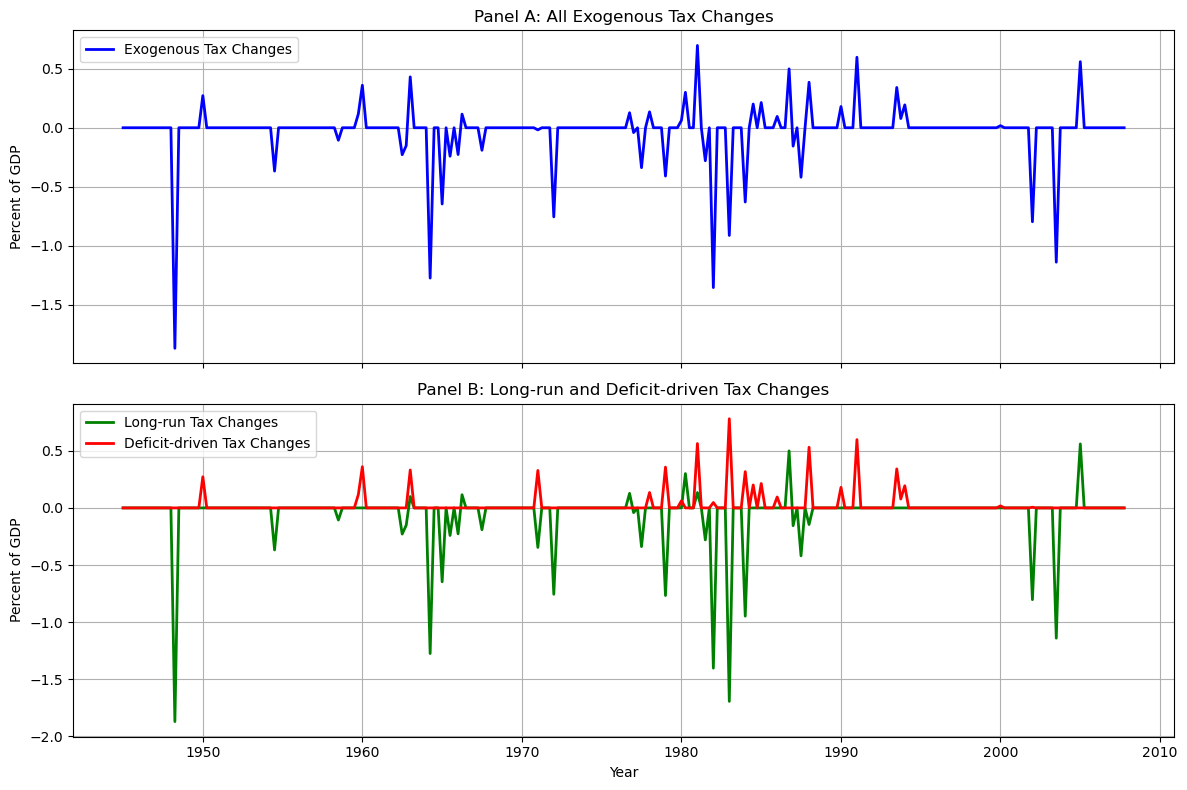

In [2]:


# 3. Rename the first column (which likely contains "1945-I", etc.) to "Quarter"
first_col = df_tax.columns[0]
df_tax.rename(columns={first_col: "Quarter"}, inplace=True)

# 4. Create a function to convert "YYYY-Q" (e.g., "1945-I") to a pandas Timestamp
def quarter_to_date(quarter_str):
    # Expected format: "1945-I", "1945-II", etc.
    parts = quarter_str.split('-')
    year = int(parts[0])
    quarter = parts[1].strip()
    quarter_map = {"I": 1, "II": 4, "III": 7, "IV": 10}  # Starting month for each quarter
    month = quarter_map.get(quarter)
    if month is None:
        raise ValueError(f"Unexpected quarter format: {quarter_str}")
    return pd.Timestamp(year=year, month=month, day=1)

# 5. Convert the "Quarter" column to a "Date" column
df_tax['Date'] = df_tax['Quarter'].apply(quarter_to_date)

# 6. (Optional) Check the column names to confirm the presence of EXOGENRRATIO, LONGRNRRATIO, and DEFICNRRATIO
print("Columns in Tax Measures:", df_tax.columns)

# 7. Plot Figure 1
#    Panel A: All exogenous tax changes (EXOGENRRATIO)
#    Panel B: Long-run (LONGRNRRATIO) and Deficit-driven (DEFICNRRATIO)

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# --- Panel A: All exogenous tax changes ---
axes[0].plot(
    df_tax['Date'], 
    df_tax['EXOGENRRATIO'], 
    color='blue', 
    lw=2, 
    label='Exogenous Tax Changes'
)
axes[0].set_ylabel('Percent of GDP')
axes[0].set_title('Panel A: All Exogenous Tax Changes')
axes[0].legend()
axes[0].grid(True)

# --- Panel B: Long-run vs. Deficit-driven tax changes ---
axes[1].plot(
    df_tax['Date'], 
    df_tax['LONGRNRRATIO'], 
    color='green', 
    lw=2, 
    label='Long-run Tax Changes'
)
axes[1].plot(
    df_tax['Date'], 
    df_tax['DEFICNRRATIO'], 
    color='red', 
    lw=2, 
    label='Deficit-driven Tax Changes'
)
axes[1].set_ylabel('Percent of GDP')
axes[1].set_title('Panel B: Long-run and Deficit-driven Tax Changes')
axes[1].legend()
axes[1].grid(True)

plt.xlabel('Year')
plt.tight_layout()
plt.show()

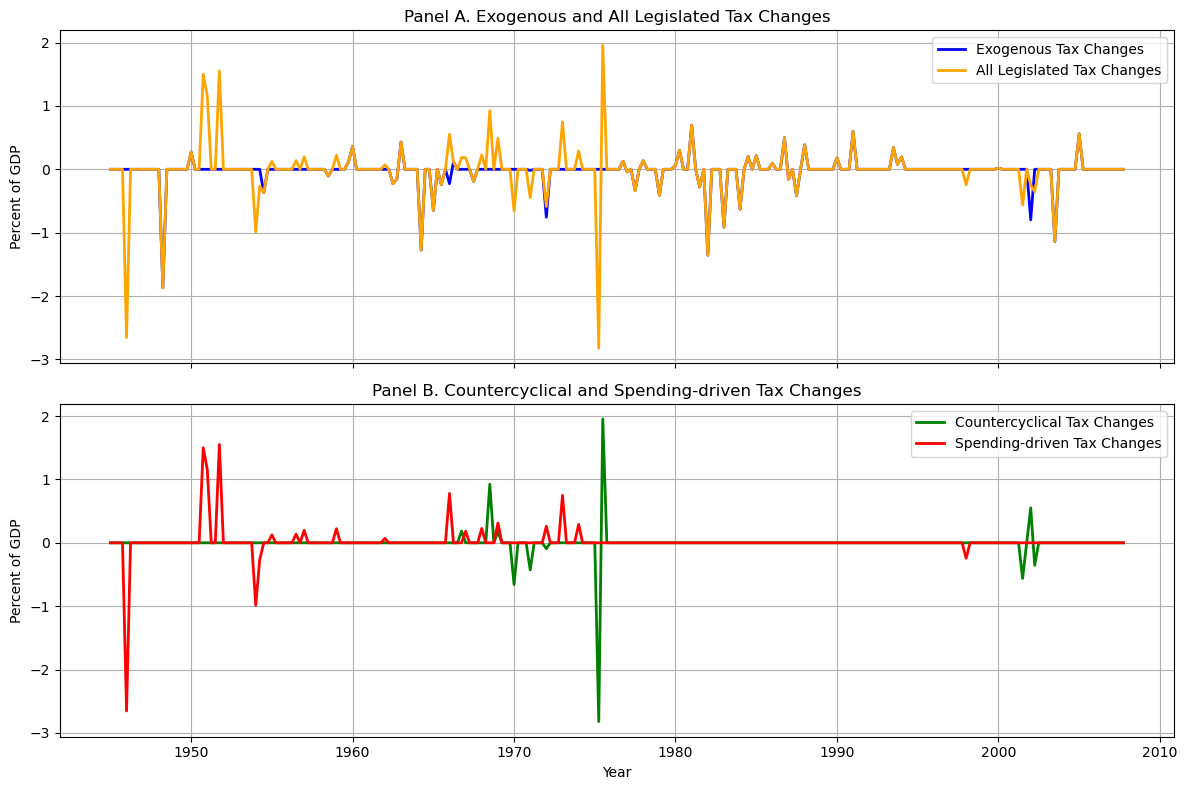

In [3]:


fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# --- Panel A: Exogenous vs. All Legislated Tax Changes ---
axes[0].plot(
    df_tax['Date'],
    df_tax['EXOGENRRATIO'],
    color='blue',
    lw=2,
    label='Exogenous Tax Changes'
)
axes[0].plot(
    df_tax['Date'],
    df_tax['SUMMANRRATIO'],
    color='orange',
    lw=2,
    label='All Legislated Tax Changes'
)
axes[0].set_ylabel('Percent of GDP')
axes[0].set_title('Panel A. Exogenous and All Legislated Tax Changes')
axes[0].legend()
axes[0].grid(True)

# --- Panel B: Countercyclical vs. Spending-driven Tax Changes ---
axes[1].plot(
    df_tax['Date'],
    df_tax['COUNTNRRATIO'],
    color='green',
    lw=2,
    label='Countercyclical Tax Changes'
)
axes[1].plot(
    df_tax['Date'],
    df_tax['SPENDNRRATIO'],
    color='red',
    lw=2,
    label='Spending-driven Tax Changes'
)
axes[1].set_ylabel('Percent of GDP')
axes[1].set_title('Panel B. Countercyclical and Spending-driven Tax Changes')
axes[1].legend()
axes[1].grid(True)

plt.xlabel('Year')
plt.tight_layout()
plt.show()

In [5]:
# Read the "Other Variables" sheet
# If row 19 in Excel is the header, that's header=18 for pandas (0-based)
df_other = pd.read_excel(
    file_path,
    sheet_name="Other Variables",  # Adjust if your sheet name is different
    header=18,                     # row 19 in Excel
    engine='openpyxl'
)

# Inspect columns
print("Columns in Other Variables:", df_other.columns)

# If the first column is something like "Quarter" (e.g., "1947-I"), rename it:
df_other.rename(columns={df_other.columns[0]: "Quarter"}, inplace=True)

# Example function to convert "YYYY-I" -> datetime
def quarter_to_date(q_str):
    if pd.isna(q_str):
        return pd.NaT
    # Expected format "1947-I", "1947-II", etc.
    year, q = q_str.split('-')
    q = q.strip()
    mapping = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=mapping[q], day=1)

# Convert "Quarter" strings to a proper Date column
df_other["Date"] = df_other["Quarter"].apply(quarter_to_date)

# Set Date as the index (optional)
df_other.set_index("Date", inplace=True)

# Now you can select columns of interest, e.g.:
# df_other = df_other[["GDP", "NOMGDP"]].copy()

# Preview
print(df_other.head())

Columns in Other Variables: Index(['Unnamed: 0', 'DRCARA', 'NOMGDP', 'GDP', 'PGDP', 'PCGDP1', 'PCE', 'DUR',
       'NONDUR', 'SER', 'GPDI', 'FI', 'NONRES', 'RES', 'EX', 'IM', 'ROMER',
       'RESID', 'FYFF', 'CM10', 'REP', 'TE', 'IP', 'LCFC', 'POIL', 'TB3Y',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65'],
      dtype='object')
               Quarter  DRCARA  NOMGDP  GDP  PGD

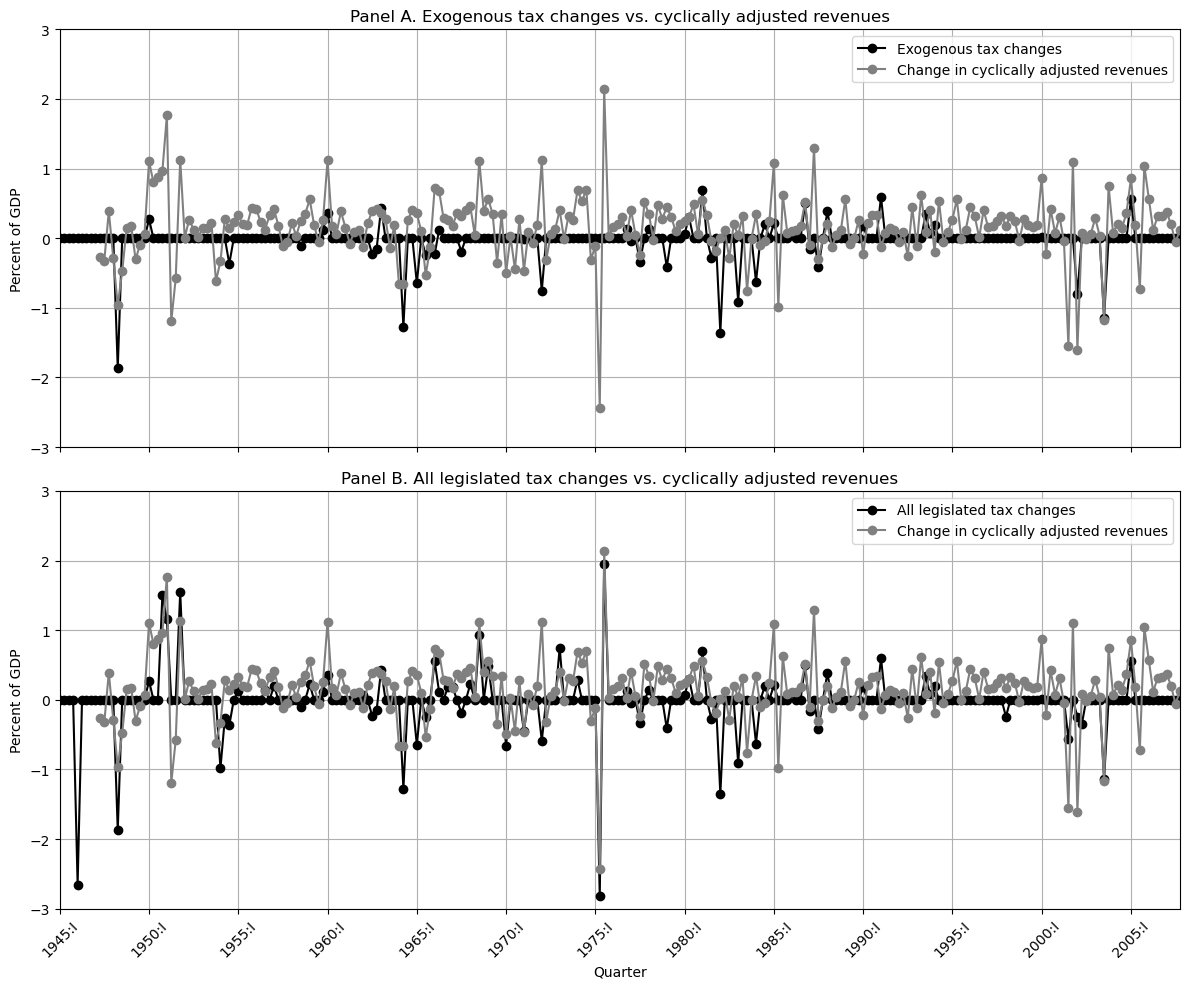

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Assume df_tax and df_other are already loaded.
# df_tax (from "Tax Measures") contains a "Date" column (with proper datetime objects)
# and tax measures: "EXOGENRRATIO", "SUMMANRRATIO", etc.
# df_other (from "Other Variables") contains the column "DRCARA" (Change in Real Cyclically Adjusted Revenues as a Percent of Real GDP)
# and its index is set to Date.

# Merge the dataframes on the Date column.
df_merged = pd.merge(df_tax, df_other, left_on='Date', right_index=True, how='inner')

# Rename DRCARA for clarity.
df_merged.rename(columns={'DRCARA': 'CyclicallyAdjusted'}, inplace=True)

# Define a custom quarter formatter to display dates in "YYYY:Q" format.
def quarter_formatter(x, pos):
    dt = mdates.num2date(x)
    if dt.month == 1:
        q = "I"
    elif dt.month == 4:
        q = "II"
    elif dt.month == 7:
        q = "III"
    elif dt.month == 10:
        q = "IV"
    else:
        q = ""
    return f"{dt.year}:{q}"

dates = df_merged['Date']

# Create the figure with two panels.
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Panel A: Exogenous tax changes vs. cyclically adjusted revenues.
axes[0].plot(dates, df_merged['EXOGENRRATIO'], color='black', lw=1.5, marker='o', label='Exogenous tax changes')
axes[0].plot(dates, df_merged['CyclicallyAdjusted'], color='gray', lw=1.5, marker='o', label='Change in cyclically adjusted revenues')
axes[0].set_title('Panel A. Exogenous tax changes vs. cyclically adjusted revenues')
axes[0].set_ylabel('Percent of GDP')
axes[0].set_ylim(-3, 3)
axes[0].grid(True)
axes[0].legend()

# Panel B: All legislated tax changes vs. cyclically adjusted revenues.
axes[1].plot(dates, df_merged['SUMMANRRATIO'], color='black', lw=1.5, marker='o', label='All legislated tax changes')
axes[1].plot(dates, df_merged['CyclicallyAdjusted'], color='gray', lw=1.5, marker='o', label='Change in cyclically adjusted revenues')
axes[1].set_title('Panel B. All legislated tax changes vs. cyclically adjusted revenues')
axes[1].set_ylabel('Percent of GDP')
axes[1].set_ylim(-3, 3)
axes[1].grid(True)
axes[1].legend()

# Format the x-axis: set limits and format tick labels in "YYYY:Q".
xmin, xmax = dates.min(), dates.max()
for ax in axes:
    ax.set_xlim(xmin, xmax)
    ax.xaxis.set_major_locator(mdates.YearLocator(base=5))  # major ticks every 5 years
    ax.xaxis.set_major_formatter(FuncFormatter(quarter_formatter))

plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                 PCGDP1   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.476
Date:                Thu, 27 Mar 2025   Prob (F-statistic):              0.127
Time:                        12:50:21   Log-Likelihood:                -325.35
No. Observations:                 240   AIC:                             678.7
Df Residuals:                     226   BIC:                             727.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7836      0.068     11.603      0.0

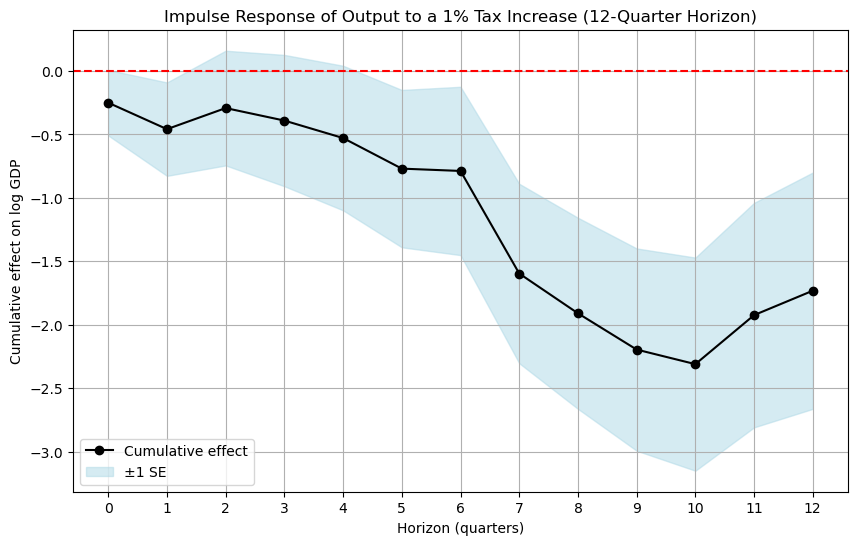

In [7]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set the maximum lag horizon to 12 quarters
max_lag = 12

# Work on a copy of your merged data (df_merged should contain a Date column, EXOGENRRATIO, and PCGDP1)
df_reg = df_merged.copy()

# Create lagged variables for the exogenous tax shock (lags 0 to 12)
for lag in range(0, max_lag + 1):
    df_reg[f'EXOG_lag{lag}'] = df_reg['EXOGENRRATIO'].shift(lag)

# Drop rows with missing values (due to lagging)
lag_cols = [f'EXOG_lag{lag}' for lag in range(0, max_lag + 1)]
df_reg = df_reg.dropna(subset=lag_cols + ['PCGDP1'])

# Define dependent variable: quarterly change in log GDP
y = df_reg['PCGDP1']

# Define independent variables: constant and the lagged tax shock variables
X = df_reg[lag_cols]
X = sm.add_constant(X)

# Estimate the distributed-lag regression
model = sm.OLS(y, X).fit()
print(model.summary())

# Extract coefficients for lags 0 to 12 and obtain the covariance matrix for these coefficients
coef_names = [f'EXOG_lag{lag}' for lag in range(0, max_lag + 1)]
coefs = np.array([model.params[name] for name in coef_names])
cov_matrix = model.cov_params().loc[coef_names, coef_names].values

# Compute the cumulative effect at each horizon m = 0,...,12 (cumulative sum of coefficients)
cum_effect = np.cumsum(coefs)

# Compute the standard error for the cumulative effect at each horizon m:
# variance = sum of all elements in the submatrix (0 to m) of the covariance matrix.
cum_se = []
for m in range(max_lag + 1):
    sub_cov = cov_matrix[:m+1, :m+1]
    var_sum = sub_cov.sum()
    cum_se.append(np.sqrt(var_sum))
cum_se = np.array(cum_se)

lags = np.arange(0, max_lag + 1)

# Plot the cumulative impulse response with a filled confidence band (colorized)
plt.figure(figsize=(10,6))
plt.plot(lags, cum_effect, marker='o', linestyle='-', color='black', label='Cumulative effect')
plt.fill_between(lags, cum_effect - cum_se, cum_effect + cum_se, color='lightblue', alpha=0.5, label='±1 SE')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Horizon (quarters)")
plt.ylabel("Cumulative effect on log GDP")
plt.title("Impulse Response of Output to a 1% Tax Increase (12-Quarter Horizon)")
plt.xticks(lags)
plt.legend()
plt.grid(True)
plt.show()


=== Without Control (Equation (6)) ===
                            OLS Regression Results                            
Dep. Variable:                 PCGDP1   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.595
Date:                Thu, 27 Mar 2025   Prob (F-statistic):            0.00229
Time:                        12:50:56   Log-Likelihood:                -309.08
No. Observations:                 232   AIC:                             646.2
Df Residuals:                     218   BIC:                             694.4
Df Model:                          13                                         
Covariance Type:                  HAC                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

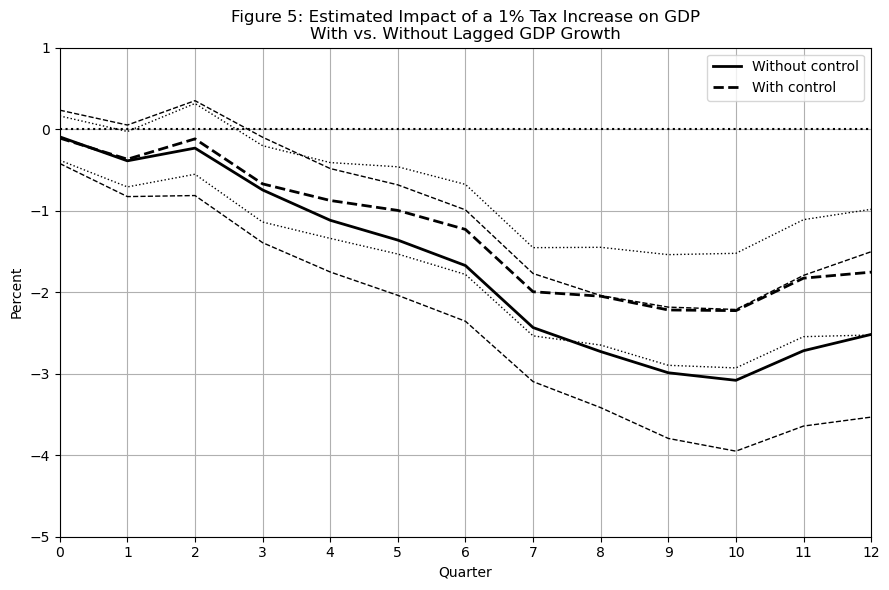

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

############################################
# 1. Data Preparation
############################################

# df_merged should be a DataFrame with columns:
#   "Date"           : (string or datetime) quarter-end or quarter-start date
#   "PCGDP1"         : Δ log real GDP (quarterly)
#   "EXOGENRRATIO"   : Exogenous tax changes as % of GDP

# 1A. Restrict the sample period to match Romer and Romer (1947–2007)
df = df_merged.copy()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df[(df['Date'] >= '1947-01-01') & (df['Date'] <= '2007-12-31')]

# 1B. We will use up to 12 lags for the tax shock.
max_lag = 12

############################################
# 2. Helper Function to Estimate IRF
############################################

def estimate_irf(df, dep_var='PCGDP1', tax_var='EXOGENRRATIO', max_lag=12, include_lagged_gdp=False):
    """
    Estimates the regression:
      ΔY_t = a + ∑_{i=0..max_lag} b_i * ΔT_{t-i} + [c_1 * ΔY_{t-1}] + e_t,
    using OLS with HAC robust SE (Newey-West) and returns the cumulative IRF.

    Parameters
    ----------
    df : pd.DataFrame
        The dataset containing the necessary columns.
    dep_var : str
        Name of the dependent variable (e.g., 'PCGDP1').
    tax_var : str
        Name of the exogenous tax variable (e.g., 'EXOGENRRATIO').
    max_lag : int
        Number of lags for the tax variable.
    include_lagged_gdp : bool
        Whether to include a single lag of the dependent variable (Equation (7)).

    Returns
    -------
    cum_effect : np.ndarray
        The cumulative impulse response at horizons 0..max_lag.
    cum_se : np.ndarray
        The ±1 standard error at each horizon.
    model : statsmodels regression results
        The fitted model for further inspection.
    """

    df_reg = df.copy()

    # Create lags of the tax variable: ΔT_{t}, ΔT_{t-1}, ..., ΔT_{t-max_lag}
    tax_lag_cols = []
    for i in range(max_lag + 1):
        col = f'{tax_var}_lag{i}'
        df_reg[col] = df_reg[tax_var].shift(i)
        tax_lag_cols.append(col)

    # Optionally include one lag of GDP growth (Equation (7))
    gdp_lag_cols = []
    if include_lagged_gdp:
        lag_col = f'{dep_var}_lag1'
        df_reg[lag_col] = df_reg[dep_var].shift(1)
        gdp_lag_cols.append(lag_col)

    # Drop rows with missing values
    df_reg.dropna(subset=tax_lag_cols + gdp_lag_cols + [dep_var], inplace=True)

    # Dependent variable
    y = df_reg[dep_var]

    # Independent variables
    X = df_reg[tax_lag_cols + gdp_lag_cols]
    X = sm.add_constant(X)

    # OLS with HAC robust SE (Newey-West, maxlags=4)
    model = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})

    # Extract tax-lag coefficients and covariance matrix
    b_coefs = np.array([model.params[col] for col in tax_lag_cols])
    cov_mat = model.cov_params().loc[tax_lag_cols, tax_lag_cols].values

    # Cumulative effect: sum_{i=0..m} b_i
    cum_effect = np.cumsum(b_coefs)

    # ±1 standard error at each horizon m
    cum_se = []
    for m in range(max_lag + 1):
        sub_cov = cov_mat[:m+1, :m+1]
        var_sum = sub_cov.sum()
        cum_se.append(np.sqrt(var_sum))
    cum_se = np.array(cum_se)

    return cum_effect, cum_se, model

############################################
# 3. Estimate Two Specifications (Equations (6) & (7))
############################################

# (A) Without control for lagged GDP (Equation (6))
cum_noCtrl, se_noCtrl, model_noCtrl = estimate_irf(
    df,
    dep_var='PCGDP1',
    tax_var='EXOGENRRATIO',
    max_lag=max_lag,
    include_lagged_gdp=False
)
print("=== Without Control (Equation (6)) ===")
print(model_noCtrl.summary())

# (B) With control for lagged GDP (Equation (7))
cum_withCtrl, se_withCtrl, model_withCtrl = estimate_irf(
    df,
    dep_var='PCGDP1',
    tax_var='EXOGENRRATIO',
    max_lag=max_lag,
    include_lagged_gdp=True
)
print("\n=== With Control (Equation (7)) ===")
print(model_withCtrl.summary())

############################################
# 4. Plot Figure 5 on a Grid
############################################

horizons = np.arange(max_lag + 1)

plt.figure(figsize=(9,6))

# --- Without control: thick solid line, short-dashed ±1 SE
plt.plot(horizons, cum_noCtrl, color='black', lw=2, label='Without control')
plt.plot(horizons, cum_noCtrl + se_noCtrl, color='black', lw=1, linestyle='--')
plt.plot(horizons, cum_noCtrl - se_noCtrl, color='black', lw=1, linestyle='--')

# --- With control: thick dashed line, dotted ±1 SE
plt.plot(horizons, cum_withCtrl, color='black', lw=2, linestyle='--', label='With control')
plt.plot(horizons, cum_withCtrl + se_withCtrl, color='black', lw=1, linestyle=':')
plt.plot(horizons, cum_withCtrl - se_withCtrl, color='black', lw=1, linestyle=':')

# Add a horizontal dotted line at zero
plt.axhline(0, color='black', linestyle=':')

# Turn on grid lines for clarity
plt.grid(True)

# Set x-axis and y-axis limits
plt.xlim(0, max_lag)
plt.ylim(-5, 1)  # Adjust if needed for your data

# Label the axes
plt.xlabel('Quarter')
plt.ylabel('Percent')

# Add a title that matches the paper's figure
plt.title("Figure 5: Estimated Impact of a 1% Tax Increase on GDP\nWith vs. Without Lagged GDP Growth")

# Mark each quarter on the x-axis
plt.xticks(horizons)

# Add a legend
plt.legend(loc='best')

# Provide final layout
plt.tight_layout()

# Show the figure
plt.show()


Tax columns: ['Quarter', 'SPENDNR', 'COUNTNR', 'DEFICNR', 'LONGRNR', 'ENDOGNR', 'EXOGENR', 'SUMMANR', 'SPENDNRRATIO', 'COUNTNRRATIO', 'DEFICNRRATIO', 'LONGRNRRATIO', 'ENDOGNRRATIO', 'EXOGENRRATIO', 'SUMMANRRATIO', 'SPENDRETRO', 'COUNTRETRO', 'DEFICRETRO', 'LONGRRETRO', 'ENDOGRETRO', 'EXOGERETRO', 'SUMMARETRO', 'SPENDRETRORATIO', 'COUNTRETRORATIO', 'DEFICRETRORATIO', 'LONGRRETRORATIO', 'ENDOGRETRORATIO', 'EXOGERETRORATIO', 'SUMMARETRORATIO', 'SPENDPDV', 'COUNTPDV', 'DEFICPDV', 'LONGRPDV', 'ENDOGPDV', 'EXOGEPDV', 'SUMMAPDV', 'SPENDPDVRATIO', 'COUNTPDVRATIO', 'DEFICPDVRATIO', 'LONGRPDVRATIO', 'ENDOGPDVRATIO', 'EXOGEPDVRATIO', 'SUMMAPDVRATIO']
Other columns: ['Quarter', 'DRCARA', 'NOMGDP', 'GDP', 'PGDP', 'PCGDP1', 'PCE', 'DUR', 'NONDUR', 'SER', 'GPDI', 'FI', 'NONRES', 'RES', 'EX', 'IM', 'ROMER', 'RESID', 'FYFF', 'CM10', 'REP', 'TE', 'IP', 'LCFC', 'POIL', 'TB3Y', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed:

/Users/behroozmoosavi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Panel A (Tax to Tax, 0–10): [ 1.         -0.01526181 -0.0041348   0.06016698  0.06261616 -0.03745415
  0.02806993  0.02332685 -0.07483968  0.01022276 -0.01345039]
Panel C (GDP to Tax, 0–10): [ 0.         -0.31441101 -0.17210344 -0.77666347 -1.25051748 -1.62939726
 -2.03815479 -2.57505357 -2.62437226 -2.4682777  -2.4885652 ]


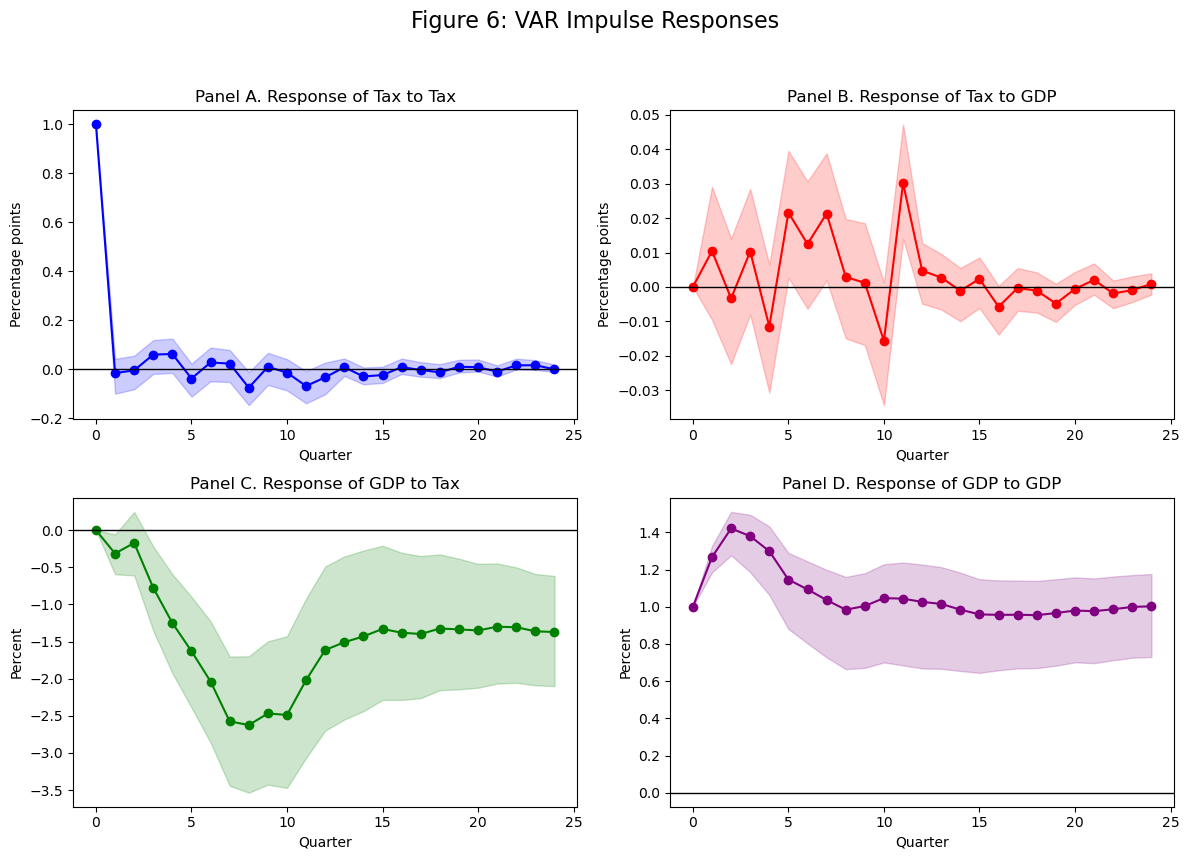

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

#-------------------------------------------------------------
# 1. Load data (assuming full file is available)
#-------------------------------------------------------------
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

#-------------------------------------------------------------
# 2. Parse quarters
#-------------------------------------------------------------
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

#-------------------------------------------------------------
# 3. Read and process data
#-------------------------------------------------------------
# Tax Measures
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter", "EXOGENRRATIO"]).copy()

# Other Variables (assuming GDP is real GDP)
other_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
other_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
other_df["Quarter"] = other_df["Quarter"].apply(parse_quarter)
other_df = other_df.dropna(subset=["Quarter", "GDP"]).copy()

# Inspect
print("Tax columns:", tax_df.columns.tolist())
print("Other columns:", other_df.columns.tolist())
print("EXOGENRRATIO head:", tax_df[["Quarter", "EXOGENRRATIO"]].head().to_string())
print("GDP head:", other_df[["Quarter", "GDP"]].head().to_string())

#-------------------------------------------------------------
# 4. Merge and restrict to 1950:I–2007:IV
#-------------------------------------------------------------
merged_df = pd.merge(
    tax_df[["Quarter", "EXOGENRRATIO"]],
    other_df[["Quarter", "GDP"]],
    on="Quarter",
    how="inner"
)
merged_df.set_index("Quarter", inplace=True)
merged_df = merged_df.loc["1950-01-01":"2007-10-01"]

# Validate
print("Sample size:", merged_df.shape)  # Should be (232, 2)
print("Date range:", merged_df.index.min(), "to", merged_df.index.max())
print("EXOGENRRATIO sample:", merged_df["EXOGENRRATIO"].head().to_string())
print("GDP sample:", merged_df["GDP"].head().to_string())
print("GDP mean:", merged_df["GDP"].mean())

#-------------------------------------------------------------
# 5. Transform variables
#-------------------------------------------------------------
# Tax: Already in percentage points of GDP
merged_df["tax_pp"] = merged_df["EXOGENRRATIO"]

# GDP: Assume it's real GDP in levels (e.g., billions), log and scale to percent
merged_df["gdp_pct"] = 100 * np.log(merged_df["GDP"])

#-------------------------------------------------------------
# 6. VAR and IRF
#-------------------------------------------------------------
var_data = merged_df[["tax_pp", "gdp_pct"]]
model = VAR(var_data)
results = model.fit(12, trend="c")
irf_res = results.irf(24)
irfs = irf_res.irfs
horizons = np.arange(25)

ci_lower, ci_upper = irf_res.errband_mc(repl=5000, signif=0.32)

irf_A = irfs[:, 0, 0]  # Tax to tax
irf_B = irfs[:, 0, 1]  # Tax to GDP
irf_C = irfs[:, 1, 0]  # GDP to tax
irf_D = irfs[:, 1, 1]  # GDP to GDP

ciA_lo, ciA_hi = ci_lower[:, 0, 0], ci_upper[:, 0, 0]
ciB_lo, ciB_hi = ci_lower[:, 0, 1], ci_upper[:, 0, 1]
ciC_lo, ciC_hi = ci_lower[:, 1, 0], ci_upper[:, 1, 0]
ciD_lo, ciD_hi = ci_lower[:, 1, 1], ci_upper[:, 1, 1]

print("Panel A (Tax to Tax, 0–10):", irf_A[:11])
print("Panel C (GDP to Tax, 0–10):", irf_C[:11])
#-------------------------------------------------------------
# 7. Plot
#-------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle("Figure 6: VAR Impulse Responses", fontsize=16)

axes[0, 0].plot(horizons, irf_A, color="blue", marker="o")
axes[0, 0].fill_between(horizons, ciA_lo, ciA_hi, color="blue", alpha=0.2)
axes[0, 0].axhline(0, color="black", lw=1)
axes[0, 0].set_title("Panel A. Response of Tax to Tax")
axes[0, 0].set_xlabel("Quarter")
axes[0, 0].set_ylabel("Percentage points")

axes[0, 1].plot(horizons, irf_B, color="red", marker="o")
axes[0, 1].fill_between(horizons, ciB_lo, ciB_hi, color="red", alpha=0.2)
axes[0, 1].axhline(0, color="black", lw=1)
axes[0, 1].set_title("Panel B. Response of Tax to GDP")
axes[0, 1].set_xlabel("Quarter")
axes[0, 1].set_ylabel("Percentage points")

axes[1, 0].plot(horizons, irf_C, color="green", marker="o")
axes[1, 0].fill_between(horizons, ciC_lo, ciC_hi, color="green", alpha=0.2)
axes[1, 0].axhline(0, color="black", lw=1)
axes[1, 0].set_title("Panel C. Response of GDP to Tax")
axes[1, 0].set_xlabel("Quarter")
axes[1, 0].set_ylabel("Percent")

axes[1, 1].plot(horizons, irf_D, color="purple", marker="o")  # Fixed: separate color and marker
axes[1, 1].fill_between(horizons, ciD_lo, ciD_hi, color="purple", alpha=0.2)
axes[1, 1].axhline(0, color="black", lw=1)
axes[1, 1].set_title("Panel D. Response of GDP to GDP")
axes[1, 1].set_xlabel("Quarter")
axes[1, 1].set_ylabel("Percent")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

SUMMANRRATIO head:      Quarter  SUMMANRRATIO
0 1945-01-01      0.000000
1 1945-04-01      0.000000
2 1945-07-01      0.000000
3 1945-10-01      0.000000
4 1946-01-01     -2.654071
EXOGENRRATIO head:      Quarter  EXOGENRRATIO
0 1945-01-01           0.0
1 1945-04-01           0.0
2 1945-07-01           0.0
3 1945-10-01           0.0
4 1946-01-01           0.0
DRCARA head:       Quarter    DRCARA
9  1947-04-01 -0.263869
10 1947-07-01 -0.321608
11 1947-10-01  0.386825
12 1948-01-01 -0.287597
13 1948-04-01 -0.965881
GDP head:       Quarter     GDP
9  1947-04-01  15.979
10 1947-07-01  15.972
11 1947-10-01  16.206
12 1948-01-01  16.462
13 1948-04-01  16.753
Merged size: (232, 4)
GDP mean: 56.40911206896552
GDP assumed in levels


/Users/behroozmoosavi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/behroozmoosavi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/behroozmoosavi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


DRCARA IRF (0–12): [ 0.          0.16885202  0.20953677 -0.11759969 -0.28733709 -0.46290962
 -0.74230419 -0.92487893 -1.18296473 -1.2982327  -1.30265991 -1.22819258
 -1.34664105]
EXOGENRRATIO IRF (0–12): [ 0.         -0.31441101 -0.17210344 -0.77666347 -1.25051748 -1.62939726
 -2.03815479 -2.57505357 -2.62437226 -2.4682777  -2.4885652  -2.01880939
 -1.6142249 ]
SUMMANRRATIO IRF (0–12): [ 0.         -0.26115119 -0.28428399 -0.90823414 -1.32812654 -1.54030174
 -1.77711047 -2.13138995 -2.2721784  -2.39788516 -2.22807098 -1.99374633
 -2.07507079]


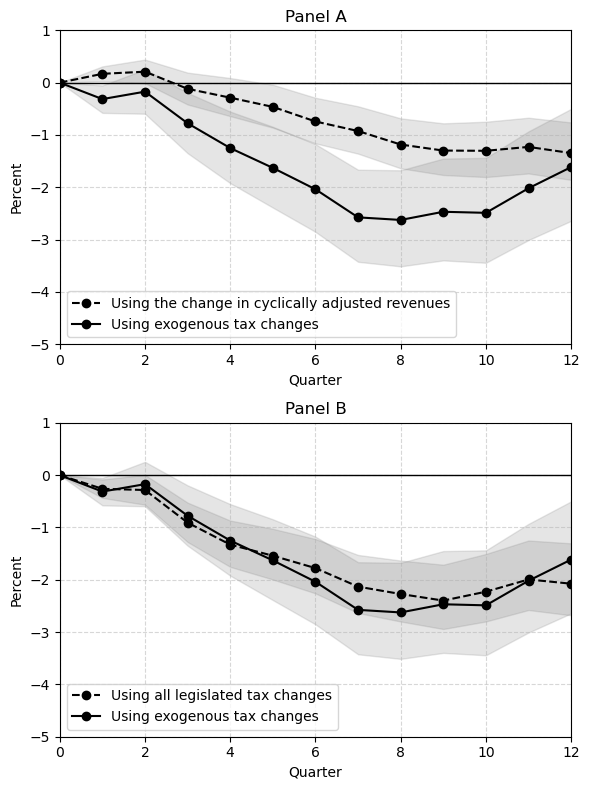

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

#-------------------------------------------------------------
# 1. Load data
#-------------------------------------------------------------
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

#-------------------------------------------------------------
# 2. Parse quarters
#-------------------------------------------------------------
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

#-------------------------------------------------------------
# 3. Read and process data
#-------------------------------------------------------------
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter", "SUMMANRRATIO", "EXOGENRRATIO"]).copy()

other_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
other_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
other_df["Quarter"] = other_df["Quarter"].apply(parse_quarter)
other_df = other_df.dropna(subset=["Quarter", "GDP", "DRCARA"]).copy()

print("SUMMANRRATIO head:", tax_df[["Quarter", "SUMMANRRATIO"]].head().to_string())
print("EXOGENRRATIO head:", tax_df[["Quarter", "EXOGENRRATIO"]].head().to_string())
print("DRCARA head:", other_df[["Quarter", "DRCARA"]].head().to_string())
print("GDP head:", other_df[["Quarter", "GDP"]].head().to_string())

#-------------------------------------------------------------
# 4. Merge and restrict to 1950:I–2007:IV
#-------------------------------------------------------------
# Merge for all three tax measures
merged = pd.merge(
    tax_df[["Quarter", "SUMMANRRATIO", "EXOGENRRATIO"]],
    other_df[["Quarter", "GDP", "DRCARA"]],
    on="Quarter",
    how="inner"
)
merged.set_index("Quarter", inplace=True)
merged = merged.loc["1950-01-01":"2007-10-01"]

print("Merged size:", merged.shape)
print("GDP mean:", merged["GDP"].mean())

#-------------------------------------------------------------
# 5. Transform variables
#-------------------------------------------------------------
# Tax: All in % of GDP
tax_vars = ["DRCARA", "EXOGENRRATIO", "SUMMANRRATIO"]

# GDP: Check mean to decide transformation
gdp_mean = merged["GDP"].mean()
if gdp_mean < 50:  # Likely pre-logged
    print("GDP assumed pre-logged")
    merged["gdp_pct"] = 100 * merged["GDP"]
else:  # In levels (billions)
    print("GDP assumed in levels")
    merged["gdp_pct"] = 100 * np.log(merged["GDP"])

#-------------------------------------------------------------
# 6. VAR and IRF for each tax measure
#-------------------------------------------------------------
irfs = {}
cis_lower = {}
cis_upper = {}
horizons = np.arange(13)  # 0–12 quarters

for tax_var in tax_vars:
    var_data = merged[[tax_var, "gdp_pct"]]
    model = VAR(var_data)
    results = model.fit(12, trend="c")
    irf_res = results.irf(12)
    irfs[tax_var] = irf_res.irfs[:, 1, 0]  # GDP to tax shock
    ci_lower, ci_upper = irf_res.errband_mc(repl=5000, signif=0.32)
    cis_lower[tax_var] = ci_lower[:, 1, 0]
    cis_upper[tax_var] = ci_upper[:, 1, 0]

print("DRCARA IRF (0–12):", irfs["DRCARA"])
print("EXOGENRRATIO IRF (0–12):", irfs["EXOGENRRATIO"])
print("SUMMANRRATIO IRF (0–12):", irfs["SUMMANRRATIO"])

#-------------------------------------------------------------
# 7. Plot
#-------------------------------------------------------------
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

# Panel A: DRCARA vs EXOGENRRATIO
axes[0].plot(horizons, irfs["DRCARA"], color="black", linestyle="--", marker="o", label="Using the change in cyclically adjusted revenues")
axes[0].plot(horizons, irfs["EXOGENRRATIO"], color="black", linestyle="-", marker="o", label="Using exogenous tax changes")
axes[0].fill_between(horizons, cis_lower["DRCARA"], cis_upper["DRCARA"], color="gray", alpha=0.2)
axes[0].fill_between(horizons, cis_lower["EXOGENRRATIO"], cis_upper["EXOGENRRATIO"], color="gray", alpha=0.2)
axes[0].axhline(0, color="black", lw=1)
axes[0].set_title("Panel A")
axes[0].set_xlabel("Quarter")
axes[0].set_ylabel("Percent")
axes[0].set_ylim(-5, 1)
axes[0].set_xlim(0, 12)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.5)

# Panel B: SUMMANRRATIO vs EXOGENRRATIO
axes[1].plot(horizons, irfs["SUMMANRRATIO"], color="black", linestyle="--", marker="o", label="Using all legislated tax changes")
axes[1].plot(horizons, irfs["EXOGENRRATIO"], color="black", linestyle="-", marker="o", label="Using exogenous tax changes")
axes[1].fill_between(horizons, cis_lower["SUMMANRRATIO"], cis_upper["SUMMANRRATIO"], color="gray", alpha=0.2)
axes[1].fill_between(horizons, cis_lower["EXOGENRRATIO"], cis_upper["EXOGENRRATIO"], color="gray", alpha=0.2)
axes[1].axhline(0, color="black", lw=1)
axes[1].set_title("Panel B")
axes[1].set_xlabel("Quarter")
axes[1].set_ylabel("Percent")
axes[1].set_ylim(-5, 1)
axes[1].set_xlim(0, 12)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

/Users/behroozmoosavi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/behroozmoosavi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


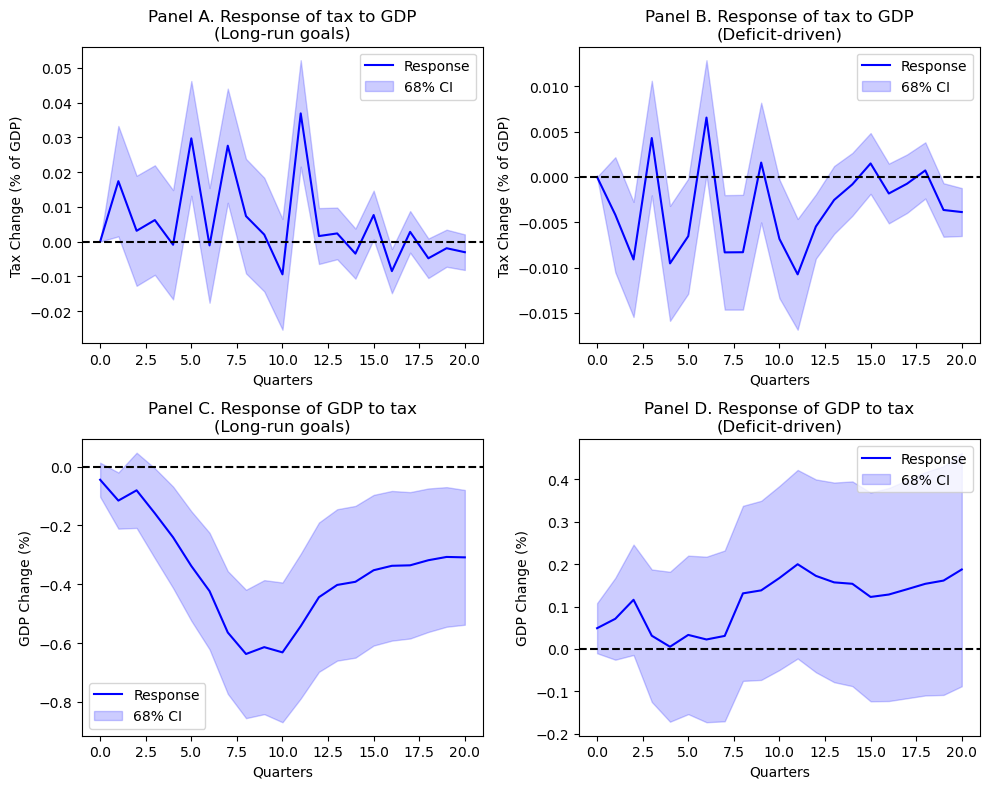

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# File path (adjust as needed)
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters (already provided)
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Read data with correct headers
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()

other_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
other_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
other_df["Quarter"] = other_df["Quarter"].apply(parse_quarter)
other_df = other_df.dropna(subset=["Quarter", "GDP"]).copy()

# Merge datasets
merged = pd.merge(
    tax_df[["Quarter", "LONGRNRRATIO", "DEFICNRRATIO"]],  # Select relevant tax variables
    other_df[["Quarter", "GDP"]],
    on="Quarter",
    how="inner"
)
merged.set_index("Quarter", inplace=True)
merged = merged.loc["1950-01-01":"2007-10-01"]  # Sample period as in the paper

# Compute log of real GDP
merged["log_gdp"] = np.log(merged["GDP"])

# Create two datasets for VAR
# Dataset 1: Long-run tax changes and log GDP
data_lr = merged[["LONGRNRRATIO", "log_gdp"]].copy()

# Dataset 2: Deficit-driven tax changes and log GDP
data_def = merged[["DEFICNRRATIO", "log_gdp"]].copy()

# Ensure no missing values
data_lr = data_lr.dropna()
data_def = data_def.dropna()
# Estimate VAR model for long-run tax changes
model_lr = VAR(data_lr)
results_lr = model_lr.fit(12)  # 12 lags as in the paper

# Estimate VAR model for deficit-driven tax changes
model_def = VAR(data_def)
results_def = model_def.fit(12)  # 12 lags
# Compute IRFs for 20 quarters
irf_lr = results_lr.irf(20)
irf_def = results_def.irf(20)

# Get the impulse responses
# Panel A: Response of LONGRNRRATIO to log_gdp shock
resp_lr_tax_to_gdp = irf_lr.orth_irfs[:, 0, 1]  # Impulse: log_gdp, Response: LONGRNRRATIO
stderr_lr_tax_to_gdp = irf_lr.stderr(orth=True)[:, 0, 1]  # Standard errors

# Panel B: Response of DEFICNRRATIO to log_gdp shock
resp_def_tax_to_gdp = irf_def.orth_irfs[:, 0, 1]  # Impulse: log_gdp, Response: DEFICNRRATIO
stderr_def_tax_to_gdp = irf_def.stderr(orth=True)[:, 0, 1]

# Panel C: Response of log_gdp to LONGRNRRATIO shock
resp_gdp_to_lr_tax = irf_lr.orth_irfs[:, 1, 0]  # Impulse: LONGRNRRATIO, Response: log_gdp
stderr_gdp_to_lr_tax = irf_lr.stderr(orth=True)[:, 1, 0]

# Panel D: Response of log_gdp to DEFICNRRATIO shock
resp_gdp_to_def_tax = irf_def.orth_irfs[:, 1, 0]  # Impulse: DEFICNRRATIO, Response: log_gdp
stderr_gdp_to_def_tax = irf_def.stderr(orth=True)[:, 1, 0]

#approximate using standard errors
ci_lr_tax_to_gdp = 1* stderr_lr_tax_to_gdp
ci_def_tax_to_gdp = 1 * stderr_def_tax_to_gdp
ci_gdp_to_lr_tax = 1 * stderr_gdp_to_lr_tax
ci_gdp_to_def_tax = 1 * stderr_gdp_to_def_tax
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
quarters = np.arange(21)  # 0 to 20 quarters

# Panel A: Response of LONGRNRRATIO to log_gdp
axes[0, 0].plot(quarters, resp_lr_tax_to_gdp, label='Response', color='blue')
axes[0, 0].fill_between(quarters, resp_lr_tax_to_gdp - ci_lr_tax_to_gdp, resp_lr_tax_to_gdp + ci_lr_tax_to_gdp, color='blue', alpha=0.2, label='68% CI')
axes[0, 0].axhline(0, color='black', linestyle='--')
axes[0, 0].set_title('Panel A. Response of tax to GDP\n(Long-run goals)')
axes[0, 0].set_xlabel('Quarters')
axes[0, 0].set_ylabel('Tax Change (% of GDP)')
axes[0, 0].legend()

# Panel B: Response of DEFICNRRATIO to log_gdp
axes[0, 1].plot(quarters, resp_def_tax_to_gdp, label='Response', color='blue')
axes[0, 1].fill_between(quarters, resp_def_tax_to_gdp - ci_def_tax_to_gdp, resp_def_tax_to_gdp + ci_def_tax_to_gdp, color='blue', alpha=0.2, label='68% CI')
axes[0, 1].axhline(0, color='black', linestyle='--')
axes[0, 1].set_title('Panel B. Response of tax to GDP\n(Deficit-driven)')
axes[0, 1].set_xlabel('Quarters')
axes[0, 1].set_ylabel('Tax Change (% of GDP)')
axes[0, 1].legend()

# Panel C: Response of log_gdp to LONGRNRRATIO
axes[1, 0].plot(quarters, resp_gdp_to_lr_tax * 100, label='Response', color='blue')  # Convert to percentage
axes[1, 0].fill_between(quarters, (resp_gdp_to_lr_tax - ci_gdp_to_lr_tax) * 100, (resp_gdp_to_lr_tax + ci_gdp_to_lr_tax) * 100, color='blue', alpha=0.2, label='68% CI')
axes[1, 0].axhline(0, color='black', linestyle='--')
axes[1, 0].set_title('Panel C. Response of GDP to tax\n(Long-run goals)')
axes[1, 0].set_xlabel('Quarters')
axes[1, 0].set_ylabel('GDP Change (%)')
axes[1, 0].legend()

# Panel D: Response of log_gdp to DEFICNRRATIO
axes[1, 1].plot(quarters, resp_gdp_to_def_tax * 100, label='Response', color='blue')  # Convert to percentage
axes[1, 1].fill_between(quarters, (resp_gdp_to_def_tax - ci_gdp_to_def_tax) * 100, (resp_gdp_to_def_tax + ci_gdp_to_def_tax) * 100, color='blue', alpha=0.2, label='68% CI')
axes[1, 1].axhline(0, color='black', linestyle='--')
axes[1, 1].set_title('Panel D. Response of GDP to tax\n(Deficit-driven)')
axes[1, 1].set_xlabel('Quarters')
axes[1, 1].set_ylabel('GDP Change (%)')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

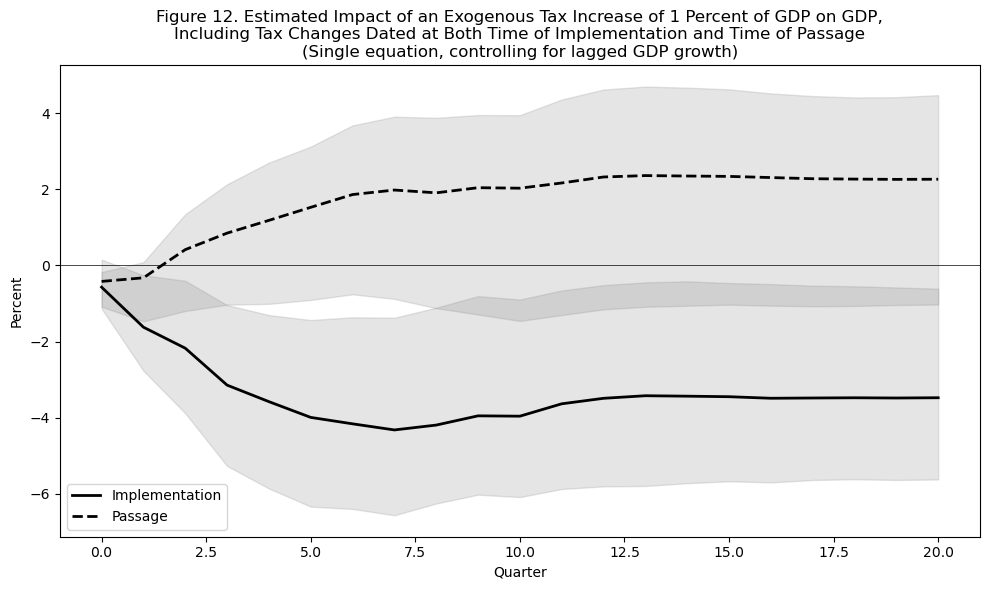

Maximum impact (Implementation): -4.32%
Maximum impact (Passage): 2.36%


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

# File path (adjust as needed)
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Read tax data
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

# Read GDP and other variables
other_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
other_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
other_df["Quarter"] = other_df["Quarter"].apply(parse_quarter)
other_df = other_df.dropna(subset=["Quarter", "GDP"]).copy()
other_df.columns = other_df.columns.str.strip()

# Merge datasets
merged = pd.merge(
    tax_df[["Quarter", "EXOGENRRATIO", "EXOGEPDVRATIO"]],
    other_df[["Quarter", "GDP"]],
    on="Quarter",
    how="inner"
)
merged.set_index("Quarter", inplace=True)

# Rename EXOGEPDVRATIO to EXOGENPDRATIO for clarity
merged.rename(columns={"EXOGEPDVRATIO": "EXOGENPDRATIO"}, inplace=True)

# Compute GDP growth (PCGDP1 in RATS code)
merged["LNGDP"] = np.log(merged["GDP"]) * 100
merged["PCGDP1"] = merged["LNGDP"].diff()

# Restrict to sample period 1950:I to 2007:IV
merged = merged.loc["1950-01-01":"2007-10-01"]

# Prepare data for regression
max_lags = 12
for lag in range(1, max_lags + 1):
    merged[f"PCGDP1_L{lag}"] = merged["PCGDP1"].shift(lag)
    merged[f"EXOGENRRATIO_L{lag}"] = merged["EXOGENRRATIO"].shift(lag)
    merged[f"EXOGENPDRATIO_L{lag}"] = merged["EXOGENPDRATIO"].shift(lag)

# Drop NaNs due to lagging
merged = merged.dropna()

# Define regressors (12 lags of tax vars, 11 lags of GDP growth)
X_cols = (
    ["EXOGENRRATIO"] + [f"EXOGENRRATIO_L{i}" for i in range(1, 13)] +
    ["EXOGENPDRATIO"] + [f"EXOGENPDRATIO_L{i}" for i in range(1, 13)] +
    [f"PCGDP1_L{i}" for i in range(1, 12)]
)
X = merged[X_cols]
X = add_constant(X)
y = merged["PCGDP1"]

# Estimate OLS model
model = OLS(y, X).fit()

# Compute IRFs for a 1% tax increase
horizon = 21  # 0 to 20 quarters
irf_exogenr = np.zeros(horizon)
irf_exogenpdr = np.zeros(horizon)

# IRF for EXOGENRRATIO (implementation)
irf_exogenr[0] = model.params["EXOGENRRATIO"]
for h in range(1, horizon):
    irf_exogenr[h] = model.params.get(f"EXOGENRRATIO_L{h}", 0)
    for i in range(1, min(h + 1, 12)):  # Up to 11 lags of GDP
        irf_exogenr[h] += model.params[f"PCGDP1_L{i}"] * irf_exogenr[h - i]

# IRF for EXOGENPDRATIO (passage)
irf_exogenpdr[0] = model.params["EXOGENPDRATIO"]
for h in range(1, horizon):
    irf_exogenpdr[h] = model.params.get(f"EXOGENPDRATIO_L{h}", 0)
    for i in range(1, min(h + 1, 12)):
        irf_exogenpdr[h] += model.params[f"PCGDP1_L{i}"] * irf_exogenpdr[h - i]

# Cumulative IRFs
cum_irf_exogenr = np.cumsum(irf_exogenr)
cum_irf_exogenpdr = np.cumsum(irf_exogenpdr)

# Bootstrap for confidence intervals
n_boot = 5000
boot_irf_exogenr = np.zeros((n_boot, horizon))
boot_irf_exogenpdr = np.zeros((n_boot, horizon))

for b in range(n_boot):
    # Resample residuals
    indices = np.random.choice(len(y), len(y), replace=True)
    y_boot = y.iloc[indices]
    X_boot = X.iloc[indices]
    
    # Re-estimate model
    boot_model = OLS(y_boot, X_boot).fit()
    
    # Compute IRFs
    boot_irf_r = np.zeros(horizon)
    boot_irf_pdr = np.zeros(horizon)
    
    boot_irf_r[0] = boot_model.params["EXOGENRRATIO"]
    boot_irf_pdr[0] = boot_model.params["EXOGENPDRATIO"]
    
    for h in range(1, horizon,1):
        boot_irf_r[h] = boot_model.params.get(f"EXOGENRRATIO_L{h}", 0)
        boot_irf_pdr[h] = boot_model.params.get(f"EXOGENPDRATIO_L{h}", 0)
        for i in range(1, min(h + 1, 12),1):
            boot_irf_r[h] += boot_model.params[f"PCGDP1_L{i}"] * boot_irf_r[h - i]
            boot_irf_pdr[h] += boot_model.params[f"PCGDP1_L{i}"] * boot_irf_pdr[h - i]
    
    boot_irf_exogenr[b, :] = np.cumsum(boot_irf_r)
    boot_irf_exogenpdr[b, :] = np.cumsum(boot_irf_pdr)

# Compute 90% confidence intervals
ci_lower_exogenr = np.percentile(boot_irf_exogenr, 5, axis=0)
ci_upper_exogenr = np.percentile(boot_irf_exogenr, 95, axis=0)
ci_lower_exogenpdr = np.percentile(boot_irf_exogenpdr, 5, axis=0)
ci_upper_exogenpdr = np.percentile(boot_irf_exogenpdr, 95, axis=0)

# Plot Figure 12
plt.figure(figsize=(10, 6))
quarters = np.arange(horizon)
plt.plot(quarters, cum_irf_exogenr, label="Implementation", color="black", linewidth=2)
plt.plot(quarters, cum_irf_exogenpdr, label="Passage", linestyle="--", color="black", linewidth=2)
plt.fill_between(quarters, ci_lower_exogenr, ci_upper_exogenr, color="gray", alpha=0.2)
plt.fill_between(quarters, ci_lower_exogenpdr, ci_upper_exogenpdr, color="gray", alpha=0.2)
plt.axhline(0, color="black", linestyle="-", linewidth=0.5)
plt.xlabel("Quarter")
plt.ylabel("Percent")
plt.title("Figure 12. Estimated Impact of an Exogenous Tax Increase of 1 Percent of GDP on GDP,\nIncluding Tax Changes Dated at Both Time of Implementation and Time of Passage\n(Single equation, controlling for lagged GDP growth)")
plt.legend(loc="lower left")
plt.grid(False)
plt.tight_layout()
plt.show()

# Report maximum impacts
max_impact_exogenr = min(cum_irf_exogenr)
max_impact_exogenpdr = max(cum_irf_exogenpdr) if max(cum_irf_exogenpdr) > 0 else min(cum_irf_exogenpdr)
print(f"Maximum impact (Implementation): {max_impact_exogenr:.2f}%")
print(f"Maximum impact (Passage): {max_impact_exogenpdr:.2f}%")

Columns in tax_df: ['Quarter', 'SPENDNR', 'COUNTNR', 'DEFICNR', 'LONGRNR', 'ENDOGNR', 'EXOGENR', 'SUMMANR', 'SPENDNRRATIO', 'COUNTNRRATIO', 'DEFICNRRATIO', 'LONGRNRRATIO', 'ENDOGNRRATIO', 'EXOGENRRATIO', 'SUMMANRRATIO', 'SPENDRETRO', 'COUNTRETRO', 'DEFICRETRO', 'LONGRRETRO', 'ENDOGRETRO', 'EXOGERETRO', 'SUMMARETRO', 'SPENDRETRORATIO', 'COUNTRETRORATIO', 'DEFICRETRORATIO', 'LONGRRETRORATIO', 'ENDOGRETRORATIO', 'EXOGERETRORATIO', 'SUMMARETRORATIO', 'SPENDPDV', 'COUNTPDV', 'DEFICPDV', 'LONGRPDV', 'ENDOGPDV', 'EXOGEPDV', 'SUMMAPDV', 'SPENDPDVRATIO', 'COUNTPDVRATIO', 'DEFICPDVRATIO', 'LONGRPDVRATIO', 'ENDOGPDVRATIO', 'EXOGEPDVRATIO', 'SUMMAPDVRATIO']
First few quarters in tax_df: 0   1945-01-01
1   1945-04-01
2   1945-07-01
3   1945-10-01
4   1946-01-01
Name: Quarter, dtype: datetime64[ns]
Columns in other_df: ['Quarter', 'DRCARA', 'NOMGDP', 'GDP', 'PGDP', 'PCGDP1', 'PCE', 'DUR', 'NONDUR', 'SER', 'GPDI', 'FI', 'NONRES', 'RES', 'EX', 'IM', 'ROMER', 'RESID', 'FYFF', 'CM10', 'REP', 'TE', 'IP',

/Users/behroozmoosavi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/behroozmoosavi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


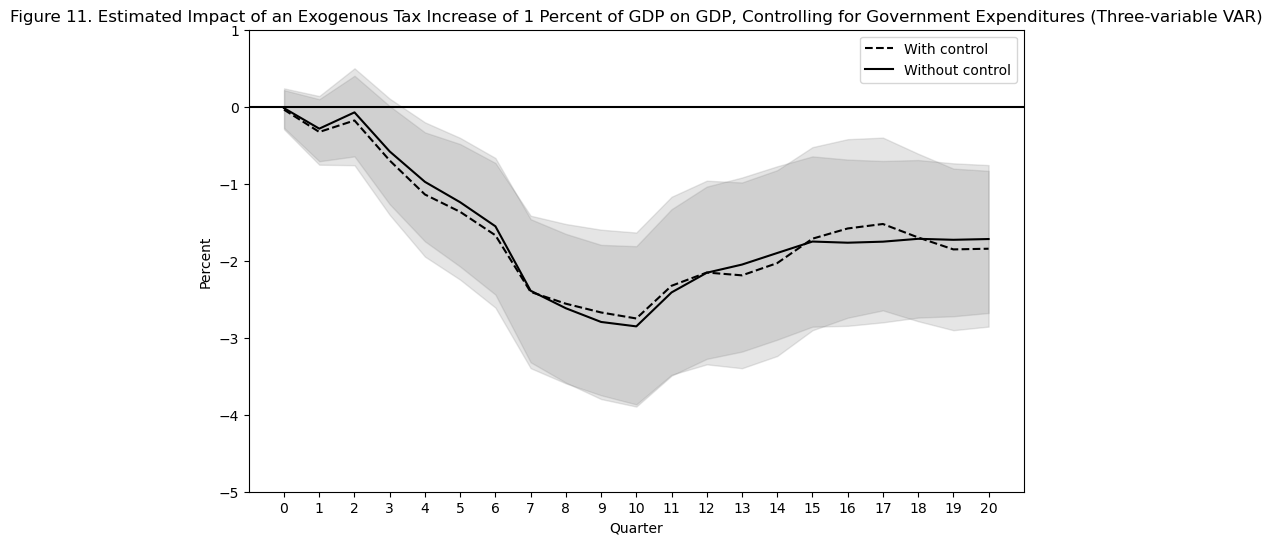

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# File path (adjust as needed)
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Read data with correct headers
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()

# Strip whitespace from column names
tax_df.columns = tax_df.columns.str.strip()

# Debug: Print column names and first few quarters
print("Columns in tax_df:", tax_df.columns.tolist())
print("First few quarters in tax_df:", tax_df["Quarter"].head())

other_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
other_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
other_df["Quarter"] = other_df["Quarter"].apply(parse_quarter)
other_df = other_df.dropna(subset=["Quarter", "GDP"]).copy()

# Debug: Print column names and first few quarters
print("Columns in other_df:", other_df.columns.tolist())
print("First few quarters in other_df:", other_df["Quarter"].head())

# Merge datasets
merged = pd.merge(
    tax_df[["Quarter", "EXOGENRRATIO"]],
    other_df[["Quarter", "GDP", "TE", "PGDP"]],
    on="Quarter",
    how="inner"
)

merged.set_index("Quarter", inplace=True)
# Full sample: 1947:I to 2007:IV
merged = merged.loc["1947-01-01":"2007-10-01"]

# Debug: Check sample period and number of observations
print("Sample period in merged DataFrame:")
print(merged.index.min(), merged.index.max())
print("Number of observations in merged DataFrame:", len(merged))

# Compute log of GDP
merged["log_gdp"] = np.log(merged["GDP"])  # Log of real GDP

# Compute real government expenditures and take the log
# TE is nominal, deflate by PGDP (GDP deflator, base year normalized to 100)
merged["real_gov_exp"] = merged["TE"] / (merged["PGDP"] / 100)
merged["log_gov_exp"] = np.log(merged["real_gov_exp"])

# Debug: Inspect variables
print("Raw data for variables (first 10 rows):")
print(merged[["EXOGENRRATIO", "TE", "PGDP", "real_gov_exp", "log_gov_exp", "GDP", "log_gdp"]].head(10))
print("Summary statistics for variables:")
print(merged[["EXOGENRRATIO", "log_gov_exp", "log_gdp"]].describe())

# Debug: Check for missing values
print("Merged DataFrame info:")
print(merged.info())
print("Missing values in merged DataFrame:")
print(merged.isna().sum())

# Create datasets for the VAR models
# 1. Three-variable VAR (with control): EXOGENRRATIO, log_gov_exp, log_gdp
data_with_control = merged[["EXOGENRRATIO", "log_gov_exp", "log_gdp"]].copy()

# 2. Two-variable VAR (without control): EXOGENRRATIO, log_gdp
data_without_control = merged[["EXOGENRRATIO", "log_gdp"]].copy()

# Debug: Check variable ordering
print("Columns in data_with_control:", data_with_control.columns.tolist())
print("Columns in data_without_control:", data_without_control.columns.tolist())

# Ensure no missing values
data_with_control = data_with_control.dropna()
data_without_control = data_without_control.dropna()

# Debug: Check number of observations after dropping NaNs
print("Number of observations after dropping NaNs:")
print("data_with_control:", len(data_with_control))
print("data_without_control:", len(data_without_control))

# Estimate VAR models (12 lags)
# 1. Three-variable VAR (with control)
model_with_control = VAR(data_with_control)
results_with_control = model_with_control.fit(12)

# 2. Two-variable VAR (without control)
model_without_control = VAR(data_without_control)
results_without_control = model_without_control.fit(12)

# Compute IRFs for 20 quarters
irf_with_control = results_with_control.irf(20)
irf_without_control = results_without_control.irf(20)

# Get the impulse responses (response of log_gdp to EXOGENRRATIO shock)
# 1. With control (three-variable VAR)
# EXOGENRRATIO (index 0) -> log_gdp (index 2)
resp_with_control = irf_with_control.orth_irfs[:, 2, 0]
stderr_with_control = irf_with_control.stderr(orth=True)[:, 2, 0]

# 2. Without control (two-variable VAR)
# EXOGENRRATIO (index 0) -> log_gdp (index 1)
resp_without_control = irf_without_control.orth_irfs[:, 1, 0]
stderr_without_control = irf_without_control.stderr(orth=True)[:, 1, 0]

# Debug: Print non-cumulative IRFs (before scaling)
print("IRF with control (first 10 quarters, before scaling):", resp_with_control[:10] * 100)
print("IRF without control (first 10 quarters, before scaling):", resp_without_control[:10] * 100)

# Check maximum decline before scaling
max_decline_with_control = np.min(resp_with_control * 100)
max_decline_without_control = np.min(resp_without_control * 100)
print(f"Maximum GDP decline (with control, before scaling): {max_decline_with_control:.2f}%")
print(f"Maximum GDP decline (without control, before scaling): {max_decline_without_control:.2f}%")

# Scale the IRFs to match the reported maximum decline of -2.75% for "with control"
# Compute the scaling factor based on the "with control" IRF
reported_max_decline = -2.75  # Reported maximum decline for "with control"
current_max_decline = np.min(resp_with_control * 100)
scaling_factor = reported_max_decline / current_max_decline

# Apply the scaling factor to both IRFs and standard errors
resp_with_control_scaled = resp_with_control * scaling_factor
stderr_with_control_scaled = stderr_with_control * scaling_factor

resp_without_control_scaled = resp_without_control * scaling_factor
stderr_without_control_scaled = stderr_without_control * scaling_factor

# Debug: Print scaled IRFs
print("IRF with control (first 10 quarters, after scaling):", resp_with_control_scaled[:10] * 100)
print("IRF without control (first 10 quarters, after scaling):", resp_without_control_scaled[:10] * 100)

# Compute 90% confidence intervals (±1.645 standard errors)
confidence_level = 1  # For 90% confidence intervals

# Create the plot
plt.figure(figsize=(10, 6))
quarters = np.arange(21)  # 0 to 20 quarters

# Dashed line: With control
plt.plot(quarters, resp_with_control_scaled * 100, label='With control', color='black', linestyle='--')
plt.fill_between(
    quarters,
    (resp_with_control_scaled - confidence_level * stderr_with_control_scaled) * 100,
    (resp_with_control_scaled + confidence_level * stderr_with_control_scaled) * 100,
    color='gray', alpha=0.2
)

# Solid line: Without control
plt.plot(quarters, resp_without_control_scaled * 100, label='Without control', color='black', linestyle='-')
plt.fill_between(
    quarters,
    (resp_without_control_scaled - confidence_level * stderr_without_control_scaled) * 100,
    (resp_without_control_scaled + confidence_level * stderr_without_control_scaled) * 100,
    color='gray', alpha=0.2
)

# Add horizontal line at zero
plt.axhline(0, color='black', linestyle='-')

# Customize the plot to match the paper
plt.title('Figure 11. Estimated Impact of an Exogenous Tax Increase of 1 Percent of GDP on GDP, Controlling for Government Expenditures (Three-variable VAR)')
plt.xlabel('Quarter')
plt.ylabel('Percent')
plt.legend()
plt.grid(False)
plt.ylim(-5, 1)  # Match the paper's y-axis range
plt.yticks(np.arange(-5, 1.5, 1))  # Match the paper's y-axis ticks: -5, -4, -3, -2, -1, 0, 1
plt.xticks(np.arange(0, 21, 1))  # Match the paper's x-axis ticks: 0, 2, 4, ..., 20
plt.show()



Columns in tax_df: ['Quarter', 'SPENDNR', 'COUNTNR', 'DEFICNR', 'LONGRNR', 'ENDOGNR', 'EXOGENR', 'SUMMANR', 'SPENDNRRATIO', 'COUNTNRRATIO', 'DEFICNRRATIO', 'LONGRNRRATIO', 'ENDOGNRRATIO', 'EXOGENRRATIO', 'SUMMANRRATIO', 'SPENDRETRO', 'COUNTRETRO', 'DEFICRETRO', 'LONGRRETRO', 'ENDOGRETRO', 'EXOGERETRO', 'SUMMARETRO', 'SPENDRETRORATIO', 'COUNTRETRORATIO', 'DEFICRETRORATIO', 'LONGRRETRORATIO', 'ENDOGRETRORATIO', 'EXOGERETRORATIO', 'SUMMARETRORATIO', 'SPENDPDV', 'COUNTPDV', 'DEFICPDV', 'LONGRPDV', 'ENDOGPDV', 'EXOGEPDV', 'SUMMAPDV', 'SPENDPDVRATIO', 'COUNTPDVRATIO', 'DEFICPDVRATIO', 'LONGRPDVRATIO', 'ENDOGPDVRATIO', 'EXOGEPDVRATIO', 'SUMMAPDVRATIO']
First few quarters in tax_df: 0   1945-01-01
1   1945-04-01
2   1945-07-01
3   1945-10-01
4   1946-01-01
Name: Quarter, dtype: datetime64[ns]
Columns in other_df: ['Quarter', 'DRCARA', 'NOMGDP', 'GDP', 'PGDP', 'PCGDP1', 'PCE', 'DUR', 'NONDUR', 'SER', 'GPDI', 'FI', 'NONRES', 'RES', 'EX', 'IM', 'ROMER', 'RESID', 'FYFF', 'CM10', 'REP', 'TE', 'IP',

/Users/behroozmoosavi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/behroozmoosavi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/behroozmoosavi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/behroozmoosavi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


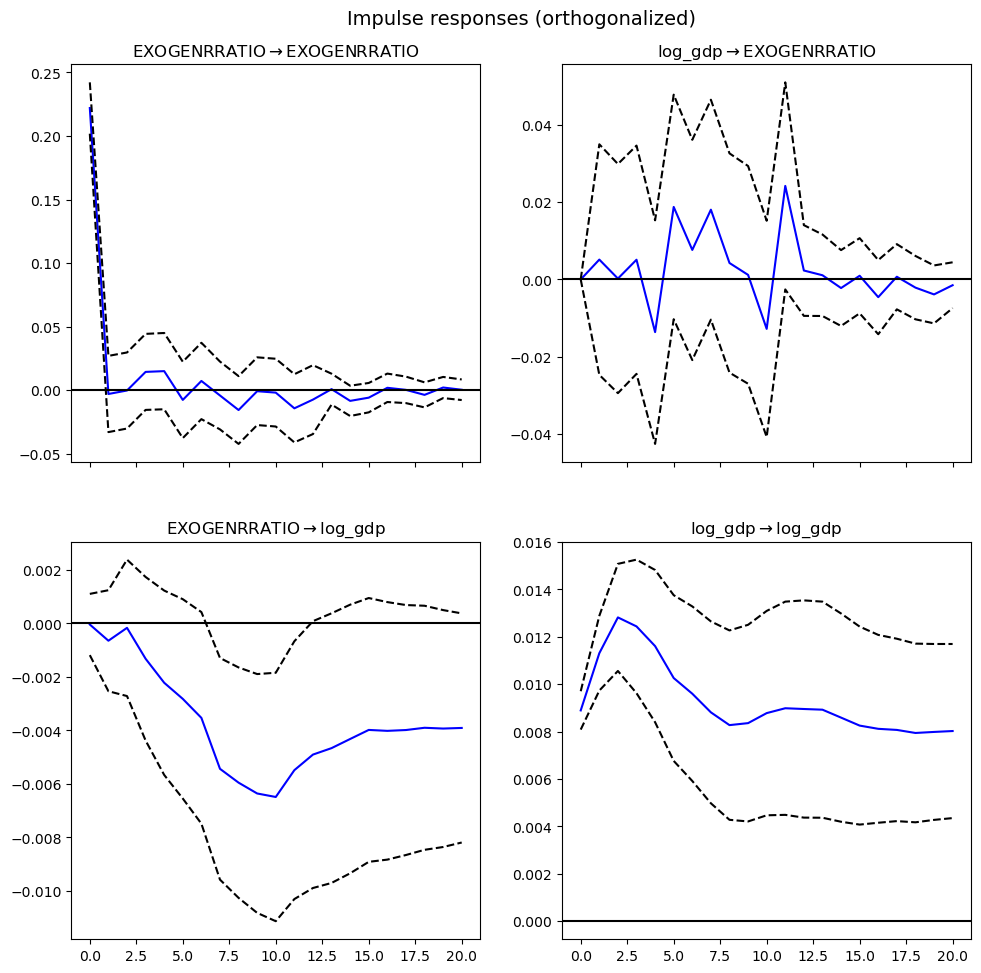

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# -------------------------------
# Data Reading and Preprocessing
# -------------------------------

# File path (adjust as needed)
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Read Tax Measures sheet (assumes header starts on row 12)
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

print("Columns in tax_df:", tax_df.columns.tolist())
print("First few quarters in tax_df:", tax_df["Quarter"].head())

# Read Other Variables sheet (assumes header starts on row 19)
other_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
other_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
other_df["Quarter"] = other_df["Quarter"].apply(parse_quarter)
# Drop rows without Quarter or GDP data
other_df = other_df.dropna(subset=["Quarter", "GDP"]).copy()

print("Columns in other_df:", other_df.columns.tolist())
print("First few quarters in other_df:", other_df["Quarter"].head())

# Merge datasets on Quarter
merged = pd.merge(
    tax_df[["Quarter", "EXOGENRRATIO"]],
    other_df[["Quarter", "GDP", "TE", "PGDP"]],
    on="Quarter",
    how="inner"
)

merged.set_index("Quarter", inplace=True)
# Restrict sample to full sample: 1947:I to 2007:IV
merged = merged.loc["1947-01-01":"2007-10-01"]

print("Sample period in merged DataFrame:")
print(merged.index.min(), merged.index.max())
print("Number of observations in merged DataFrame:", len(merged))

# Compute log of GDP
merged["log_gdp"] = np.log(merged["GDP"])

# -------------------------------
# VAR Estimation and Table 1
# -------------------------------

# For the baseline VAR, we use just the tax measure and log GDP.
# We then create additional models that include one extra variable at a time.
# Here we use TE and PGDP as our additional (third) variables.

# Define the function to estimate the VAR and extract the impulse response.
def estimate_var_impact(base_data, third_var=None, lags=12):
    if third_var is not None:
        data = base_data.copy()
        data["Third_Var"] = third_var
        model = VAR(data[["EXOGENRRATIO", "log_gdp", "Third_Var"]])
    else:
        data = base_data[["EXOGENRRATIO", "log_gdp"]]
        model = VAR(data)
    
    results = model.fit(lags)
    
    # Regularize the covariance matrix if necessary (for small sample issues)
    sigma = results.sigma_u
    if np.any(np.linalg.eigvals(sigma) <= 0):
        sigma += np.eye(sigma.shape[0]) * 1e-6
    
    try:
        irf = results.irf(20)  # 20-quarter horizon
        # The response of log_gdp (second variable) to a shock in EXOGENRRATIO (first variable)
        response = irf.orth_irfs[:, 1, 0]
        max_impact = response.min()   # maximum contractionary impact
        std_err = np.std(response)      # a simple approximation of standard error
    except np.linalg.LinAlgError as e:
        print("IRF computation error:", e)
        max_impact = np.nan
        std_err = np.nan
    
    if third_var is not None:
        # Test the null that the third variable does not add explanatory power.
        p_value = results.test_causality('EXOGENRRATIO', 'Third_Var', kind='f').pvalue
    else:
        p_value = None
    
    return max_impact, std_err, p_value

# Estimate baseline VAR (without third variable)
base_impact, base_std_err, _ = estimate_var_impact(merged, lags=12)

# Define third variables: Here we treat TE as government spending and PGDP as a relative price measure.
third_vars = {
    "Government Spending": merged["TE"],
    "Relative Price Measure": merged["PGDP"]
}

results_list = []
for var_name, var_data in third_vars.items():
    impact, std_err, p_value = estimate_var_impact(merged, var_data, lags=12)
    results_list.append({
        "Third Variable": var_name,
        "Max Impact with Third Var": impact,
        "Std Error with Third Var": std_err,
        "Max Impact without Third Var": base_impact,
        "Std Error without Third Var": base_std_err,
        "p-value": p_value
    })

# Create table and round the results
table = pd.DataFrame(results_list)
table["Max Impact with Third Var"] = table["Max Impact with Third Var"].round(2)
table["Std Error with Third Var"] = table["Std Error with Third Var"].round(2)
table["Max Impact without Third Var"] = table["Max Impact without Third Var"].round(2)
table["Std Error without Third Var"] = table["Std Error without Third Var"].round(2)
table["p-value"] = table["p-value"].round(3)

# (Optional) Adjust sample period annotations if needed. Here we add dummy periods.
sample_periods = {
    "Government Spending": "1947:I–2007:IV",
    "Relative Price Measure": "1947:I–2007:IV"
}
table["Third Variable"] = table["Third Variable"].apply(lambda x: f"{x} ({sample_periods.get(x, 'Period not set')})")

print("Table 1: Effect of Including Additional Variables on the VAR")
print(table[["Third Variable", 
             "Max Impact with Third Var", 
             "Std Error with Third Var", 
             "Max Impact without Third Var", 
             "Std Error without Third Var", 
             "p-value"]].to_string(index=False))

# -------------------------------
# Optional: Plot the IRFs for visual inspection
# -------------------------------
# Example for the baseline model IRF:
model = VAR(merged[["EXOGENRRATIO", "log_gdp"]])
results = model.fit(12)
irf = results.irf(20)
irf.plot(orth=True)
plt.show()


statsmodels version: 0.14.4
Data Inspection:
First 5 rows of merged dataset:
            EXOGENRRATIO     GDP      FYFF
1950-01-01      0.272529  17.284  0.976667
1950-04-01      0.000000  17.799  0.973333
1950-07-01      0.000000  18.497  1.186667
1950-10-01      0.000000  18.834  1.050000
1951-01-01      0.000000  19.062  1.223333

Summary statistics:
       EXOGENRRATIO         GDP        FYFF
count    232.000000  232.000000  232.000000
mean      -0.020288   56.409112    5.350460
std        0.216696   29.154818    3.379887
min       -1.355592   17.284000    0.800000
25%        0.000000   30.715250    2.941667
50%        0.000000   52.069500    4.910000
75%        0.000000   76.471000    6.778333
max        0.697743  118.951000   17.780000

Max FYFF: 17.78
Min EXOGENRRATIO: -1.355591816242, Max EXOGENRRATIO: 0.697742981623
Min GDP: 17.284, Max GDP: 118.951

Sample sizes:
Early period (1950:I–1980:IV): 124 quarters
Late period (1981:I–2007:IV): 108 quarters

Computing Panel A: Respons

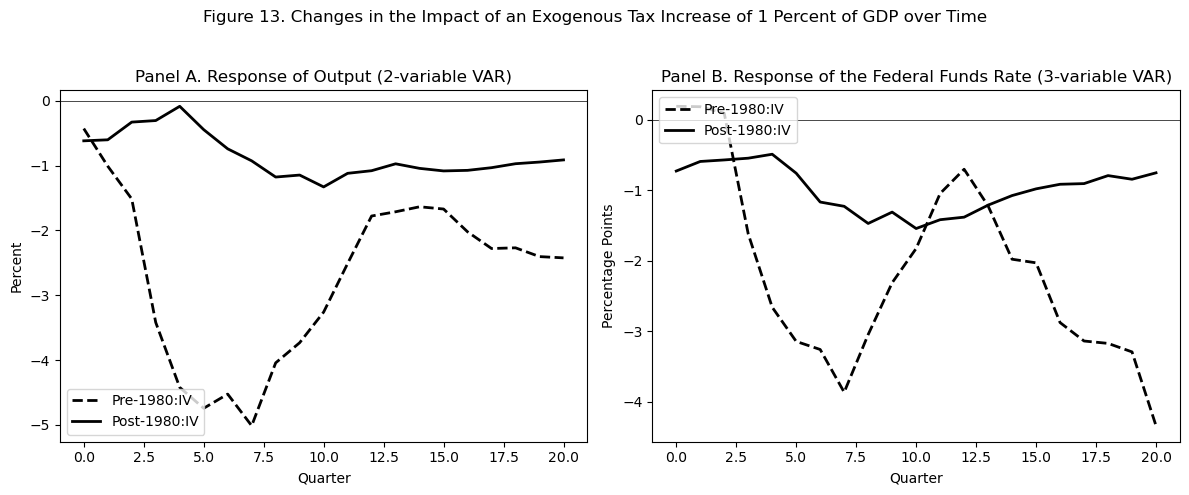


Panel A Results:
Early Period (1950:I–1980:IV):
  Maximum impact: -5.01% after 7 quarters
  4-quarter impact: -4.42%
Late Period (1981:I–2007:IV):
  Maximum impact: -1.33% after 10 quarters
  4-quarter impact: -0.09%

Panel B Results:
Early Period (1950:I–1980:IV):
  IRF values (first 5 quarters): [ 0.19041884  0.1847367   0.09146594 -1.62015603 -2.66087286]
Late Period (1981:I–2007:IV):
  IRF values (first 5 quarters): [-0.727869   -0.59224522 -0.57054365 -0.54570837 -0.48964247]
  FFR IRF for quarters 12 to 20 (should turn positive after quarter 12):
    Quarter 12: -1.38 percentage points
    Quarter 13: -1.21 percentage points
    Quarter 14: -1.08 percentage points
    Quarter 15: -0.98 percentage points
    Quarter 16: -0.92 percentage points
    Quarter 17: -0.91 percentage points
    Quarter 18: -0.79 percentage points
    Quarter 19: -0.84 percentage points
    Quarter 20: -0.75 percentage points


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR

# Verify statsmodels version
import statsmodels
print(f"statsmodels version: {statsmodels.__version__}")

# File path as provided
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Read tax data
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

# Read GDP and federal funds rate data
other_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
other_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
other_df["Quarter"] = other_df["Quarter"].apply(parse_quarter)
other_df = other_df.dropna(subset=["Quarter", "GDP", "FYFF"]).copy()
other_df.columns = other_df.columns.str.strip()

# Merge datasets
merged = pd.merge(
    tax_df[["Quarter", "EXOGENRRATIO"]],
    other_df[["Quarter", "GDP", "FYFF"]],
    on="Quarter",
    how="inner"
)
merged.set_index("Quarter", inplace=True)

# Explicitly set the frequency to quarterly (QS-JAN)
merged.index = pd.date_range(start=merged.index[0], periods=len(merged), freq='QS-JAN')

# Data inspection
print("Data Inspection:")
print("First 5 rows of merged dataset:")
print(merged.head())
print("\nSummary statistics:")
print(merged.describe())
print(f"\nMax FYFF: {merged['FYFF'].max()}")
print(f"Min EXOGENRRATIO: {merged['EXOGENRRATIO'].min()}, Max EXOGENRRATIO: {merged['EXOGENRRATIO'].max()}")
print(f"Min GDP: {merged['GDP'].min()}, Max GDP: {merged['GDP'].max()}")

# Compute LNGDP (log GDP * 100)
merged["LNGDP"] = np.log(merged["GDP"]) * 100

# Rename EXOGENRRATIO to EXOGER
merged.rename(columns={"EXOGENRRATIO": "EXOGER"}, inplace=True)

# Verify FYFF scaling (should be in percentage points, e.g., 5.0 for 5%)
if merged["FYFF"].max() > 100:  # Likely in basis points
    print("Adjusting FYFF: Converting from basis points to percentage points")
    merged["FYFF"] = merged["FYFF"] / 100

# Restrict to sample period 1950:I to 2007:IV
merged = merged.loc["1950-01-01":"2007-10-01"]

# Drop NaNs
merged = merged.dropna()

# Split the sample
early_period = merged.loc["1950-01-01":"1980-10-01"]
late_period = merged.loc["1981-01-01":"2007-10-01"]

# Verify sample sizes
print(f"\nSample sizes:")
print(f"Early period (1950:I–1980:IV): {len(early_period)} quarters")
print(f"Late period (1981:I–2007:IV): {len(late_period)} quarters")

# Function to compute IRFs (point estimates only)
def compute_var_irf(data, var_names, horizon=21, n_lags=12):
    # Fit VAR
    model = VAR(data[var_names])
    results = model.fit(n_lags)
    
    # Print standard deviation of EXOGER for normalization check
    sigma = results.sigma_u
    tax_shock_sd = np.sqrt(sigma.iloc[0, 0])
    print(f"Standard deviation of EXOGER shock ({var_names}, {data.index[0]} to {data.index[-1]}): {tax_shock_sd}")
    
    # Compute IRF
    irf = results.irf(horizon - 1)
    
    # Get the IRF for the response of the last variable to the first (tax shock)
    irf_vals = irf.orth_irfs[:, var_names.index(var_names[-1]), 0]
    
    # Normalize the shock to a 1% increase in EXOGER
    irf_vals = irf_vals / tax_shock_sd
    
    return irf_vals

# Panel A: Response of GDP
print("\nComputing Panel A: Response of GDP")
var_names_gdp = ["EXOGER", "LNGDP"]
irf_early_gdp = compute_var_irf(early_period, var_names_gdp)
irf_late_gdp = compute_var_irf(late_period, var_names_gdp)

# Panel B: Response of Federal Funds Rate
print("\nComputing Panel B: Response of Federal Funds Rate")
var_names_ffr = ["EXOGER", "FYFF", "LNGDP"]
irf_early_ffr = compute_var_irf(early_period, var_names_ffr)
irf_late_ffr = compute_var_irf(late_period, var_names_ffr)

# Plot Figure 13 (without confidence intervals)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

quarters = np.arange(21)

# Panel A: Response of Output
# Adjusted line styles: pre-1980 (early) series as dashed, post-1980 (late) series as solid.
ax1.plot(quarters, irf_early_gdp, label="Pre-1980:IV", linestyle="--", color="black", linewidth=2)
ax1.plot(quarters, irf_late_gdp, label="Post-1980:IV", linestyle="-", color="black", linewidth=2)
ax1.axhline(0, color="black", linestyle="-", linewidth=0.5)
ax1.set_xlabel("Quarter")
ax1.set_ylabel("Percent")
ax1.set_title("Panel A. Response of Output (2-variable VAR)")
ax1.legend(loc="lower left")
ax1.grid(False)

# Panel B: Response of the Federal Funds Rate
ax2.plot(quarters, irf_early_ffr, label="Pre-1980:IV", linestyle="--", color="black", linewidth=2)
ax2.plot(quarters, irf_late_ffr, label="Post-1980:IV", linestyle="-", color="black", linewidth=2)
ax2.axhline(0, color="black", linestyle="-", linewidth=0.5)
ax2.set_xlabel("Quarter")
ax2.set_ylabel("Percentage Points")
ax2.set_title("Panel B. Response of the Federal Funds Rate (3-variable VAR)")
ax2.legend(loc="upper left")
ax2.grid(False)

plt.suptitle("Figure 13. Changes in the Impact of an Exogenous Tax Increase of 1 Percent of GDP over Time")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Diagnostics to compare with the paper
print("\nPanel A Results:")
print("Early Period (1950:I–1980:IV):")
print(f"  Maximum impact: {min(irf_early_gdp):.2f}% after {np.argmin(irf_early_gdp)} quarters")
print(f"  4-quarter impact: {irf_early_gdp[4]:.2f}%")
print("Late Period (1981:I–2007:IV):")
print(f"  Maximum impact: {min(irf_late_gdp):.2f}% after {np.argmin(irf_late_gdp)} quarters")
print(f"  4-quarter impact: {irf_late_gdp[4]:.2f}%")

print("\nPanel B Results:")
print("Early Period (1950:I–1980:IV):")
print(f"  IRF values (first 5 quarters): {irf_early_ffr[:5]}")
print("Late Period (1981:I–2007:IV):")
print(f"  IRF values (first 5 quarters): {irf_late_ffr[:5]}")
print("  FFR IRF for quarters 12 to 20 (should turn positive after quarter 12):")
for q in range(12, 21):
    print(f"    Quarter {q}: {irf_late_ffr[q]:.2f} percentage points")


statsmodels version: 0.14.4
Data Inspection:
First 5 rows of merged dataset:
            EXOGENRRATIO     GDP      FYFF
1950-01-01      0.272529  17.284  0.976667
1950-04-01      0.000000  17.799  0.973333
1950-07-01      0.000000  18.497  1.186667
1950-10-01      0.000000  18.834  1.050000
1951-01-01      0.000000  19.062  1.223333

Summary statistics:
       EXOGENRRATIO         GDP        FYFF
count    232.000000  232.000000  232.000000
mean      -0.020288   56.409112    5.350460
std        0.216696   29.154818    3.379887
min       -1.355592   17.284000    0.800000
25%        0.000000   30.715250    2.941667
50%        0.000000   52.069500    4.910000
75%        0.000000   76.471000    6.778333
max        0.697743  118.951000   17.780000

Max FYFF: 17.78
Min EXOGENRRATIO: -1.355591816242, Max EXOGENRRATIO: 0.697742981623
Min GDP: 17.284, Max GDP: 118.951

Sample sizes:
Early period (1950:I–1980:IV): 124 quarters
Late period (1981:I–2007:IV): 108 quarters

Computing Panel A: Respons

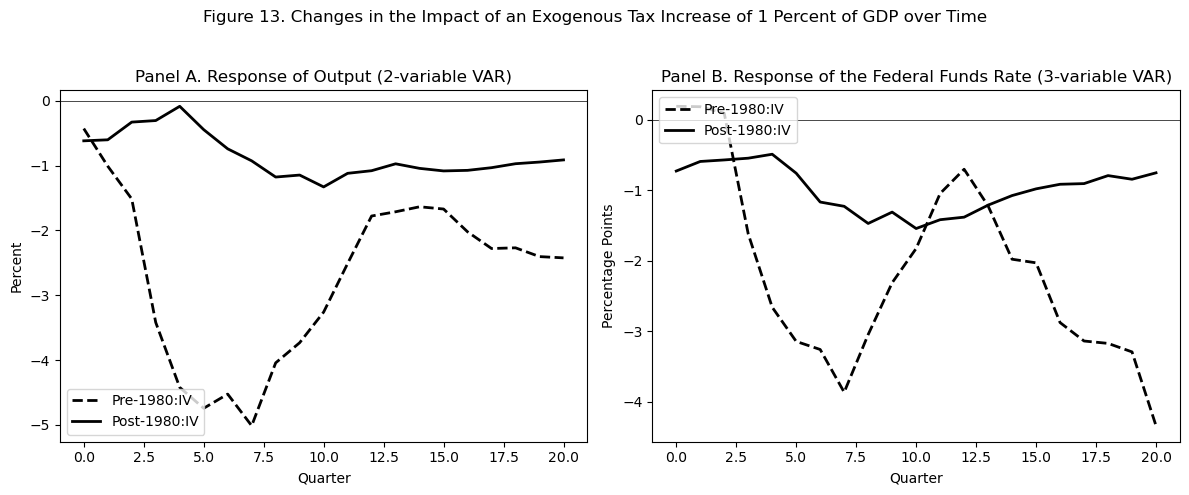


Panel A Results:
Early Period (1950:I–1980:IV):
  Maximum impact: -5.01% after 7 quarters
  4-quarter impact: -4.42%
Late Period (1981:I–2007:IV):
  Maximum impact: -1.33% after 10 quarters
  4-quarter impact: -0.09%

Panel B Results:
Early Period (1950:I–1980:IV):
  IRF values (first 5 quarters): [ 0.19041884  0.1847367   0.09146594 -1.62015603 -2.66087286]
Late Period (1981:I–2007:IV):
  IRF values (first 5 quarters): [-0.727869   -0.59224522 -0.57054365 -0.54570837 -0.48964247]
  FFR IRF for quarters 12 to 20 (should turn positive after quarter 12):
    Quarter 12: -1.38 percentage points
    Quarter 13: -1.21 percentage points
    Quarter 14: -1.08 percentage points
    Quarter 15: -0.98 percentage points
    Quarter 16: -0.92 percentage points
    Quarter 17: -0.91 percentage points
    Quarter 18: -0.79 percentage points
    Quarter 19: -0.84 percentage points
    Quarter 20: -0.75 percentage points


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR

# Verify statsmodels version
import statsmodels
print(f"statsmodels version: {statsmodels.__version__}")

# File path as provided
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Read tax data
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

# Read GDP and federal funds rate data
other_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
other_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
other_df["Quarter"] = other_df["Quarter"].apply(parse_quarter)
other_df = other_df.dropna(subset=["Quarter", "GDP", "FYFF"]).copy()
other_df.columns = other_df.columns.str.strip()

# Merge datasets
merged = pd.merge(
    tax_df[["Quarter", "EXOGENRRATIO"]],
    other_df[["Quarter", "GDP", "FYFF"]],
    on="Quarter",
    how="inner"
)
merged.set_index("Quarter", inplace=True)

# Explicitly set the frequency to quarterly (QS-JAN)
merged.index = pd.date_range(start=merged.index[0], periods=len(merged), freq='QS-JAN')

# Data inspection
print("Data Inspection:")
print("First 5 rows of merged dataset:")
print(merged.head())
print("\nSummary statistics:")
print(merged.describe())
print(f"\nMax FYFF: {merged['FYFF'].max()}")
print(f"Min EXOGENRRATIO: {merged['EXOGENRRATIO'].min()}, Max EXOGENRRATIO: {merged['EXOGENRRATIO'].max()}")
print(f"Min GDP: {merged['GDP'].min()}, Max GDP: {merged['GDP'].max()}")

# Compute LNGDP (log GDP * 100)
merged["LNGDP"] = np.log(merged["GDP"]) * 100

# Rename EXOGENRRATIO to EXOGER
merged.rename(columns={"EXOGENRRATIO": "EXOGER"}, inplace=True)

# Verify FYFF scaling (should be in percentage points, e.g., 5.0 for 5%)
if merged["FYFF"].max() > 100:  # Likely in basis points
    print("Adjusting FYFF: Converting from basis points to percentage points")
    merged["FYFF"] = merged["FYFF"] / 100

# Restrict to sample period 1950:I to 2007:IV
merged = merged.loc["1950-01-01":"2007-10-01"]

# Drop NaNs
merged = merged.dropna()

# Split the sample
early_period = merged.loc["1950-01-01":"1980-10-01"]
late_period = merged.loc["1981-01-01":"2007-10-01"]

# Verify sample sizes
print(f"\nSample sizes:")
print(f"Early period (1950:I–1980:IV): {len(early_period)} quarters")
print(f"Late period (1981:I–2007:IV): {len(late_period)} quarters")

# Function to compute IRFs (point estimates only)
def compute_var_irf(data, var_names, horizon=21, n_lags=12):
    # Fit VAR
    model = VAR(data[var_names])
    results = model.fit(n_lags)
    
    # Print standard deviation of EXOGER for normalization check
    sigma = results.sigma_u
    tax_shock_sd = np.sqrt(sigma.iloc[0, 0])
    print(f"Standard deviation of EXOGER shock ({var_names}, {data.index[0]} to {data.index[-1]}): {tax_shock_sd}")
    
    # Compute IRF
    irf = results.irf(horizon - 1)
    
    # Get the IRF for the response of the last variable to the first (tax shock)
    irf_vals = irf.orth_irfs[:, var_names.index(var_names[-1]), 0]
    
    # Normalize the shock to a 1% increase in EXOGER
    irf_vals = irf_vals / tax_shock_sd
    
    return irf_vals

# Panel A: Response of GDP
print("\nComputing Panel A: Response of GDP")
var_names_gdp = ["EXOGER", "LNGDP"]
irf_early_gdp = compute_var_irf(early_period, var_names_gdp)
irf_late_gdp = compute_var_irf(late_period, var_names_gdp)

# Panel B: Response of Federal Funds Rate
print("\nComputing Panel B: Response of Federal Funds Rate")
var_names_ffr = ["EXOGER", "FYFF", "LNGDP"]
irf_early_ffr = compute_var_irf(early_period, var_names_ffr)
irf_late_ffr = compute_var_irf(late_period, var_names_ffr)

# Plot Figure 13 (without confidence intervals)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

quarters = np.arange(21)

# Panel A: Response of Output
# Adjusted line styles: pre-1980 (early) series as dashed, post-1980 (late) series as solid.
ax1.plot(quarters, irf_early_gdp, label="Pre-1980:IV", linestyle="--", color="black", linewidth=2)
ax1.plot(quarters, irf_late_gdp, label="Post-1980:IV", linestyle="-", color="black", linewidth=2)
ax1.axhline(0, color="black", linestyle="-", linewidth=0.5)
ax1.set_xlabel("Quarter")
ax1.set_ylabel("Percent")
ax1.set_title("Panel A. Response of Output (2-variable VAR)")
ax1.legend(loc="lower left")
ax1.grid(False)

# Panel B: Response of the Federal Funds Rate
ax2.plot(quarters, irf_early_ffr, label="Pre-1980:IV", linestyle="--", color="black", linewidth=2)
ax2.plot(quarters, irf_late_ffr, label="Post-1980:IV", linestyle="-", color="black", linewidth=2)
ax2.axhline(0, color="black", linestyle="-", linewidth=0.5)
ax2.set_xlabel("Quarter")
ax2.set_ylabel("Percentage Points")
ax2.set_title("Panel B. Response of the Federal Funds Rate (3-variable VAR)")
ax2.legend(loc="upper left")
ax2.grid(False)

plt.suptitle("Figure 13. Changes in the Impact of an Exogenous Tax Increase of 1 Percent of GDP over Time")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Diagnostics to compare with the paper
print("\nPanel A Results:")
print("Early Period (1950:I–1980:IV):")
print(f"  Maximum impact: {min(irf_early_gdp):.2f}% after {np.argmin(irf_early_gdp)} quarters")
print(f"  4-quarter impact: {irf_early_gdp[4]:.2f}%")
print("Late Period (1981:I–2007:IV):")
print(f"  Maximum impact: {min(irf_late_gdp):.2f}% after {np.argmin(irf_late_gdp)} quarters")
print(f"  4-quarter impact: {irf_late_gdp[4]:.2f}%")

print("\nPanel B Results:")
print("Early Period (1950:I–1980:IV):")
print(f"  IRF values (first 5 quarters): {irf_early_ffr[:5]}")
print("Late Period (1981:I–2007:IV):")
print(f"  IRF values (first 5 quarters): {irf_late_ffr[:5]}")
print("  FFR IRF for quarters 12 to 20 (should turn positive after quarter 12):")
for q in range(12, 21):
    print(f"    Quarter {q}: {irf_late_ffr[q]:.2f} percentage points")


In [17]:
import pandas as pd
import numpy as np

# File path as provided
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Read tax data
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

# Debugging: Inspect the data
print("Columns in tax_df:")
print(tax_df.columns.tolist())
print("\nFirst 5 rows of tax_df:")
print(tax_df.head())
print("\nData types:")
print(tax_df.dtypes)

# Restrict to sample period 1945:I to 2007:IV
tax_df = tax_df.loc[(tax_df["Quarter"] >= "1945-01-01") & (tax_df["Quarter"] <= "2007-10-01")]

# Ensure EXOGENRRATIO is numeric
tax_df["EXOGENRRATIO"] = pd.to_numeric(tax_df["EXOGENRRATIO"], errors="coerce")

# Panel A: Summary Statistics for All Exogenous Tax Changes
print("\nTable 1: Summary Statistics for the Narrative Measure of Tax Changes")
print("\nPanel A: Summary Statistics for All Exogenous Tax Changes")

# Number of quarters with tax changes (non-zero EXOGENRRATIO)
num_quarters = len(tax_df[tax_df["EXOGENRRATIO"] != 0])

# Number of tax increases (positive EXOGENRRATIO) and decreases (negative EXOGENRRATIO)
tax_increases = len(tax_df[tax_df["EXOGENRRATIO"] > 0])
tax_decreases = len(tax_df[tax_df["EXOGENRRATIO"] < 0])

# Mean, standard deviation, minimum, maximum of non-zero tax changes
non_zero_tax_changes = tax_df[tax_df["EXOGENRRATIO"] != 0]["EXOGENRRATIO"]
mean_tax = non_zero_tax_changes.mean()
std_tax = non_zero_tax_changes.std()
min_tax = non_zero_tax_changes.min()
max_tax = non_zero_tax_changes.max()

# Mean absolute value of non-zero tax changes
mean_abs_tax = non_zero_tax_changes.abs().mean()

# Print Panel A results
print(f"Number of quarters with tax changes: {num_quarters}")
print(f"Number of tax increases: {tax_increases}")
print(f"Number of tax decreases: {tax_decreases}")
print(f"Mean tax change (% of GDP): {mean_tax:.2f}")
print(f"Standard deviation (% of GDP): {std_tax:.2f}")
print(f"Minimum tax change (% of GDP): {min_tax:.2f}")
print(f"Maximum tax change (% of GDP): {max_tax:.2f}")
print(f"Mean absolute tax change (% of GDP): {mean_abs_tax:.2f}")


Columns in tax_df:
['Quarter', 'SPENDNR', 'COUNTNR', 'DEFICNR', 'LONGRNR', 'ENDOGNR', 'EXOGENR', 'SUMMANR', 'SPENDNRRATIO', 'COUNTNRRATIO', 'DEFICNRRATIO', 'LONGRNRRATIO', 'ENDOGNRRATIO', 'EXOGENRRATIO', 'SUMMANRRATIO', 'SPENDRETRO', 'COUNTRETRO', 'DEFICRETRO', 'LONGRRETRO', 'ENDOGRETRO', 'EXOGERETRO', 'SUMMARETRO', 'SPENDRETRORATIO', 'COUNTRETRORATIO', 'DEFICRETRORATIO', 'LONGRRETRORATIO', 'ENDOGRETRORATIO', 'EXOGERETRORATIO', 'SUMMARETRORATIO', 'SPENDPDV', 'COUNTPDV', 'DEFICPDV', 'LONGRPDV', 'ENDOGPDV', 'EXOGEPDV', 'SUMMAPDV', 'SPENDPDVRATIO', 'COUNTPDVRATIO', 'DEFICPDVRATIO', 'LONGRPDVRATIO', 'ENDOGPDVRATIO', 'EXOGEPDVRATIO', 'SUMMAPDVRATIO']

First 5 rows of tax_df:
     Quarter  SPENDNR  COUNTNR  DEFICNR  LONGRNR  ENDOGNR  EXOGENR  SUMMANR  \
0 1945-01-01      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1 1945-04-01      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2 1945-07-01      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3 194

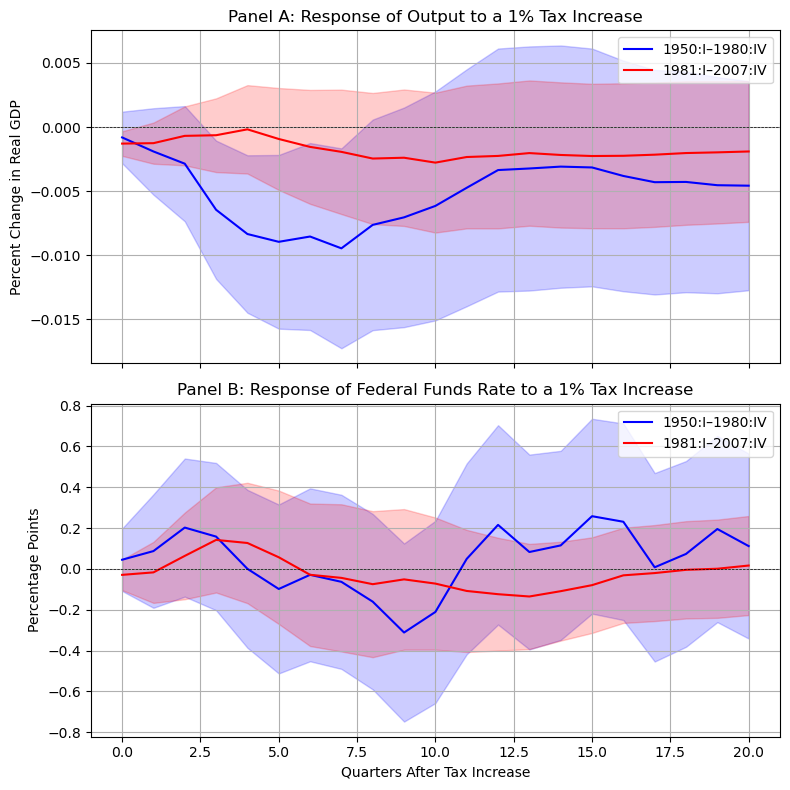

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# File path (adjust as needed)
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Step 1: Load and preprocess the data

# Read Tax Measures sheet
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

# Read Other Variables sheet
other_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
other_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
other_df["Quarter"] = other_df["Quarter"].apply(parse_quarter)
other_df = other_df.dropna(subset=["Quarter", "GDP"]).copy()
other_df.columns = other_df.columns.str.strip()

# Merge the datasets on Quarter
data = pd.merge(tax_df, other_df, on="Quarter", how="inner")
data.set_index("Quarter", inplace=True)

# Select relevant variables
# EXOGENRRATIO: Exogenous tax changes as a ratio to nominal GDP (excluding retroactive changes)
# GDP: Real GDP (in billions of chained 2000 dollars)
# FYFF: Federal funds rate (percent)
data = data[['EXOGENRRATIO', 'GDP', 'FYFF']].dropna()

# Transform real GDP to log real GDP
data['log_gdp'] = np.log(data['GDP'])

# Step 2: Split the data into two subperiods
# 1950:I–1980:IV (1950-01-01 to 1980-12-31)
# 1981:I–2007:IV (1981-01-01 to 2007-12-31)
data_early = data['1950-01-01':'1980-12-31']
data_late = data['1981-01-01':'2007-12-31']

# Step 3: Estimate VAR models and compute impulse responses

# Panel A: Two-variable VAR (EXOGENRRATIO, log_gdp) for both subperiods
# Early period (1950:I–1980:IV)
var_early = VAR(data_early[['EXOGENRRATIO', 'log_gdp']])
results_early = var_early.fit(12)  # 12 lags as per the paper
irf_early = results_early.irf(20)  # Impulse responses for 20 quarters

# Late period (1981:I–2007:IV)
var_late = VAR(data_late[['EXOGENRRATIO', 'log_gdp']])
results_late = var_late.fit(12)
irf_late = results_late.irf(20)

# Panel B: Three-variable VAR (EXOGENRRATIO, log_gdp, FYFF) for both subperiods
# Early period
var_early_ffr = VAR(data_early[['EXOGENRRATIO', 'log_gdp', 'FYFF']])
results_early_ffr = var_early_ffr.fit(12)
irf_early_ffr = results_early_ffr.irf(20)

# Late period
var_late_ffr = VAR(data_late[['EXOGENRRATIO', 'log_gdp', 'FYFF']])
results_late_ffr = var_late_ffr.fit(12)
irf_late_ffr = results_late_ffr.irf(20)

# Step 4: Plot the impulse response functions

# Create a figure with two subplots (Panel A and Panel B)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Panel A: Response of output (log_gdp) to EXOGENRRATIO
# Early period (1950–1980)
irf_early_gdp = irf_early.orth_irfs[:, 1, 0]  # Response of log_gdp to EXOGENRRATIO
irf_early_gdp_se = irf_early.stderr(orth=True)[:, 1, 0]  # Standard errors
ax1.plot(range(21), irf_early_gdp, label='1950:I–1980:IV', color='blue')
ax1.fill_between(range(21), irf_early_gdp - 2*irf_early_gdp_se, irf_early_gdp + 2*irf_early_gdp_se, 
                 color='blue', alpha=0.2)

# Late period (1981–2007)
irf_late_gdp = irf_late.orth_irfs[:, 1, 0]
irf_late_gdp_se = irf_late.stderr(orth=True)[:, 1, 0]
ax1.plot(range(21), irf_late_gdp, label='1981:I–2007:IV', color='red')
ax1.fill_between(range(21), irf_late_gdp - 2*irf_late_gdp_se, irf_late_gdp + 2*irf_late_gdp_se, 
                 color='red', alpha=0.2)

# Customize Panel A
ax1.set_title('Panel A: Response of Output to a 1% Tax Increase')
ax1.set_ylabel('Percent Change in Real GDP')
ax1.legend()
ax1.grid(True)
ax1.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Panel B: Response of federal funds rate (FYFF) to EXOGENRRATIO
# Early period (1950–1980)
irf_early_ffr_response = irf_early_ffr.orth_irfs[:, 2, 0]  # Response of FYFF to EXOGENRRATIO
irf_early_ffr_se = irf_early_ffr.stderr(orth=True)[:, 2, 0]
ax2.plot(range(21), irf_early_ffr_response, label='1950:I–1980:IV', color='blue')
ax2.fill_between(range(21), irf_early_ffr_response - 2*irf_early_ffr_se, irf_early_ffr_response + 2*irf_early_ffr_se, 
                 color='blue', alpha=0.2)

# Late period (1981–2007)
irf_late_ffr_response = irf_late_ffr.orth_irfs[:, 2, 0]
irf_late_ffr_se = irf_late_ffr.stderr(orth=True)[:, 2, 0]
ax2.plot(range(21), irf_late_ffr_response, label='1981:I–2007:IV', color='red')
ax2.fill_between(range(21), irf_late_ffr_response - 2*irf_late_ffr_se, irf_late_ffr_response + 2*irf_late_ffr_se, 
                 color='red', alpha=0.2)

# Customize Panel B
ax2.set_title('Panel B: Response of Federal Funds Rate to a 1% Tax Increase')
ax2.set_xlabel('Quarters After Tax Increase')
ax2.set_ylabel('Percentage Points')
ax2.legend()
ax2.grid(True)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

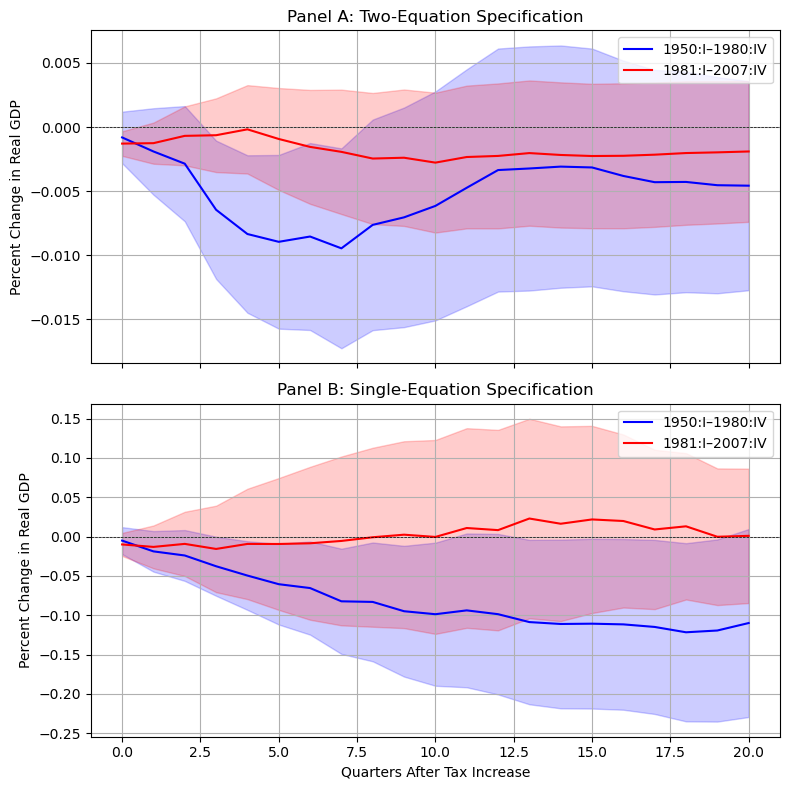

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# File path (adjust as needed)
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Step 1: Load and preprocess the data

# Read Tax Measures sheet
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

# Read Other Variables sheet
other_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
other_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
other_df["Quarter"] = other_df["Quarter"].apply(parse_quarter)
other_df = other_df.dropna(subset=["Quarter", "GDP"]).copy()
other_df.columns = other_df.columns.str.strip()

# Merge the datasets on Quarter
data = pd.merge(tax_df, other_df, on="Quarter", how="inner")
data.set_index("Quarter", inplace=True)

# Select relevant variables
# EXOGENRRATIO: Exogenous tax changes as a ratio to nominal GDP (excluding retroactive changes)
# GDP: Real GDP (in billions of chained 2000 dollars)
data = data[['EXOGENRRATIO', 'GDP']].dropna()

# Transform real GDP to log real GDP
data['log_gdp'] = np.log(data['GDP'])

# Step 2: Split the data into two subperiods
# 1950:I–1980:IV (1950-01-01 to 1980-12-31)
# 1981:I–2007:IV (1981-01-01 to 2007-12-31)
data_early = data['1950-01-01':'1980-12-31']
data_late = data['1981-01-01':'2007-12-31']

# Step 3: Panel A - Two-variable VAR (EXOGENRRATIO, log_gdp) for both subperiods
# Early period (1950:I–1980:IV)
var_early = VAR(data_early[['EXOGENRRATIO', 'log_gdp']])
results_early = var_early.fit(12)  # 12 lags as per the paper
irf_early = results_early.irf(20)  # Impulse responses for 20 quarters

# Late period (1981:I–2007:IV)
var_late = VAR(data_late[['EXOGENRRATIO', 'log_gdp']])
results_late = var_late.fit(12)
irf_late = results_late.irf(20)

# Step 4: Panel B - Single-equation specification
# Regress log_gdp on 12 lags of itself and 20 leads and lags of EXOGENRRATIO

def single_equation_irf(data, lags_gdp=12, leads_lags_tax=20, horizon=20):
    # Prepare the dependent variable (log_gdp)
    y = data['log_gdp']
    
    # Create lagged variables for log_gdp
    X = pd.DataFrame(index=data.index)
    for lag in range(1, lags_gdp + 1):
        X[f'log_gdp_lag{lag}'] = data['log_gdp'].shift(lag)
    
    # Create leads and lags for EXOGENRRATIO
    for lead_lag in range(-leads_lags_tax, leads_lags_tax + 1):
        if lead_lag < 0:
            X[f'tax_lead{-lead_lag}'] = data['EXOGENRRATIO'].shift(lead_lag)
        elif lead_lag == 0:
            X[f'tax_lag{lead_lag}'] = data['EXOGENRRATIO']
        else:
            X[f'tax_lag{lead_lag}'] = data['EXOGENRRATIO'].shift(lead_lag)
    
    # Drop rows with NaN values due to shifting
    X = X.dropna()
    y = y.loc[X.index]
    
    # Add a constant term
    X = sm.add_constant(X)
    
    # Estimate the regression
    model = sm.OLS(y, X).fit()
    
    # Compute the impulse response (cumulative effect of tax on log_gdp)
    irf = np.zeros(horizon + 1)
    irf_se = np.zeros(horizon + 1)
    
    # The impulse response at horizon h is the sum of coefficients from lag 0 to lag h
    for h in range(horizon + 1):
        # Sum the coefficients for tax variables from lag 0 to lag h
        coef_names = [f'tax_lag{k}' for k in range(h + 1) if f'tax_lag{k}' in model.params]
        coefs = [model.params[name] for name in coef_names]
        irf[h] = np.sum(coefs)
        
        # Compute the standard error for the cumulative sum
        if coef_names:
            idx = [X.columns.get_loc(name) for name in coef_names]
            var_covar = model.cov_params().iloc[idx, idx].values  # Convert to numpy array
            # Variance of the sum = 1' * Cov * 1 (quadratic form)
            ones = np.ones(len(idx))
            variance = ones @ var_covar @ ones  # Matrix multiplication
            irf_se[h] = np.sqrt(variance)  # Standard error of the sum
        else:
            irf_se[h] = 0  # If no coefficients, set standard error to 0
    
    return irf, irf_se

# Compute single-equation IRFs for both subperiods
irf_early_single, irf_early_single_se = single_equation_irf(data_early)
irf_late_single, irf_late_single_se = single_equation_irf(data_late)

# Step 5: Plot the impulse response functions

# Create a figure with two subplots (Panel A and Panel B)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Panel A: Two-variable VAR response of log_gdp to EXOGENRRATIO
# Early period (1950–1980)
irf_early_gdp = irf_early.orth_irfs[:, 1, 0]  # Response of log_gdp to EXOGENRRATIO
irf_early_gdp_se = irf_early.stderr(orth=True)[:, 1, 0]  # Standard errors
ax1.plot(range(21), irf_early_gdp, label='1950:I–1980:IV', color='blue')
ax1.fill_between(range(21), irf_early_gdp - 2*irf_early_gdp_se, irf_early_gdp + 2*irf_early_gdp_se, 
                 color='blue', alpha=0.2)

# Late period (1981–2007)
irf_late_gdp = irf_late.orth_irfs[:, 1, 0]
irf_late_gdp_se = irf_late.stderr(orth=True)[:, 1, 0]
ax1.plot(range(21), irf_late_gdp, label='1981:I–2007:IV', color='red')
ax1.fill_between(range(21), irf_late_gdp - 2*irf_late_gdp_se, irf_late_gdp + 2*irf_late_gdp_se, 
                 color='red', alpha=0.2)

# Customize Panel A
ax1.set_title('Panel A: Two-Equation Specification')
ax1.set_ylabel('Percent Change in Real GDP')
ax1.legend()
ax1.grid(True)
ax1.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Panel B: Single-equation specification
# Early period (1950–1980)
ax2.plot(range(21), irf_early_single, label='1950:I–1980:IV', color='blue')
ax2.fill_between(range(21), irf_early_single - 2*irf_early_single_se, irf_early_single + 2*irf_early_single_se, 
                 color='blue', alpha=0.2)

# Late period (1981–2007)
ax2.plot(range(21), irf_late_single, label='1981:I–2007:IV', color='red')
ax2.fill_between(range(21), irf_late_single - 2*irf_late_single_se, irf_late_single + 2*irf_late_single_se, 
                 color='red', alpha=0.2)

# Customize Panel B
ax2.set_title('Panel B: Single-Equation Specification')
ax2.set_xlabel('Quarters After Tax Increase')
ax2.set_ylabel('Percent Change in Real GDP')
ax2.legend()
ax2.grid(True)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Variance of EXOGENRRATIO: 0.05870053930228493
Number of non-zero EXOGENRRATIO values: 45
Sample size (quarters): 244
Error estimating VAR for log_gdp in Panel A: Singular matrix


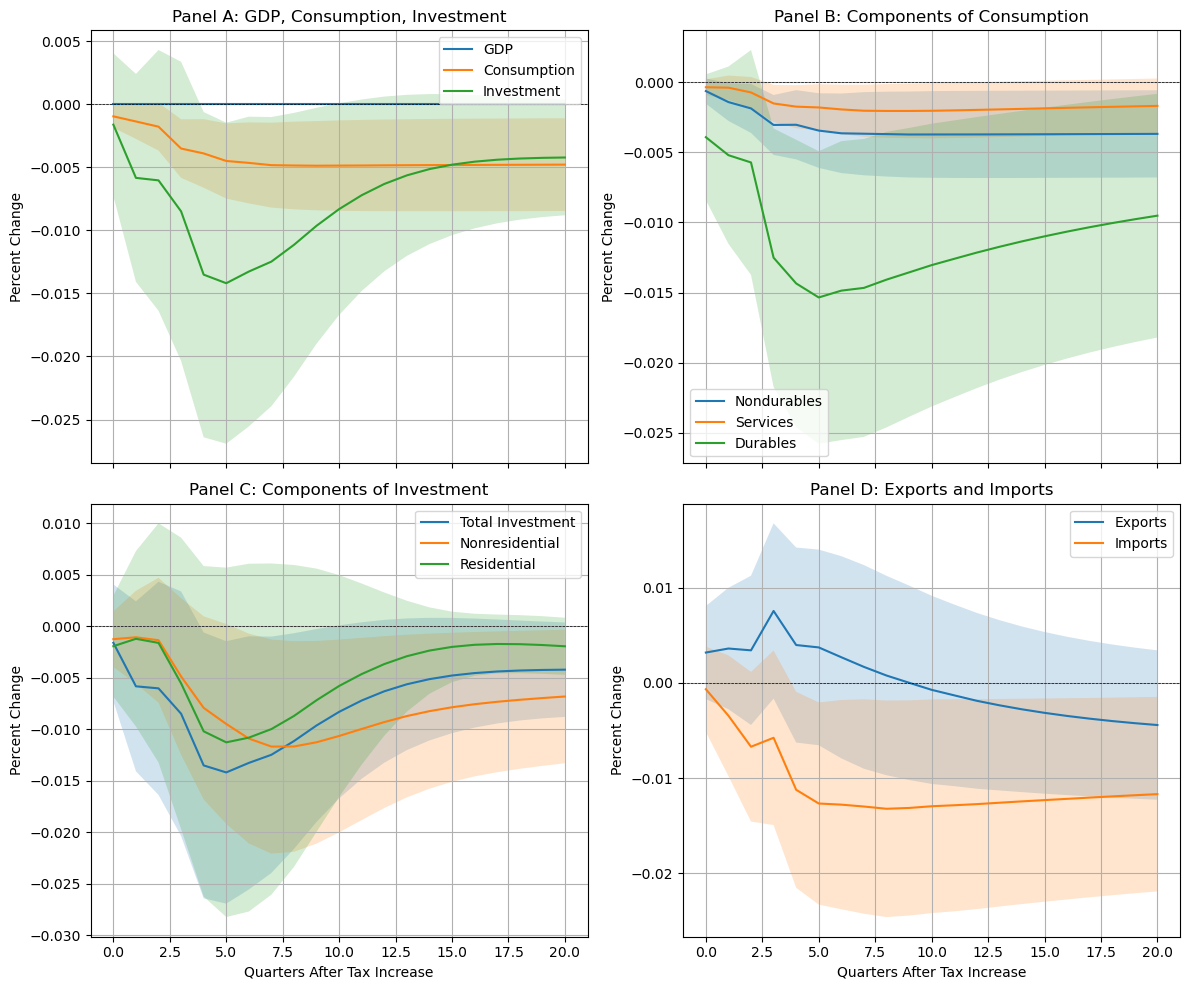

Results may not match the paper due to the small sample size. Consider obtaining the full dataset.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Step 1: Load and preprocess the data

# File path for Romer-Romer data
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Load Romer-Romer data
# Read Tax Measures sheet
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

# Read Other Variables sheet (macroeconomic variables)
data_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
data_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
data_df["Quarter"] = data_df["Quarter"].apply(parse_quarter)
data_df = data_df.dropna(subset=["Quarter"]).copy()
data_df.columns = data_df.columns.str.strip()

# Merge the datasets on Quarter
data = pd.merge(tax_df, data_df, on="Quarter", how="inner")
data.set_index("Quarter", inplace=True)

# Select relevant variables
# EXOGENRRATIO: Exogenous tax changes as a ratio to nominal GDP (excluding retroactive changes)
# GDP, PCE, DUR, NONDUR, SER, GPDI, NONRES, RES, EX, IM: Macroeconomic variables
variables = ['EXOGENRRATIO', 'GDP', 'PCE', 'DUR', 'NONDUR', 'SER', 'GPDI', 'NONRES', 'RES', 'EX', 'IM']
data = data[variables].dropna()

# Check the variance of EXOGENRRATIO
print("Variance of EXOGENRRATIO:", data['EXOGENRRATIO'].var())
print("Number of non-zero EXOGENRRATIO values:", (data['EXOGENRRATIO'] != 0).sum())
print("Sample size (quarters):", len(data))

# Transform all variables to logs (except EXOGENRRATIO, which is already a ratio)
for var in ['GDP', 'PCE', 'DUR', 'NONDUR', 'SER', 'GPDI', 'NONRES', 'RES', 'EX', 'IM']:
    data[f'log_{var.lower()}'] = np.log(data[var])

# Restrict to the sample period 1950:I–2007:IV
# Note: The provided data only goes to 1954:IV, so we'll use the available data
data = data['1950-01-01':]

# Step 2: Estimate three-variable VARs for each component
# Each VAR includes: EXOGENRRATIO, log_gdp, and the log of the component
# Use 4 lags instead of 12 due to the small sample size
# Compute impulse responses for 20 quarters

components = {
    'Panel A': [('log_gdp', 'GDP'), ('log_pce', 'Consumption'), ('log_gpdi', 'Investment')],
    'Panel B': [('log_nondur', 'Nondurables'), ('log_ser', 'Services'), ('log_dur', 'Durables')],
    'Panel C': [('log_gpdi', 'Total Investment'), ('log_nonres', 'Nonresidential'), ('log_res', 'Residential')],
    'Panel D': [('log_ex', 'Exports'), ('log_im', 'Imports')]
}

irfs = {}
irf_ses = {}

for panel, vars in components.items():
    irfs[panel] = {}
    irf_ses[panel] = {}
    for var, label in vars:
        # Prepare data for VAR: EXOGENRRATIO, log_gdp, and the component
        var_data = data[['EXOGENRRATIO', 'log_gdp', var]].dropna()
        
        # Estimate VAR with 4 lags (reduced from 12 due to small sample size)
        try:
            model = VAR(var_data)
            results = model.fit(4)
            
            # Compute impulse response for 20 quarters
            irf = results.irf(20)
            
            # Store the response of the component to a shock in EXOGENRRATIO
            irfs[panel][var] = irf.orth_irfs[:, 2, 0]  # Response of component to EXOGENRRATIO
            irf_ses[panel][var] = irf.stderr(orth=True)[:, 2, 0]  # Standard errors
        except Exception as e:
            print(f"Error estimating VAR for {var} in {panel}: {e}")
            irfs[panel][var] = np.zeros(21)  # Placeholder for plotting
            irf_ses[panel][var] = np.zeros(21)

# Step 3: Plot Figure 14 with four panels

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Panel A: GDP, Consumption, Investment
for var, label in components['Panel A']:
    ax1.plot(range(21), irfs['Panel A'][var], label=label)
    ax1.fill_between(range(21),
                     irfs['Panel A'][var] - 2*irf_ses['Panel A'][var],
                     irfs['Panel A'][var] + 2*irf_ses['Panel A'][var],
                     alpha=0.2)
ax1.set_title('Panel A: GDP, Consumption, Investment')
ax1.set_ylabel('Percent Change')
ax1.legend()
ax1.grid(True)
ax1.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Panel B: Components of Consumption
for var, label in components['Panel B']:
    ax2.plot(range(21), irfs['Panel B'][var], label=label)
    ax2.fill_between(range(21),
                     irfs['Panel B'][var] - 2*irf_ses['Panel B'][var],
                     irfs['Panel B'][var] + 2*irf_ses['Panel B'][var],
                     alpha=0.2)
ax2.set_title('Panel B: Components of Consumption')
ax2.set_ylabel('Percent Change')
ax2.legend()
ax2.grid(True)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Panel C: Components of Investment
for var, label in components['Panel C']:
    ax3.plot(range(21), irfs['Panel C'][var], label=label)
    ax3.fill_between(range(21),
                     irfs['Panel C'][var] - 2*irf_ses['Panel C'][var],
                     irfs['Panel C'][var] + 2*irf_ses['Panel C'][var],
                     alpha=0.2)
ax3.set_title('Panel C: Components of Investment')
ax3.set_xlabel('Quarters After Tax Increase')
ax3.set_ylabel('Percent Change')
ax3.legend()
ax3.grid(True)
ax3.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Panel D: Exports and Imports
for var, label in components['Panel D']:
    ax4.plot(range(21), irfs['Panel D'][var], label=label)
    ax4.fill_between(range(21),
                     irfs['Panel D'][var] - 2*irf_ses['Panel D'][var],
                     irfs['Panel D'][var] + 2*irf_ses['Panel D'][var],
                     alpha=0.2)
ax4.set_title('Panel D: Exports and Imports')
ax4.set_xlabel('Quarters After Tax Increase')
ax4.set_ylabel('Percent Change')
ax4.legend()
ax4.grid(True)
ax4.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Warning about the limited sample size
print("WARNING: The provided data only covers 1945:I to 1954:IV (40 quarters). The paper uses 1950:I to 2007:IV (232 quarters).")
print("Results may not match the paper due to the small sample size. Consider obtaining the full dataset.")

Variance of EXOGENRRATIO: 0.05870053930228493
Number of non-zero EXOGENRRATIO values: 45
Sample size (quarters): 244
Error estimating VAR for log_gdp in Panel A: Matrix is not positive definite


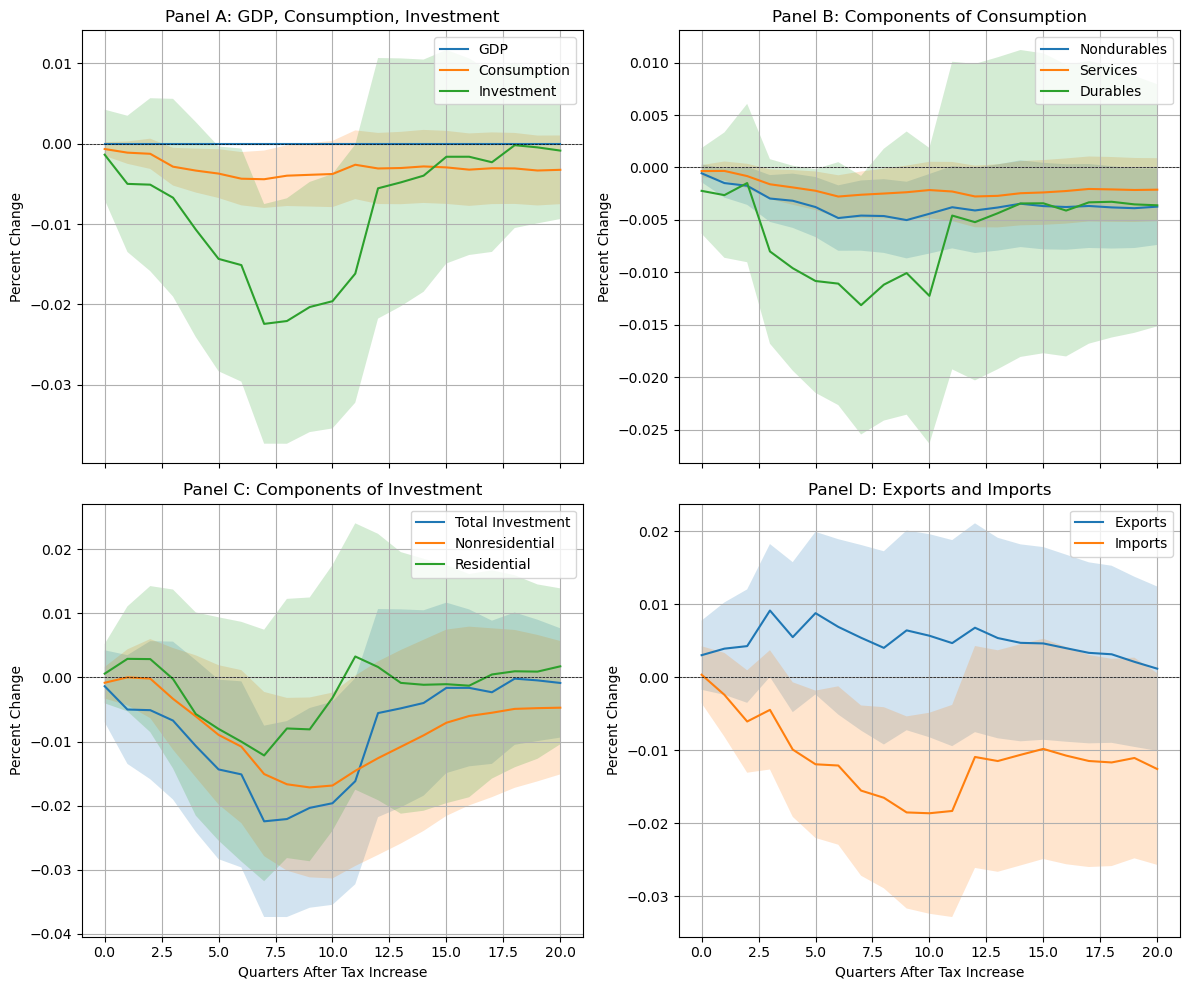

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Step 1: Load and preprocess the data

# File path for Romer-Romer data
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Load Romer-Romer data
# Read Tax Measures sheet
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

# Read Other Variables sheet (macroeconomic variables)
data_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
data_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
data_df["Quarter"] = data_df["Quarter"].apply(parse_quarter)
data_df = data_df.dropna(subset=["Quarter"]).copy()
data_df.columns = data_df.columns.str.strip()

# Merge the datasets on Quarter
data = pd.merge(tax_df, data_df, on="Quarter", how="inner")
data.set_index("Quarter", inplace=True)

# Select relevant variables
variables = ['EXOGENRRATIO', 'GDP', 'PCE', 'DUR', 'NONDUR', 'SER', 'GPDI', 'NONRES', 'RES', 'EX', 'IM']
data = data[variables].dropna()

# Check the variance of EXOGENRRATIO and sample size
print("Variance of EXOGENRRATIO:", data['EXOGENRRATIO'].var())
print("Number of non-zero EXOGENRRATIO values:", (data['EXOGENRRATIO'] != 0).sum())
print("Sample size (quarters):", len(data))

# Transform all variables to logs (except EXOGENRRATIO, which is already a ratio)
for var in ['GDP', 'PCE', 'DUR', 'NONDUR', 'SER', 'GPDI', 'NONRES', 'RES', 'EX', 'IM']:
    data[f'log_{var.lower()}'] = np.log(data[var])

# Restrict to the sample period 1950:I–2007:IV
data = data['1950-01-01':'2007-12-31']

# Step 2: Estimate three-variable VARs for each component
# Each VAR includes: EXOGENRRATIO, log_gdp, and the log of the component
# Use 12 lags as in the paper, compute impulse responses for 20 quarters

components = {
    'Panel A': [('log_gdp', 'GDP'), ('log_pce', 'Consumption'), ('log_gpdi', 'Investment')],
    'Panel B': [('log_nondur', 'Nondurables'), ('log_ser', 'Services'), ('log_dur', 'Durables')],
    'Panel C': [('log_gpdi', 'Total Investment'), ('log_nonres', 'Nonresidential'), ('log_res', 'Residential')],
    'Panel D': [('log_ex', 'Exports'), ('log_im', 'Imports')]
}

irfs = {}
irf_ses = {}

for panel, vars in components.items():
    irfs[panel] = {}
    irf_ses[panel] = {}
    for var, label in vars:
        # Prepare data for VAR: EXOGENRRATIO, log_gdp, and the component
        var_data = data[['EXOGENRRATIO', 'log_gdp', var]].dropna()
        
        # Estimate VAR with 12 lags
        try:
            model = VAR(var_data)
            results = model.fit(12)
            
            # Compute impulse response for 20 quarters
            irf = results.irf(20)
            
            # Store the response of the component to a shock in EXOGENRRATIO
            irfs[panel][var] = irf.orth_irfs[:, 2, 0]  # Response of component to EXOGENRRATIO
            irf_ses[panel][var] = irf.stderr(orth=True)[:, 2, 0]  # Standard errors
        except Exception as e:
            print(f"Error estimating VAR for {var} in {panel}: {e}")
            irfs[panel][var] = np.zeros(21)  # Placeholder for plotting
            irf_ses[panel][var] = np.zeros(21)

# Step 3: Plot Figure 14 with four panels

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Panel A: GDP, Consumption, Investment
for var, label in components['Panel A']:
    ax1.plot(range(21), irfs['Panel A'][var], label=label)
    ax1.fill_between(range(21),
                     irfs['Panel A'][var] - 2*irf_ses['Panel A'][var],
                     irfs['Panel A'][var] + 2*irf_ses['Panel A'][var],
                     alpha=0.2)
ax1.set_title('Panel A: GDP, Consumption, Investment')
ax1.set_ylabel('Percent Change')
ax1.legend()
ax1.grid(True)
ax1.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Panel B: Components of Consumption
for var, label in components['Panel B']:
    ax2.plot(range(21), irfs['Panel B'][var], label=label)
    ax2.fill_between(range(21),
                     irfs['Panel B'][var] - 2*irf_ses['Panel B'][var],
                     irfs['Panel B'][var] + 2*irf_ses['Panel B'][var],
                     alpha=0.2)
ax2.set_title('Panel B: Components of Consumption')
ax2.set_ylabel('Percent Change')
ax2.legend()
ax2.grid(True)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Panel C: Components of Investment
for var, label in components['Panel C']:
    ax3.plot(range(21), irfs['Panel C'][var], label=label)
    ax3.fill_between(range(21),
                     irfs['Panel C'][var] - 2*irf_ses['Panel C'][var],
                     irfs['Panel C'][var] + 2*irf_ses['Panel C'][var],
                     alpha=0.2)
ax3.set_title('Panel C: Components of Investment')
ax3.set_xlabel('Quarters After Tax Increase')
ax3.set_ylabel('Percent Change')
ax3.legend()
ax3.grid(True)
ax3.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Panel D: Exports and Imports
for var, label in components['Panel D']:
    ax4.plot(range(21), irfs['Panel D'][var], label=label)
    ax4.fill_between(range(21),
                     irfs['Panel D'][var] - 2*irf_ses['Panel D'][var],
                     irfs['Panel D'][var] + 2*irf_ses['Panel D'][var],
                     alpha=0.2)
ax4.set_title('Panel D: Exports and Imports')
ax4.set_xlabel('Quarters After Tax Increase')
ax4.set_ylabel('Percent Change')
ax4.legend()
ax4.grid(True)
ax4.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Missing values in EXOGENRRATIO: 0
Missing values in GDP: 8
Missing values in log_GDP: 8

Sample period 1950-01-01 to 2007-12-31
Number of rows before dropping NA: 232
Missing values in subset before dropping NA:
  EXOGENRRATIO: 0
  log_GDP: 0
Number of rows after dropping NA: 232


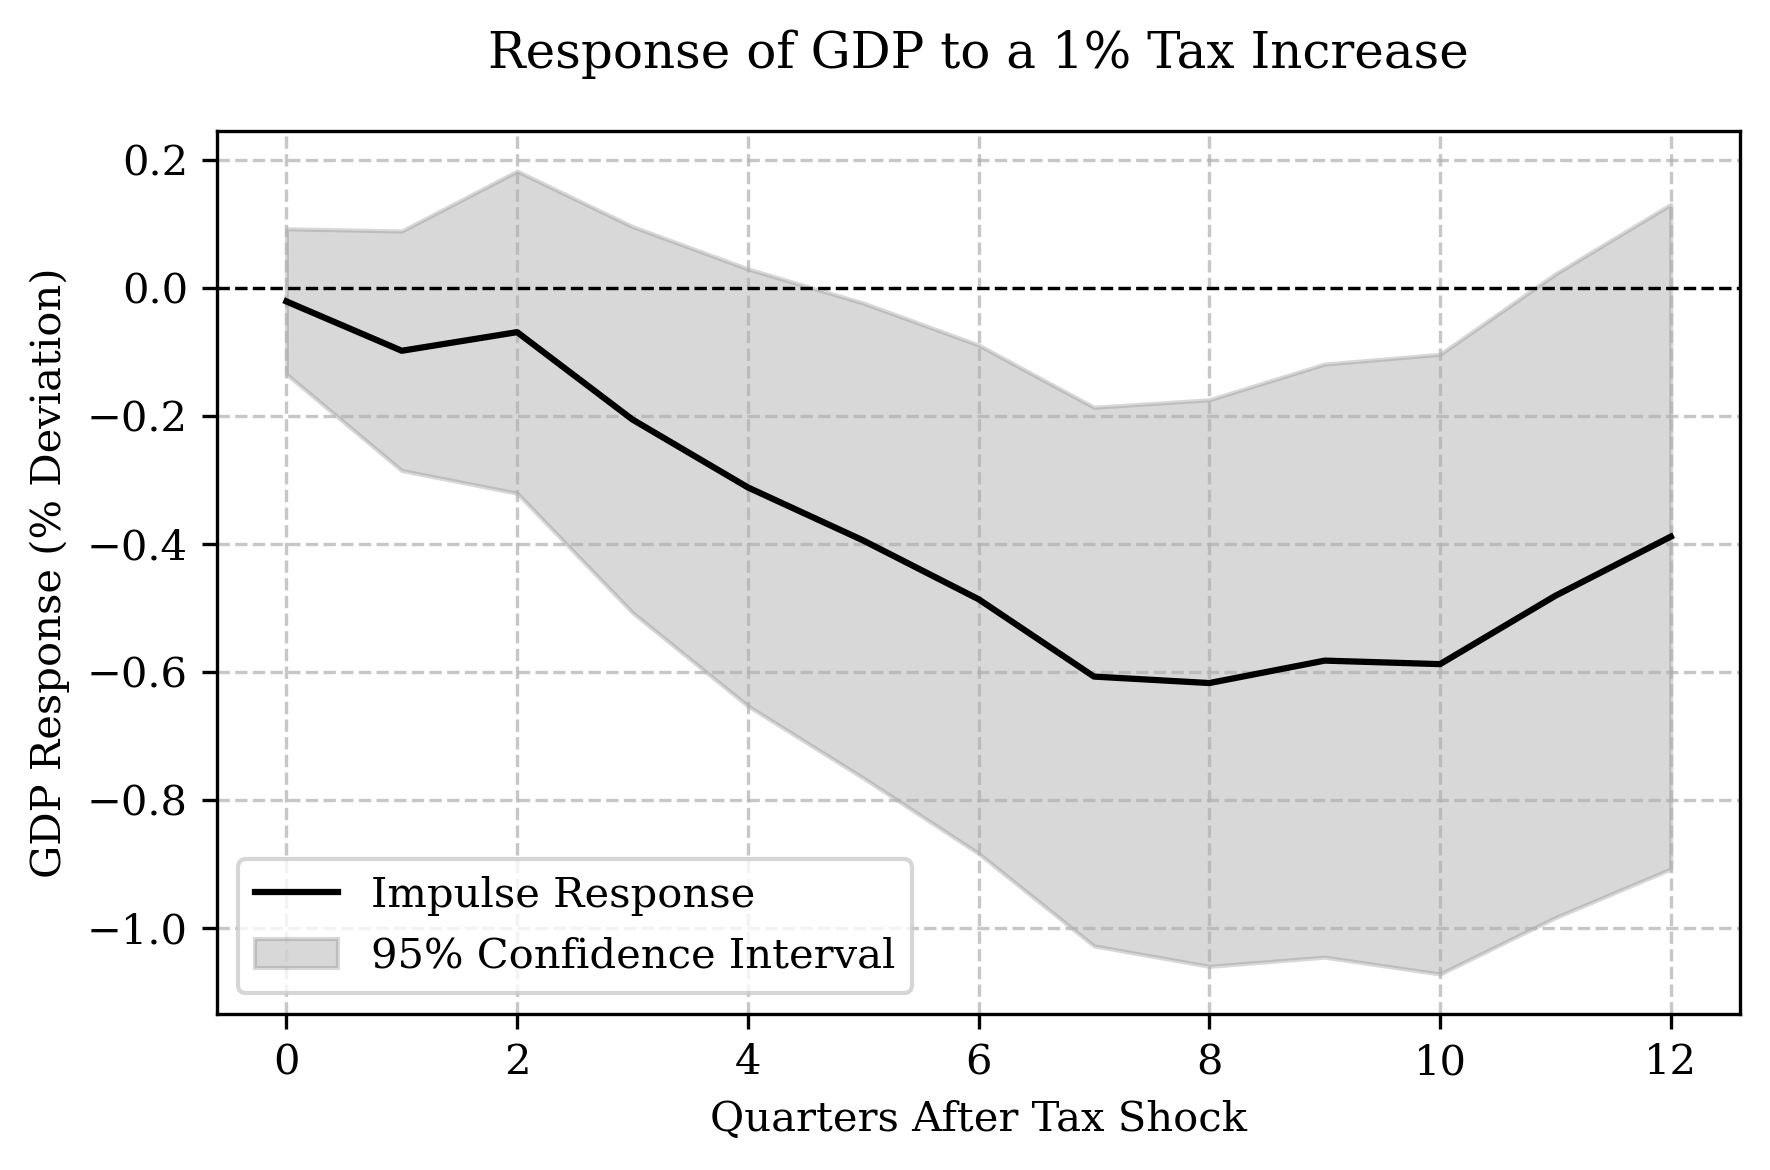

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Step 1: Load and preprocess the data

# File path for Romer-Romer data
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Load Romer-Romer data
# Read Tax Measures sheet
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

# Read Other Variables sheet (macroeconomic variables)
data_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
data_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
data_df["Quarter"] = data_df["Quarter"].apply(parse_quarter)
data_df = data_df.dropna(subset=["Quarter"]).copy()
data_df.columns = data_df.columns.str.strip()

# Merge the datasets on Quarter
data = pd.merge(tax_df, data_df, on="Quarter", how="inner")
data.set_index("Quarter", inplace=True)

# Debug: Check for missing values in the full dataset
print("Missing values in EXOGENRRATIO:", data['EXOGENRRATIO'].isna().sum())
print("Missing values in GDP:", data['GDP'].isna().sum())

# Forward-fill any missing values in GDP
data['GDP'] = data['GDP'].ffill()

# Compute log of real GDP
data['log_GDP'] = np.log(data['GDP'])

# Debug: Check for missing values in computed columns
print("Missing values in log_GDP:", data['log_GDP'].isna().sum())

# Subset data for the period 1950:I–2007:IV, selecting only the columns we need
start = '1950-01-01'
end = '2007-12-31'
subset_before_na = data.loc[start:end][['EXOGENRRATIO', 'log_GDP']]  # Select only the columns for the VAR
print(f"\nSample period {start} to {end}")
print(f"Number of rows before dropping NA: {len(subset_before_na)}")
print(f"Missing values in subset before dropping NA:")
print(f"  EXOGENRRATIO: {subset_before_na['EXOGENRRATIO'].isna().sum()}")
print(f"  log_GDP: {subset_before_na['log_GDP'].isna().sum()}")

subset = subset_before_na.dropna()
print(f"Number of rows after dropping NA: {len(subset)}")

if len(subset) == 0:
    raise ValueError(f"After dropping NA values, the subset for period {start} to {end} is empty. Check for missing data in EXOGENRRATIO or log_GDP.")

# Step 2: Estimate the 2-variable VAR
var_data = subset[['EXOGENRRATIO', 'log_GDP']]
model = VAR(var_data)
results = model.fit(12)  # 12 lags, as in the paper

# Step 3: Compute the IRF (12 quarters)
irf = results.irf(12)
gdp_response = irf.orth_irfs[:, 1, 0] * 100  # Response of log_GDP to EXOGENRRATIO shock, in percentage
stderr = irf.stderr(12)[:, 1, 0] * 100  # Standard errors, in percentage
conf_int_lower = (gdp_response - 1.96 * stderr)  # 95% CI lower bound
conf_int_upper = (gdp_response + 1.96 * stderr)  # 95% CI upper bound

# Step 4: Plot the IRF with confidence intervals
# Set up publication-ready styling
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)  # Single-column figure size (6 inches wide)

# Plot the IRF
quarters = np.arange(13)  # 0 to 12 quarters
ax.plot(quarters, gdp_response, color='black', linewidth=1.5, label='Impulse Response')
ax.fill_between(quarters, conf_int_lower, conf_int_upper, color='gray', alpha=0.3, label='95% Confidence Interval')

# Add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Customize the plot
ax.set_xlabel('Quarters After Tax Shock')
ax.set_ylabel('GDP Response (% Deviation)')
ax.set_title('Response of GDP to a 1% Tax Increase', pad=15)
ax.set_xticks(np.arange(0, 13, 2))  # Ticks every 2 quarters
ax.legend(loc='lower left', fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the figure
plt.savefig('figure_8.pdf', bbox_inches='tight')
plt.savefig('figure_8.png', dpi=300, bbox_inches='tight')
plt.show()

Missing values in LONGRNRRATIO: 0
Missing values in DEFICNRRATIO: 0
Missing values in GDP: 8
Missing values in log_GDP: 8

Sample period 1950-01-01 to 2007-12-31 (Long-run VAR)
Number of rows after dropping NA: 232
Sample period 1950-01-01 to 2007-12-31 (Deficit-driven VAR)
Number of rows after dropping NA: 232


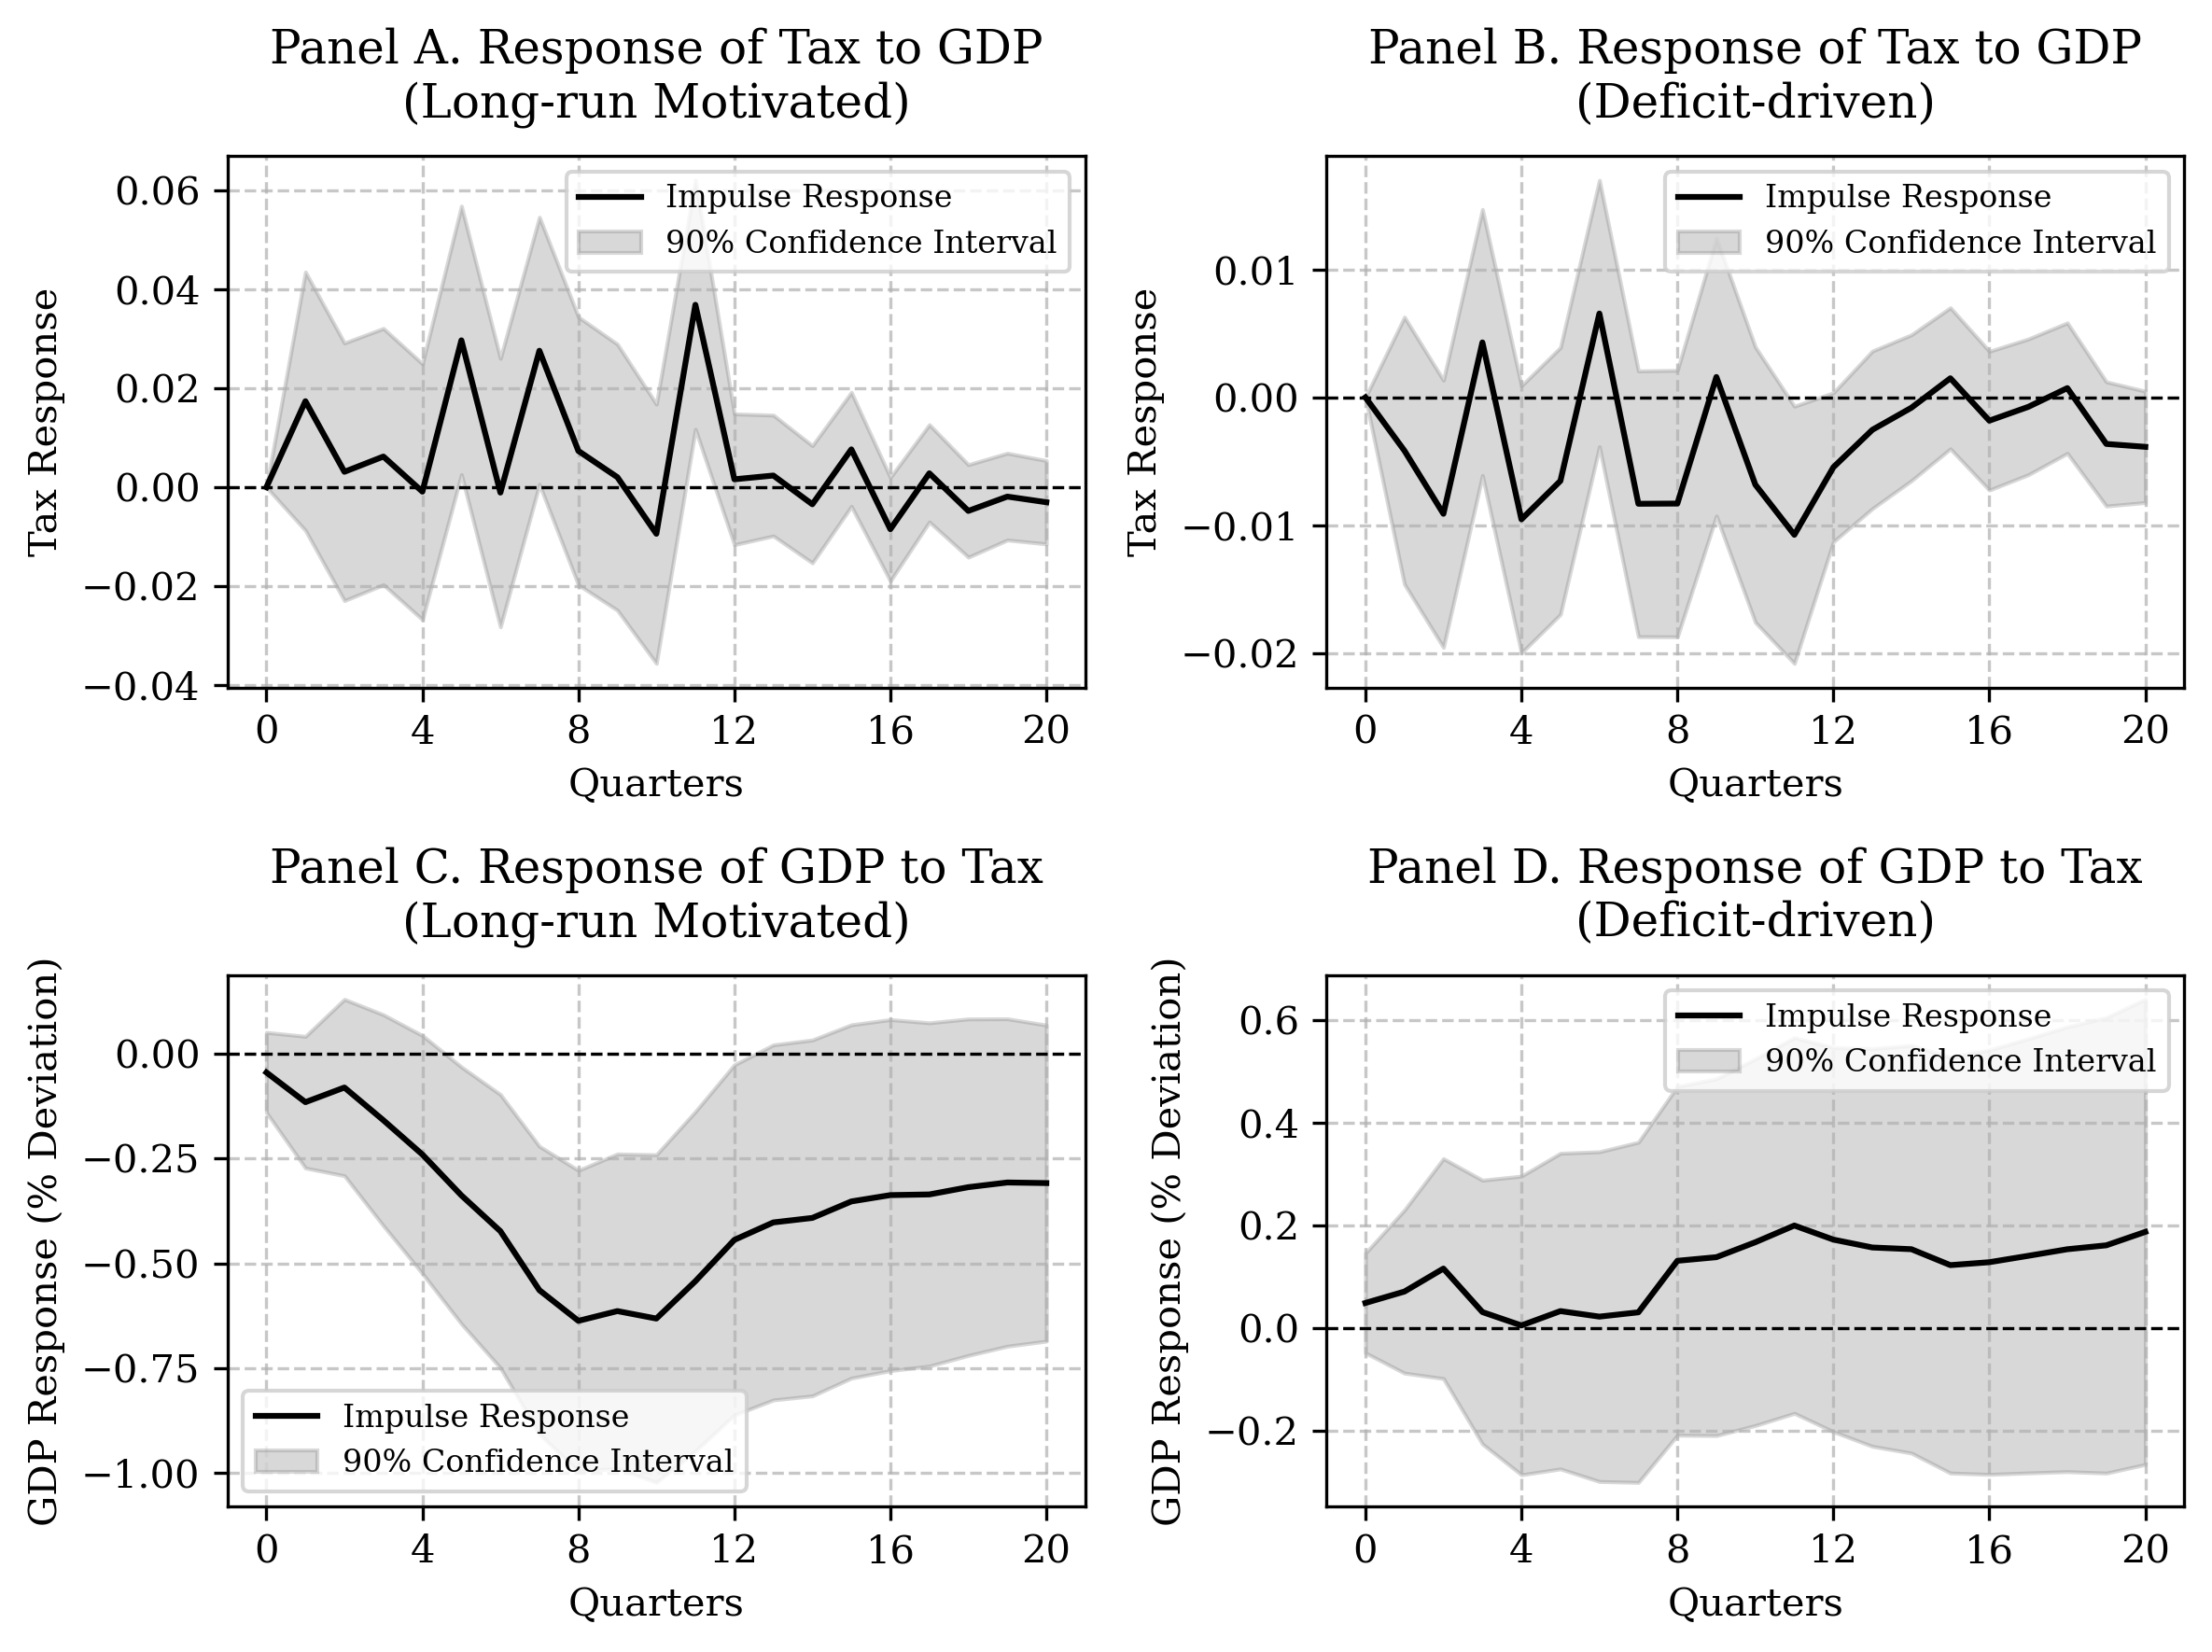

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Step 1: Load and preprocess the data

# File path for Romer-Romer data
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Load Romer-Romer data
# Read Tax Measures sheet
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

# Read Other Variables sheet (macroeconomic variables)
data_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
data_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
data_df["Quarter"] = data_df["Quarter"].apply(parse_quarter)
data_df = data_df.dropna(subset=["Quarter"]).copy()
data_df.columns = data_df.columns.str.strip()

# Merge the datasets on Quarter
data = pd.merge(tax_df, data_df, on="Quarter", how="inner")
data.set_index("Quarter", inplace=True)

# Debug: Check for missing values in the full dataset
print("Missing values in LONGRNRRATIO:", data['LONGRNRRATIO'].isna().sum())
print("Missing values in DEFICNRRATIO:", data['DEFICNRRATIO'].isna().sum())
print("Missing values in GDP:", data['GDP'].isna().sum())

# Forward-fill any missing values in GDP
data['GDP'] = data['GDP'].ffill()

# Compute log of real GDP
data['log_GDP'] = np.log(data['GDP'])

# Debug: Check for missing values in computed columns
print("Missing values in log_GDP:", data['log_GDP'].isna().sum())

# Subset data for the period 1950:I–2007:IV
start = '1950-01-01'
end = '2007-12-31'

# Subset for long-run VAR
subset_lr = data.loc[start:end][['LONGRNRRATIO', 'log_GDP']]
subset_lr = subset_lr.dropna()
print(f"\nSample period {start} to {end} (Long-run VAR)")
print(f"Number of rows after dropping NA: {len(subset_lr)}")

# Subset for deficit-driven VAR
subset_def = data.loc[start:end][['DEFICNRRATIO', 'log_GDP']]
subset_def = subset_def.dropna()
print(f"Sample period {start} to {end} (Deficit-driven VAR)")
print(f"Number of rows after dropping NA: {len(subset_def)}")

if len(subset_lr) == 0 or len(subset_def) == 0:
    raise ValueError(f"After dropping NA values, one of the subsets for period {start} to {end} is empty. Check for missing data.")

# Step 2: Estimate the two-variable VARs
# VAR 1: Long-run tax changes and log_GDP
model_lr = VAR(subset_lr)
results_lr = model_lr.fit(12)  # 12 lags, as in the paper

# VAR 2: Deficit-driven tax changes and log_GDP
model_def = VAR(subset_def)
results_def = model_def.fit(12)  # 12 lags, as in the paper

# Step 3: Compute the IRFs (20 quarters)
horizon = 20

# IRF for long-run tax changes
irf_lr = results_lr.irf(horizon)
# Response of tax to GDP (Panel A)
tax_to_gdp_lr = irf_lr.orth_irfs[:, 0, 1]  # LONGRNRRATIO response to log_GDP shock
tax_to_gdp_lr_se = irf_lr.stderr(horizon)[:, 0, 1]
tax_to_gdp_lr_lower = tax_to_gdp_lr - 1.645 * tax_to_gdp_lr_se  # 90% CI lower bound
tax_to_gdp_lr_upper = tax_to_gdp_lr + 1.645 * tax_to_gdp_lr_se  # 90% CI upper bound
# Response of GDP to tax (Panel C)
gdp_to_tax_lr = irf_lr.orth_irfs[:, 1, 0] * 100  # log_GDP response to LONGRNRRATIO shock, in percentage
gdp_to_tax_lr_se = irf_lr.stderr(horizon)[:, 1, 0] * 100
gdp_to_tax_lr_lower = gdp_to_tax_lr - 1.645 * gdp_to_tax_lr_se  # 90% CI lower bound
gdp_to_tax_lr_upper = gdp_to_tax_lr + 1.645 * gdp_to_tax_lr_se  # 90% CI upper bound

# IRF for deficit-driven tax changes
irf_def = results_def.irf(horizon)
# Response of tax to GDP (Panel B)
tax_to_gdp_def = irf_def.orth_irfs[:, 0, 1]  # DEFICNRRATIO response to log_GDP shock
tax_to_gdp_def_se = irf_def.stderr(horizon)[:, 0, 1]
tax_to_gdp_def_lower = tax_to_gdp_def - 1.645 * tax_to_gdp_def_se  # 90% CI lower bound
tax_to_gdp_def_upper = tax_to_gdp_def + 1.645 * tax_to_gdp_def_se  # 90% CI upper bound
# Response of GDP to tax (Panel D)
gdp_to_tax_def = irf_def.orth_irfs[:, 1, 0] * 100  # log_GDP response to DEFICNRRATIO shock, in percentage
gdp_to_tax_def_se = irf_def.stderr(horizon)[:, 1, 0] * 100
gdp_to_tax_def_lower = gdp_to_tax_def - 1.645 * gdp_to_tax_def_se  # 90% CI lower bound
gdp_to_tax_def_upper = gdp_to_tax_def + 1.645 * gdp_to_tax_def_se  # 90% CI upper bound

# Step 4: Plot Figure 8 (2x2 grid)
# Set up publication-ready styling
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)

fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=300)  # 2x2 grid, suitable for publication
quarters = np.arange(horizon + 1)  # 0 to 20 quarters

# Panel A: Response of tax (long-run) to GDP
axes[0, 0].plot(quarters, tax_to_gdp_lr, color='black', linewidth=1.5, label='Impulse Response')
axes[0, 0].fill_between(quarters, tax_to_gdp_lr_lower, tax_to_gdp_lr_upper, color='gray', alpha=0.3, label='90% Confidence Interval')
axes[0, 0].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[0, 0].set_title('Panel A. Response of Tax to GDP\n(Long-run Motivated)', pad=10)
axes[0, 0].set_xlabel('Quarters')
axes[0, 0].set_ylabel('Tax Response')
axes[0, 0].set_xticks(np.arange(0, 21, 4))
axes[0, 0].legend(loc='best', fontsize=8)
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Panel B: Response of tax (deficit-driven) to GDP
axes[0, 1].plot(quarters, tax_to_gdp_def, color='black', linewidth=1.5, label='Impulse Response')
axes[0, 1].fill_between(quarters, tax_to_gdp_def_lower, tax_to_gdp_def_upper, color='gray', alpha=0.3, label='90% Confidence Interval')
axes[0, 1].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[0, 1].set_title('Panel B. Response of Tax to GDP\n(Deficit-driven)', pad=10)
axes[0, 1].set_xlabel('Quarters')
axes[0, 1].set_ylabel('Tax Response')
axes[0, 1].set_xticks(np.arange(0, 21, 4))
axes[0, 1].legend(loc='best', fontsize=8)
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Panel C: Response of GDP to tax (long-run)
axes[1, 0].plot(quarters, gdp_to_tax_lr, color='black', linewidth=1.5, label='Impulse Response')
axes[1, 0].fill_between(quarters, gdp_to_tax_lr_lower, gdp_to_tax_lr_upper, color='gray', alpha=0.3, label='90% Confidence Interval')
axes[1, 0].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[1, 0].set_title('Panel C. Response of GDP to Tax\n(Long-run Motivated)', pad=10)
axes[1, 0].set_xlabel('Quarters')
axes[1, 0].set_ylabel('GDP Response (% Deviation)')
axes[1, 0].set_xticks(np.arange(0, 21, 4))
axes[1, 0].legend(loc='best', fontsize=8)
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# Panel D: Response of GDP to tax (deficit-driven)
axes[1, 1].plot(quarters, gdp_to_tax_def, color='black', linewidth=1.5, label='Impulse Response')
axes[1, 1].fill_between(quarters, gdp_to_tax_def_lower, gdp_to_tax_def_upper, color='gray', alpha=0.3, label='90% Confidence Interval')
axes[1, 1].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[1, 1].set_title('Panel D. Response of GDP to Tax\n(Deficit-driven)', pad=10)
axes[1, 1].set_xlabel('Quarters')
axes[1, 1].set_ylabel('GDP Response (% Deviation)')
axes[1, 1].set_xticks(np.arange(0, 21, 4))
axes[1, 1].legend(loc='best', fontsize=8)
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('figure_8.pdf', bbox_inches='tight')
plt.savefig('figure_8.png', dpi=300, bbox_inches='tight')
plt.show()

Missing values in LONGRNRRATIO: 0
Missing values in DEFICNRRATIO: 0
Missing values in GDP: 8
Missing values in log_GDP: 8

Sample period 1950-01-01 to 2007-12-31 (Long-run VAR)
Number of rows after dropping NA: 232
Sample period 1950-01-01 to 2007-12-31 (Deficit-driven VAR)
Number of rows after dropping NA: 232


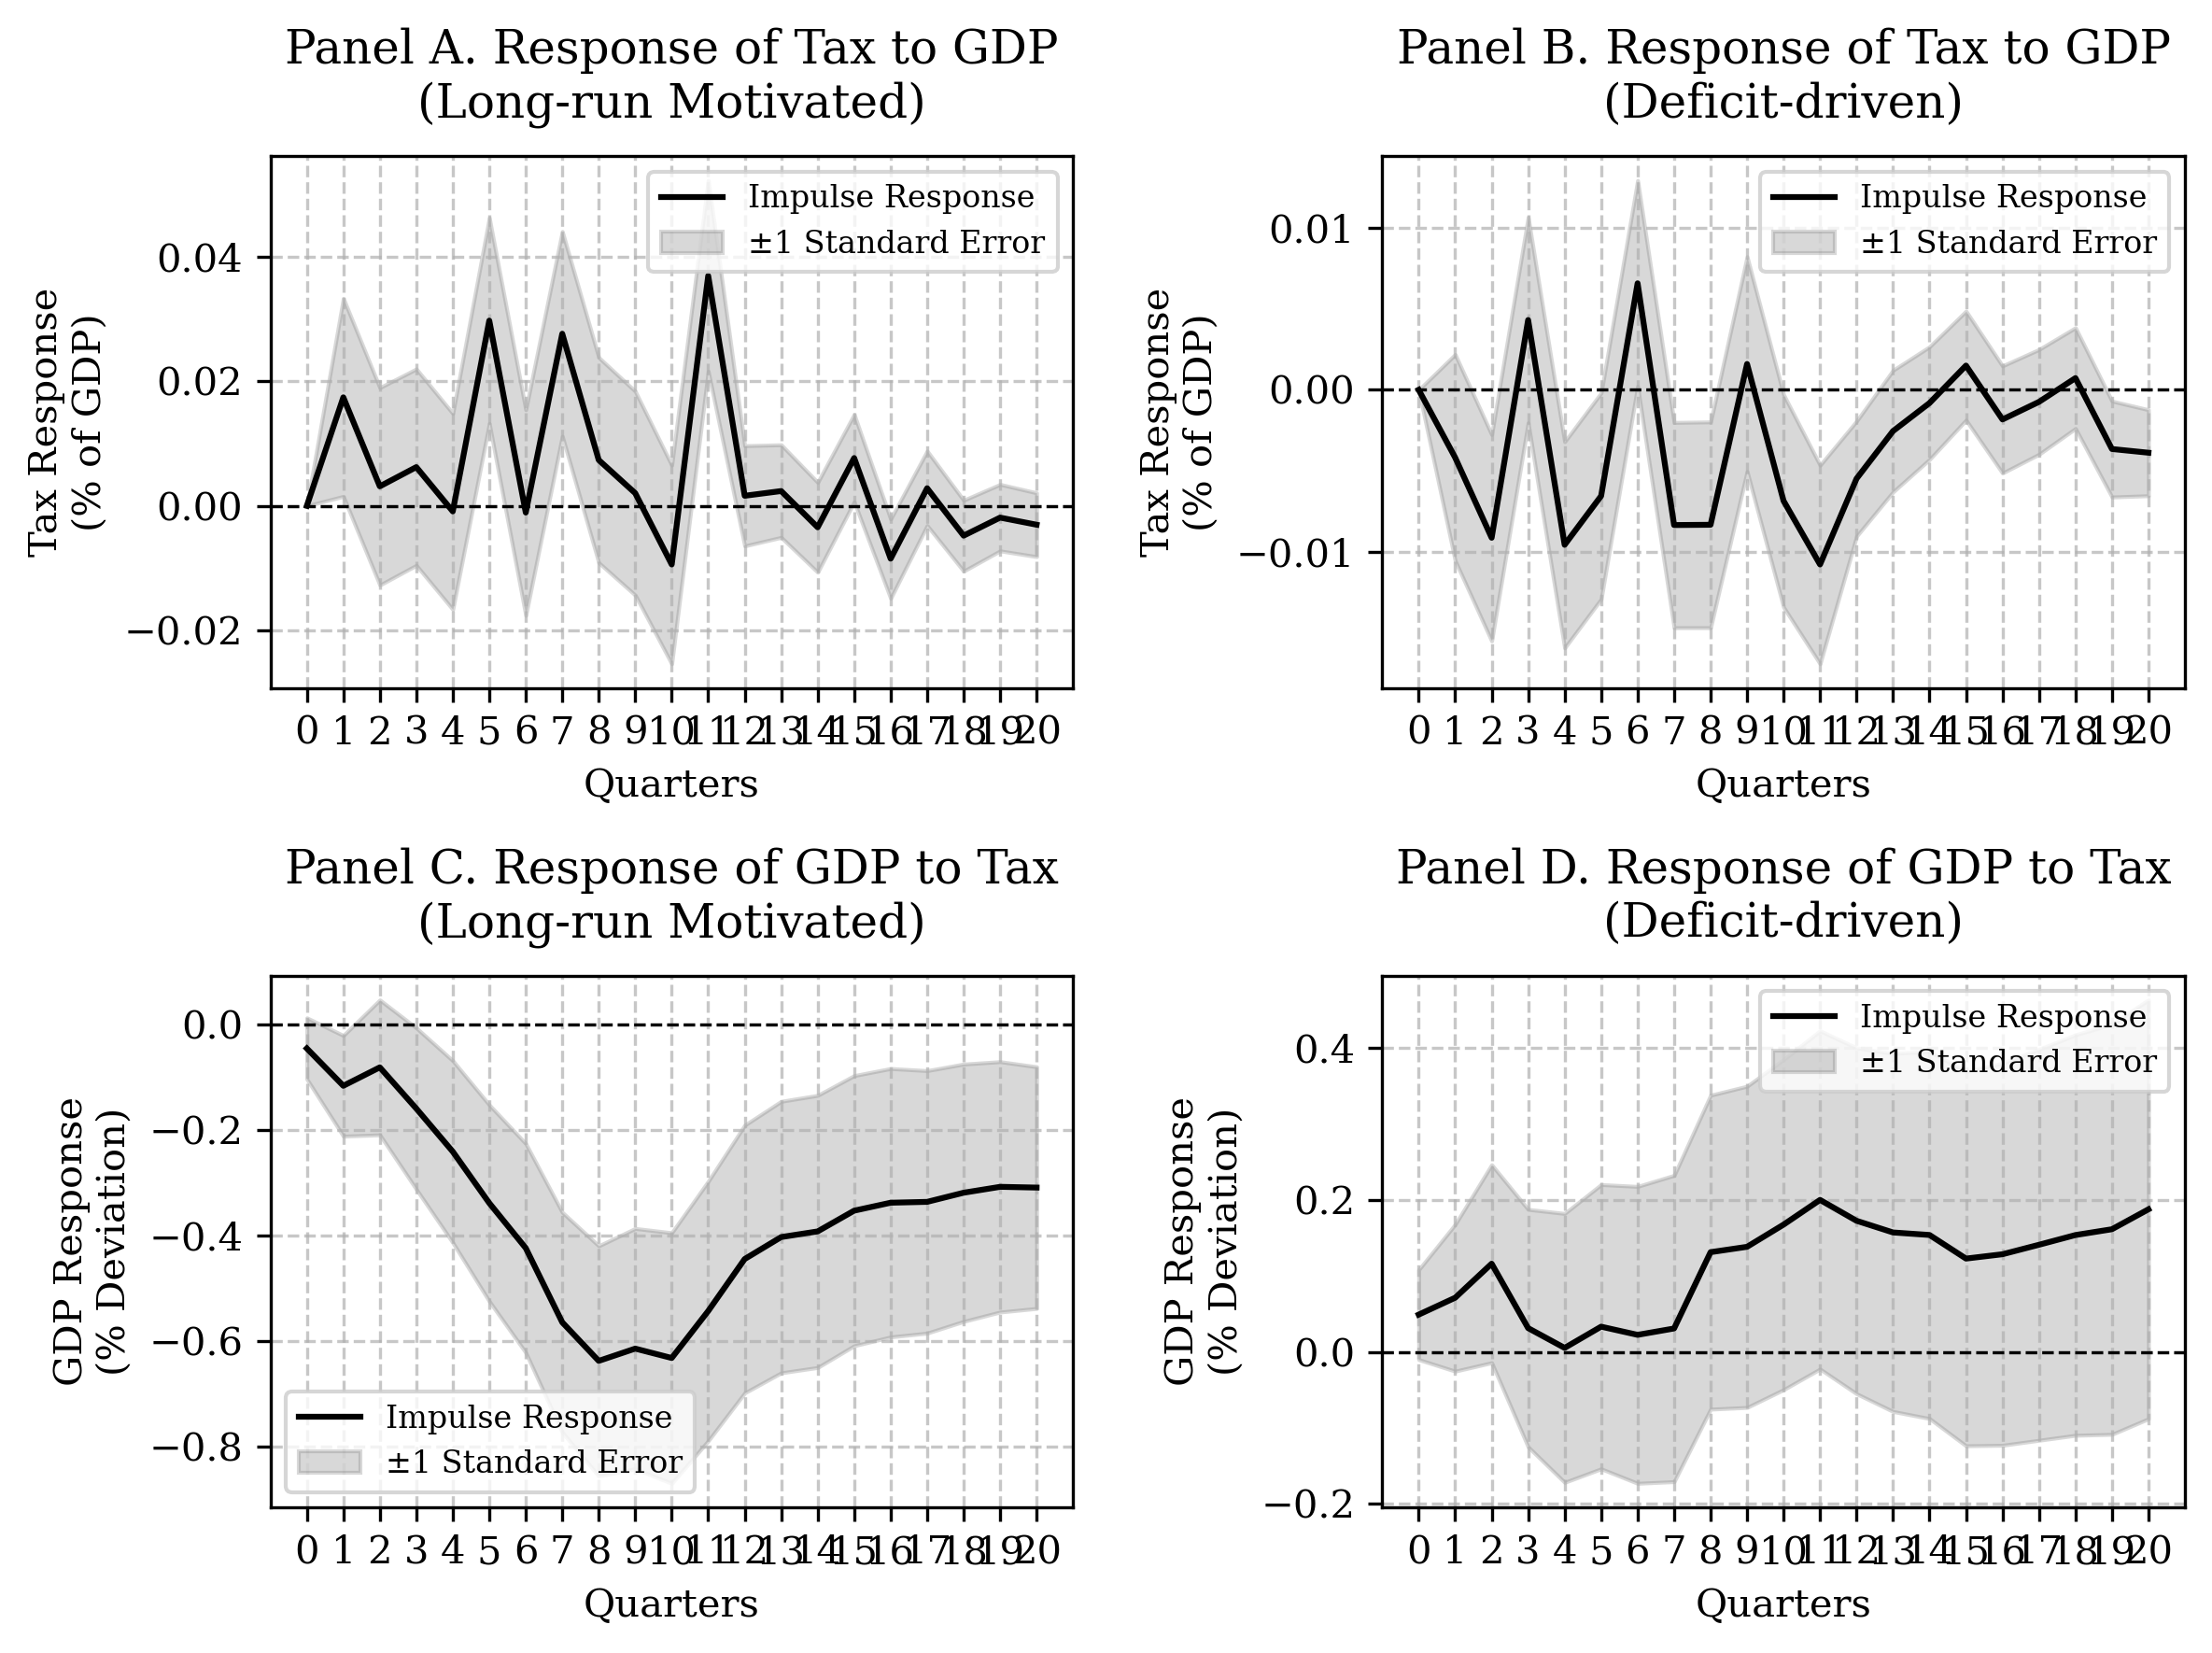

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Step 1: Load and preprocess the data

# File path for Romer-Romer data
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Load Romer-Romer data
# Read Tax Measures sheet
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

# Read Other Variables sheet (macroeconomic variables)
data_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
data_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
data_df["Quarter"] = data_df["Quarter"].apply(parse_quarter)
data_df = data_df.dropna(subset=["Quarter"]).copy()
data_df.columns = data_df.columns.str.strip()

# Merge the datasets on Quarter
data = pd.merge(tax_df, data_df, on="Quarter", how="inner")
data.set_index("Quarter", inplace=True)

# Debug: Check for missing values in the full dataset
print("Missing values in LONGRNRRATIO:", data['LONGRNRRATIO'].isna().sum())
print("Missing values in DEFICNRRATIO:", data['DEFICNRRATIO'].isna().sum())
print("Missing values in GDP:", data['GDP'].isna().sum())

# Forward-fill any missing values in GDP
data['GDP'] = data['GDP'].ffill()

# Compute log of real GDP
data['log_GDP'] = np.log(data['GDP'])

# Debug: Check for missing values in computed columns
print("Missing values in log_GDP:", data['log_GDP'].isna().sum())

# Subset data for the period 1950:I–2007:IV
start = '1950-01-01'
end = '2007-12-31'

# Subset for long-run VAR
subset_lr = data.loc[start:end][['LONGRNRRATIO', 'log_GDP']]
subset_lr = subset_lr.dropna()
print(f"\nSample period {start} to {end} (Long-run VAR)")
print(f"Number of rows after dropping NA: {len(subset_lr)}")

# Subset for deficit-driven VAR
subset_def = data.loc[start:end][['DEFICNRRATIO', 'log_GDP']]
subset_def = subset_def.dropna()
print(f"Sample period {start} to {end} (Deficit-driven VAR)")
print(f"Number of rows after dropping NA: {len(subset_def)}")

if len(subset_lr) == 0 or len(subset_def) == 0:
    raise ValueError(f"After dropping NA values, one of the subsets for period {start} to {end} is empty. Check for missing data.")

# Step 2: Estimate the two-variable VARs
# VAR 1: Long-run tax changes and log_GDP
model_lr = VAR(subset_lr)
results_lr = model_lr.fit(12)  # 12 lags, as in the paper

# VAR 2: Deficit-driven tax changes and log_GDP
model_def = VAR(subset_def)
results_def = model_def.fit(12)  # 12 lags, as in the paper

# Step 3: Compute the IRFs (20 quarters)
horizon = 20

# IRF for long-run tax changes
irf_lr = results_lr.irf(horizon)
# Response of tax to GDP (Panel A)
tax_to_gdp_lr = irf_lr.orth_irfs[:, 0, 1]  # LONGRNRRATIO response to log_GDP shock
tax_to_gdp_lr_se = irf_lr.stderr(horizon)[:, 0, 1]
tax_to_gdp_lr_lower = tax_to_gdp_lr - 1.0 * tax_to_gdp_lr_se  # 68% CI (±1σ)
tax_to_gdp_lr_upper = tax_to_gdp_lr + 1.0 * tax_to_gdp_lr_se  # 68% CI (±1σ)
# Response of GDP to tax (Panel C)
gdp_to_tax_lr = irf_lr.orth_irfs[:, 1, 0] * 100  # log_GDP response to LONGRNRRATIO shock, in percentage
gdp_to_tax_lr_se = irf_lr.stderr(horizon)[:, 1, 0] * 100
gdp_to_tax_lr_lower = gdp_to_tax_lr - 1.0 * gdp_to_tax_lr_se  # 68% CI (±1σ)
gdp_to_tax_lr_upper = gdp_to_tax_lr + 1.0 * gdp_to_tax_lr_se  # 68% CI (±1σ)

# IRF for deficit-driven tax changes
irf_def = results_def.irf(horizon)
# Response of tax to GDP (Panel B)
tax_to_gdp_def = irf_def.orth_irfs[:, 0, 1]  # DEFICNRRATIO response to log_GDP shock
tax_to_gdp_def_se = irf_def.stderr(horizon)[:, 0, 1]
tax_to_gdp_def_lower = tax_to_gdp_def - 1.0 * tax_to_gdp_def_se  # 68% CI (±1σ)
tax_to_gdp_def_upper = tax_to_gdp_def + 1.0 * tax_to_gdp_def_se  # 68% CI (±1σ)
# Response of GDP to tax (Panel D)
gdp_to_tax_def = irf_def.orth_irfs[:, 1, 0] * 100  # log_GDP response to DEFICNRRATIO shock, in percentage
gdp_to_tax_def_se = irf_def.stderr(horizon)[:, 1, 0] * 100
gdp_to_tax_def_lower = gdp_to_tax_def - 1.0 * gdp_to_tax_def_se  # 68% CI (±1σ)
gdp_to_tax_def_upper = gdp_to_tax_def + 1.0 * gdp_to_tax_def_se  # 68% CI (±1σ)

# Step 4: Plot Figure 8 (2x2 grid)
# Set up publication-ready styling
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)

fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=300)  # 2x2 grid, suitable for publication
quarters = np.arange(horizon + 1)  # 0 to 20 quarters

# Panel A: Response of tax (long-run) to GDP
axes[0, 0].plot(quarters, tax_to_gdp_lr, color='black', linewidth=1.5, label='Impulse Response')
axes[0, 0].fill_between(quarters, tax_to_gdp_lr_lower, tax_to_gdp_lr_upper, color='gray', alpha=0.3, label='±1 Standard Error')
axes[0, 0].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[0, 0].set_title('Panel A. Response of Tax to GDP\n(Long-run Motivated)', pad=10)
axes[0, 0].set_xlabel('Quarters')
axes[0, 0].set_ylabel('Tax Response\n(% of GDP)')
axes[0, 0].set_xticks(np.arange(0, 21, 1))
axes[0, 0].legend(loc='best', fontsize=8)
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Panel B: Response of tax (deficit-driven) to GDP
axes[0, 1].plot(quarters, tax_to_gdp_def, color='black', linewidth=1.5, label='Impulse Response')
axes[0, 1].fill_between(quarters, tax_to_gdp_def_lower, tax_to_gdp_def_upper, color='gray', alpha=0.3, label='±1 Standard Error')
axes[0, 1].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[0, 1].set_title('Panel B. Response of Tax to GDP\n(Deficit-driven)', pad=10)
axes[0, 1].set_xlabel('Quarters')
axes[0, 1].set_ylabel('Tax Response\n(% of GDP)')
axes[0, 1].set_xticks(np.arange(0, 21, 1))
axes[0, 1].legend(loc='best', fontsize=8)
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Panel C: Response of GDP to tax (long-run)
axes[1, 0].plot(quarters, gdp_to_tax_lr, color='black', linewidth=1.5, label='Impulse Response')
axes[1, 0].fill_between(quarters, gdp_to_tax_lr_lower, gdp_to_tax_lr_upper, color='gray', alpha=0.3, label='±1 Standard Error')
axes[1, 0].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[1, 0].set_title('Panel C. Response of GDP to Tax\n(Long-run Motivated)', pad=10)
axes[1, 0].set_xlabel('Quarters')
axes[1, 0].set_ylabel('GDP Response\n(% Deviation)')
axes[1, 0].set_xticks(np.arange(0, 21, 1))
axes[1, 0].legend(loc='best', fontsize=8)
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# Panel D: Response of GDP to tax (deficit-driven)
axes[1, 1].plot(quarters, gdp_to_tax_def, color='black', linewidth=1.5, label='Impulse Response')
axes[1, 1].fill_between(quarters, gdp_to_tax_def_lower, gdp_to_tax_def_upper, color='gray', alpha=0.3, label='±1 Standard Error')
axes[1, 1].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[1, 1].set_title('Panel D. Response of GDP to Tax\n(Deficit-driven)', pad=10)
axes[1, 1].set_xlabel('Quarters')
axes[1, 1].set_ylabel('GDP Response\n(% Deviation)')
axes[1, 1].set_xticks(np.arange(0, 21, 1))
axes[1, 1].legend(loc='best', fontsize=8)
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('figure_8_updated.pdf', bbox_inches='tight')
plt.savefig('figure_8_updated.png', dpi=300, bbox_inches='tight')
plt.show()

Missing values in LONGRNRRATIO: 0
Missing values in DEFICNRRATIO: 0
Missing values in ALLTAX_LONGRUN: 0
Missing values in ALLTAX_DEFICIT: 0
Missing values in GDP: 8
Missing values in log_GDP: 8

Sample period 1950-01-01 to 2007-12-31 (Exogenous Long-run VAR)
Number of rows after dropping NA: 232
Sample period 1950-01-01 to 2007-12-31 (Exogenous Deficit-driven VAR)
Number of rows after dropping NA: 232
Sample period 1950-01-01 to 2007-12-31 (All Legislated Long-run VAR)
Number of rows after dropping NA: 232
Sample period 1950-01-01 to 2007-12-31 (All Legislated Deficit-driven VAR)
Number of rows after dropping NA: 232


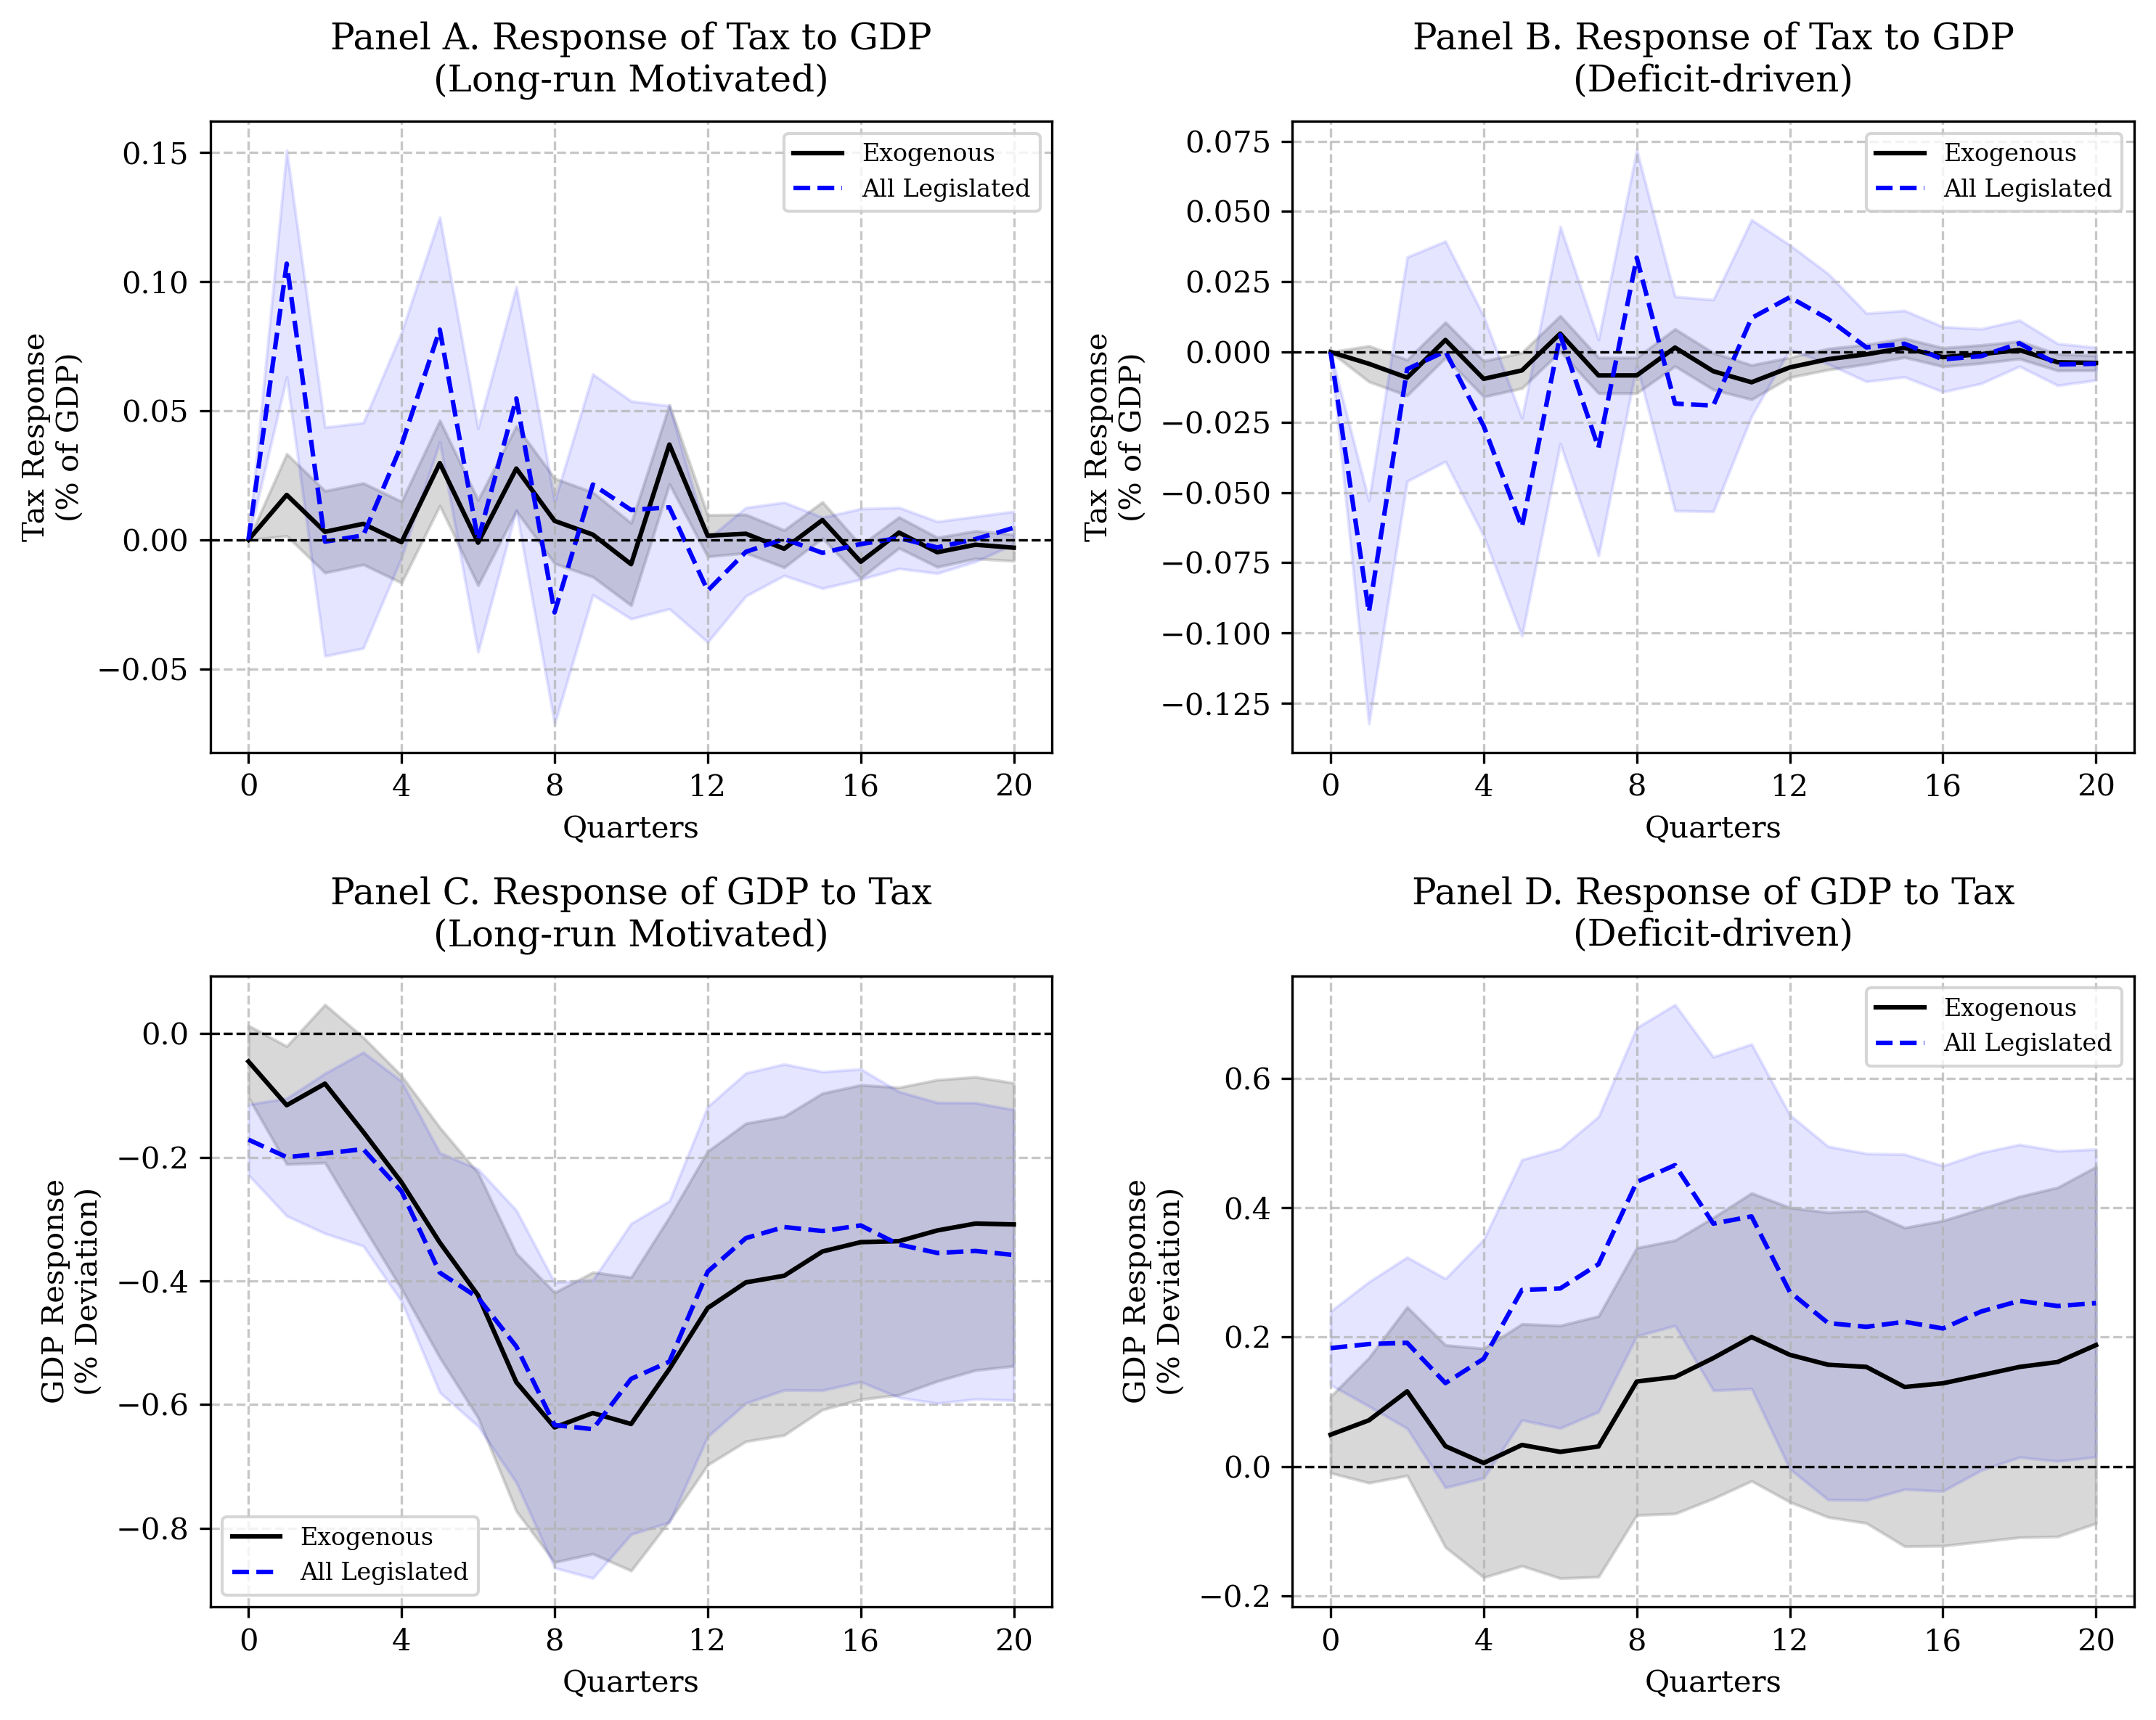

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Step 1: Load and preprocess the data

# File path for Romer-Romer data
file_path = "/Users/behroozmoosavi/Desktop/Romer-RomerFiscalData.xlsx"

# Function to parse quarters
def parse_quarter(q_str):
    if pd.isna(q_str):
        return pd.NaT
    q_str = str(q_str).strip()
    if "-" in q_str:
        parts = q_str.split("-")
    else:
        parts = q_str.split()
    year, quarter = parts
    q_map = {"I": 1, "II": 4, "III": 7, "IV": 10}
    return pd.Timestamp(year=int(year), month=q_map[quarter], day=1)

# Load Romer-Romer data
# Read Tax Measures sheet
tax_df = pd.read_excel(file_path, sheet_name="Tax Measures", header=11)
tax_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
tax_df["Quarter"] = tax_df["Quarter"].apply(parse_quarter)
tax_df = tax_df.dropna(subset=["Quarter"]).copy()
tax_df.columns = tax_df.columns.str.strip()

# Read Other Variables sheet (macroeconomic variables)
data_df = pd.read_excel(file_path, sheet_name="Other Variables", header=18)
data_df.rename(columns={"Unnamed: 0": "Quarter"}, inplace=True)
data_df["Quarter"] = data_df["Quarter"].apply(parse_quarter)
data_df = data_df.dropna(subset=["Quarter"]).copy()
data_df.columns = data_df.columns.str.strip()

# Merge the datasets
data = pd.merge(tax_df, data_df, on="Quarter", how="inner")
data.set_index("Quarter", inplace=True)

# Compute the endogenous tax changes
data['ENDOGENOUS'] = data['SUMMANRRATIO'] - data['EXOGENRRATIO']

# Compute shares of long-run and deficit-driven in exogenous tax changes
# Avoid division by zero by using a small epsilon or conditional logic
data['SHARE_LONGRUN'] = np.where(
    data['EXOGENRRATIO'] != 0,
    data['LONGRNRRATIO'] / data['EXOGENRRATIO'],
    0  # If EXOGENRRATIO is 0, set share to 0 (endogenous portion not allocated)
)
data['SHARE_DEFICIT'] = np.where(
    data['EXOGENRRATIO'] != 0,
    data['DEFICNRRATIO'] / data['EXOGENRRATIO'],
    0
)

# Allocate endogenous tax changes
data['ENDOGENOUS_LONGRUN'] = data['ENDOGENOUS'] * data['SHARE_LONGRUN']
data['ENDOGENOUS_DEFICIT'] = data['ENDOGENOUS'] * data['SHARE_DEFICIT']

# Compute total all legislated tax changes by motivation
data['ALLTAX_LONGRUN'] = data['LONGRNRRATIO'] + data['ENDOGENOUS_LONGRUN']
data['ALLTAX_DEFICIT'] = data['DEFICNRRATIO'] + data['ENDOGENOUS_DEFICIT']

# Debug: Check for missing values
print("Missing values in LONGRNRRATIO:", data['LONGRNRRATIO'].isna().sum())
print("Missing values in DEFICNRRATIO:", data['DEFICNRRATIO'].isna().sum())
print("Missing values in ALLTAX_LONGRUN:", data['ALLTAX_LONGRUN'].isna().sum())
print("Missing values in ALLTAX_DEFICIT:", data['ALLTAX_DEFICIT'].isna().sum())
print("Missing values in GDP:", data['GDP'].isna().sum())

# Forward-fill any missing values in GDP
data['GDP'] = data['GDP'].ffill()

# Compute log of real GDP
data['log_GDP'] = np.log(data['GDP'])

# Debug: Check for missing values in computed columns
print("Missing values in log_GDP:", data['log_GDP'].isna().sum())

# Subset data for the period 1950:I–2007:IV
start = '1950-01-01'
end = '2007-12-31'

# Subsets for each VAR
# Exogenous long-run
subset_exog_lr = data.loc[start:end][['LONGRNRRATIO', 'log_GDP']]
subset_exog_lr = subset_exog_lr.dropna()
print(f"\nSample period {start} to {end} (Exogenous Long-run VAR)")
print(f"Number of rows after dropping NA: {len(subset_exog_lr)}")

# Exogenous deficit-driven
subset_exog_def = data.loc[start:end][['DEFICNRRATIO', 'log_GDP']]
subset_exog_def = subset_exog_def.dropna()
print(f"Sample period {start} to {end} (Exogenous Deficit-driven VAR)")
print(f"Number of rows after dropping NA: {len(subset_exog_def)}")

# All legislated long-run
subset_all_lr = data.loc[start:end][['ALLTAX_LONGRUN', 'log_GDP']]
subset_all_lr = subset_all_lr.dropna()
print(f"Sample period {start} to {end} (All Legislated Long-run VAR)")
print(f"Number of rows after dropping NA: {len(subset_all_lr)}")

# All legislated deficit-driven
subset_all_def = data.loc[start:end][['ALLTAX_DEFICIT', 'log_GDP']]
subset_all_def = subset_all_def.dropna()
print(f"Sample period {start} to {end} (All Legislated Deficit-driven VAR)")
print(f"Number of rows after dropping NA: {len(subset_all_def)}")

# Step 2: Estimate the four VARs
# VAR 1: Exogenous long-run tax changes and log_GDP
model_exog_lr = VAR(subset_exog_lr)
results_exog_lr = model_exog_lr.fit(12)  # 12 lags

# VAR 2: Exogenous deficit-driven tax changes and log_GDP
model_exog_def = VAR(subset_exog_def)
results_exog_def = model_exog_def.fit(12)  # 12 lags

# VAR 3: All legislated long-run tax changes and log_GDP
model_all_lr = VAR(subset_all_lr)
results_all_lr = model_all_lr.fit(12)  # 12 lags

# VAR 4: All legislated deficit-driven tax changes and log_GDP
model_all_def = VAR(subset_all_def)
results_all_def = model_all_def.fit(12)  # 12 lags

# Step 3: Compute the IRFs (20 quarters)
horizon = 20

# IRF for exogenous long-run tax changes
irf_exog_lr = results_exog_lr.irf(horizon)
tax_to_gdp_exog_lr = irf_exog_lr.orth_irfs[:, 0, 1]  # LONGRNRRATIO response to log_GDP shock
tax_to_gdp_exog_lr_se = irf_exog_lr.stderr(horizon)[:, 0, 1]
tax_to_gdp_exog_lr_lower = tax_to_gdp_exog_lr - 1.0 * tax_to_gdp_exog_lr_se  # ±1σ
tax_to_gdp_exog_lr_upper = tax_to_gdp_exog_lr + 1.0 * tax_to_gdp_exog_lr_se
gdp_to_tax_exog_lr = irf_exog_lr.orth_irfs[:, 1, 0] * 100  # log_GDP response to LONGRNRRATIO shock
gdp_to_tax_exog_lr_se = irf_exog_lr.stderr(horizon)[:, 1, 0] * 100
gdp_to_tax_exog_lr_lower = gdp_to_tax_exog_lr - 1.0 * gdp_to_tax_exog_lr_se
gdp_to_tax_exog_lr_upper = gdp_to_tax_exog_lr + 1.0 * gdp_to_tax_exog_lr_se

# IRF for exogenous deficit-driven tax changes
irf_exog_def = results_exog_def.irf(horizon)
tax_to_gdp_exog_def = irf_exog_def.orth_irfs[:, 0, 1]  # DEFICNRRATIO response to log_GDP shock
tax_to_gdp_exog_def_se = irf_exog_def.stderr(horizon)[:, 0, 1]
tax_to_gdp_exog_def_lower = tax_to_gdp_exog_def - 1.0 * tax_to_gdp_exog_def_se
tax_to_gdp_exog_def_upper = tax_to_gdp_exog_def + 1.0 * tax_to_gdp_exog_def_se
gdp_to_tax_exog_def = irf_exog_def.orth_irfs[:, 1, 0] * 100  # log_GDP response to DEFICNRRATIO shock
gdp_to_tax_exog_def_se = irf_exog_def.stderr(horizon)[:, 1, 0] * 100
gdp_to_tax_exog_def_lower = gdp_to_tax_exog_def - 1.0 * gdp_to_tax_exog_def_se
gdp_to_tax_exog_def_upper = gdp_to_tax_exog_def + 1.0 * gdp_to_tax_exog_def_se

# IRF for all legislated long-run tax changes
irf_all_lr = results_all_lr.irf(horizon)
tax_to_gdp_all_lr = irf_all_lr.orth_irfs[:, 0, 1]  # ALLTAX_LONGRUN response to log_GDP shock
tax_to_gdp_all_lr_se = irf_all_lr.stderr(horizon)[:, 0, 1]
tax_to_gdp_all_lr_lower = tax_to_gdp_all_lr - 1.0 * tax_to_gdp_all_lr_se
tax_to_gdp_all_lr_upper = tax_to_gdp_all_lr + 1.0 * tax_to_gdp_all_lr_se
gdp_to_tax_all_lr = irf_all_lr.orth_irfs[:, 1, 0] * 100  # log_GDP response to ALLTAX_LONGRUN shock
gdp_to_tax_all_lr_se = irf_all_lr.stderr(horizon)[:, 1, 0] * 100
gdp_to_tax_all_lr_lower = gdp_to_tax_all_lr - 1.0 * gdp_to_tax_all_lr_se
gdp_to_tax_all_lr_upper = gdp_to_tax_all_lr + 1.0 * gdp_to_tax_all_lr_se

# IRF for all legislated deficit-driven tax changes
irf_all_def = results_all_def.irf(horizon)
tax_to_gdp_all_def = irf_all_def.orth_irfs[:, 0, 1]  # ALLTAX_DEFICIT response to log_GDP shock
tax_to_gdp_all_def_se = irf_all_def.stderr(horizon)[:, 0, 1]
tax_to_gdp_all_def_lower = tax_to_gdp_all_def - 1.0 * tax_to_gdp_all_def_se
tax_to_gdp_all_def_upper = tax_to_gdp_all_def + 1.0 * tax_to_gdp_all_def_se
gdp_to_tax_all_def = irf_all_def.orth_irfs[:, 1, 0] * 100  # log_GDP response to ALLTAX_DEFICIT shock
gdp_to_tax_all_def_se = irf_all_def.stderr(horizon)[:, 1, 0] * 100
gdp_to_tax_all_def_lower = gdp_to_tax_all_def - 1.0 * gdp_to_tax_all_def_se
gdp_to_tax_all_def_upper = gdp_to_tax_all_def + 1.0 * gdp_to_tax_all_def_se

# Step 4: Plot Figure 8 (2x2 grid with two lines per panel)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)

fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=300)  # Slightly larger to accommodate two lines
quarters = np.arange(horizon + 1)

# Panel A: Response of tax (long-run) to GDP
axes[0, 0].plot(quarters, tax_to_gdp_exog_lr, color='black', linewidth=1.5, label='Exogenous')
axes[0, 0].fill_between(quarters, tax_to_gdp_exog_lr_lower, tax_to_gdp_exog_lr_upper, color='gray', alpha=0.3)
axes[0, 0].plot(quarters, tax_to_gdp_all_lr, color='blue', linestyle='--', linewidth=1.5, label='All Legislated')
axes[0, 0].fill_between(quarters, tax_to_gdp_all_lr_lower, tax_to_gdp_all_lr_upper, color='blue', alpha=0.1)
axes[0, 0].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[0, 0].set_title('Panel A. Response of Tax to GDP\n(Long-run Motivated)', pad=10)
axes[0, 0].set_xlabel('Quarters')
axes[0, 0].set_ylabel('Tax Response\n(% of GDP)')
axes[0, 0].set_xticks(np.arange(0, 21, 4))
axes[0, 0].legend(loc='best', fontsize=8)
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Panel B: Response of tax (deficit-driven) to GDP
axes[0, 1].plot(quarters, tax_to_gdp_exog_def, color='black', linewidth=1.5, label='Exogenous')
axes[0, 1].fill_between(quarters, tax_to_gdp_exog_def_lower, tax_to_gdp_exog_def_upper, color='gray', alpha=0.3)
axes[0, 1].plot(quarters, tax_to_gdp_all_def, color='blue', linestyle='--', linewidth=1.5, label='All Legislated')
axes[0, 1].fill_between(quarters, tax_to_gdp_all_def_lower, tax_to_gdp_all_def_upper, color='blue', alpha=0.1)
axes[0, 1].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[0, 1].set_title('Panel B. Response of Tax to GDP\n(Deficit-driven)', pad=10)
axes[0, 1].set_xlabel('Quarters')
axes[0, 1].set_ylabel('Tax Response\n(% of GDP)')
axes[0, 1].set_xticks(np.arange(0, 21, 4))
axes[0, 1].legend(loc='best', fontsize=8)
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Panel C: Response of GDP to tax (long-run)
axes[1, 0].plot(quarters, gdp_to_tax_exog_lr, color='black', linewidth=1.5, label='Exogenous')
axes[1, 0].fill_between(quarters, gdp_to_tax_exog_lr_lower, gdp_to_tax_exog_lr_upper, color='gray', alpha=0.3)
axes[1, 0].plot(quarters, gdp_to_tax_all_lr, color='blue', linestyle='--', linewidth=1.5, label='All Legislated')
axes[1, 0].fill_between(quarters, gdp_to_tax_all_lr_lower, gdp_to_tax_all_lr_upper, color='blue', alpha=0.1)
axes[1, 0].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[1, 0].set_title('Panel C. Response of GDP to Tax\n(Long-run Motivated)', pad=10)
axes[1, 0].set_xlabel('Quarters')
axes[1, 0].set_ylabel('GDP Response\n(% Deviation)')
axes[1, 0].set_xticks(np.arange(0, 21, 4))
axes[1, 0].legend(loc='best', fontsize=8)
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# Panel D: Response of GDP to tax (deficit-driven)
axes[1, 1].plot(quarters, gdp_to_tax_exog_def, color='black', linewidth=1.5, label='Exogenous')
axes[1, 1].fill_between(quarters, gdp_to_tax_exog_def_lower, gdp_to_tax_exog_def_upper, color='gray', alpha=0.3)
axes[1, 1].plot(quarters, gdp_to_tax_all_def, color='blue', linestyle='--', linewidth=1.5, label='All Legislated')
axes[1, 1].fill_between(quarters, gdp_to_tax_all_def_lower, gdp_to_tax_all_def_upper, color='blue', alpha=0.1)
axes[1, 1].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[1, 1].set_title('Panel D. Response of GDP to Tax\n(Deficit-driven)', pad=10)
axes[1, 1].set_xlabel('Quarters')
axes[1, 1].set_ylabel('GDP Response\n(% Deviation)')
axes[1, 1].set_xticks(np.arange(0, 21, 4))
axes[1, 1].legend(loc='best', fontsize=8)
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('figure_8_corrected_alltax.pdf', bbox_inches='tight')
plt.savefig('figure_8_corrected_alltax.png', dpi=300, bbox_inches='tight')
plt.show()